# Imports

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Wrapper Methods
from sklearn.feature_selection import RFE, RFECV

# Embedded Methods
from sklearn.linear_model import LassoCV

# Encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Scaling methods
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Model selection and evalutation 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

## Import the datasets

In [2]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=['?', ''], index_col='encounter_id')
test.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=['?', ''], index_col='encounter_id')
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


# Exploration

In [5]:
print(train.shape)
print(train.columns)

(71236, 30)
Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')


In [6]:
print(test.shape)
print(test.columns)

(30530, 28)
Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')


## Check duplicates

In [7]:
train_duplicated = train.loc[train.duplicated(), :]
train_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [8]:
test_duplicated = test.loc[test.duplicated(), :]
test_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [9]:
train['country'].unique()

array(['USA'], dtype=object)

In [10]:
test['country'].unique()

array(['USA'], dtype=object)

In [11]:
train.drop('country', axis=1, inplace=True)
test.drop('country', axis=1, inplace=True)

## Check missing values

In [12]:
for col in train.columns:
    print( '{}-{}%'.format(col, round(np.mean(train[col].isnull()) * 100 , 2)) )

patient_id-0.0%
race-7.12%
gender-0.0%
age-4.99%
weight-96.85%
payer_code-39.59%
outpatient_visits_in_previous_year-0.0%
emergency_visits_in_previous_year-0.0%
inpatient_visits_in_previous_year-0.0%
admission_type-5.2%
medical_specialty-49.02%
average_pulse_bpm-0.0%
discharge_disposition-3.64%
admission_source-6.62%
length_of_stay_in_hospital-0.0%
number_lab_tests-0.0%
non_lab_procedures-0.0%
number_of_medications-0.0%
primary_diagnosis-0.02%
secondary_diagnosis-0.37%
additional_diagnosis-1.42%
number_diagnoses-0.0%
glucose_test_result-94.82%
a1c_test_result-83.27%
change_in_meds_during_hospitalization-0.0%
prescribed_diabetes_meds-0.0%
medication-0.0%
readmitted_binary-0.0%
readmitted_multiclass-0.0%


In [13]:
for col in test.columns:
    print( '{}-{}%'.format(col, round(np.mean(test[col].isnull()) * 100, 2)) )

patient_id-0.0%
race-7.18%
gender-0.0%
age-5.01%
weight-96.89%
payer_code-39.49%
outpatient_visits_in_previous_year-0.0%
emergency_visits_in_previous_year-0.0%
inpatient_visits_in_previous_year-0.0%
admission_type-5.19%
medical_specialty-49.22%
average_pulse_bpm-0.0%
discharge_disposition-3.61%
admission_source-6.76%
length_of_stay_in_hospital-0.0%
number_lab_tests-0.0%
non_lab_procedures-0.0%
number_of_medications-0.0%
primary_diagnosis-0.02%
secondary_diagnosis-0.31%
additional_diagnosis-1.36%
number_diagnoses-0.0%
glucose_test_result-94.57%
a1c_test_result-83.29%
change_in_meds_during_hospitalization-0.0%
prescribed_diabetes_meds-0.0%
medication-0.0%


In [14]:
# weight is 97% missing values
train.drop('weight', axis=1, inplace=True)
test.drop('weight', axis=1, inplace=True)

In [15]:
train['race'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['primary_diagnosis'].fillna('Unknown', inplace=True)
train['secondary_diagnosis'].fillna('Unknown', inplace=True)
train['additional_diagnosis'].fillna('Unknown', inplace=True)
train['glucose_test_result'].fillna('Not_taken', inplace=True)
train['a1c_test_result'].fillna('Not_taken', inplace=True)

In [16]:
test['race'].fillna('Unknown', inplace=True)
test['age'].fillna('Unknown', inplace=True)
test['payer_code'].fillna('None', inplace=True)
test['admission_type'].fillna('Unknown', inplace=True)
test['medical_specialty'].fillna('Unknown', inplace=True)
test['discharge_disposition'].fillna('Unknown', inplace=True)
test['admission_source'].fillna('Unknown', inplace=True)
test['primary_diagnosis'].fillna('Unknown', inplace=True)
test['secondary_diagnosis'].fillna('Unknown', inplace=True)
test['additional_diagnosis'].fillna('Unknown', inplace=True)
test['glucose_test_result'].fillna('Not_taken', inplace=True)
test['a1c_test_result'].fillna('Not_taken', inplace=True)

In [17]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [18]:
test.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

# Feature Engineering

In [19]:
new_column_names = {'outpatient_visits_in_previous_year':'outpatient_visits', 
                    'emergency_visits_in_previous_year':'emergency_visits',
                    'inpatient_visits_in_previous_year':'inpatient_visits',
                    'change_in_meds_during_hospitalization':'change_in_meds',
                    'length_of_stay_in_hospital':'length_of_stay'}
train = train.rename(columns=new_column_names)
test = test.rename(columns=new_column_names)

In [20]:
# Proportion Bar Chart: Feature Distribution with Respect to Binary Target Variable
def bar_charts_categorical(df, feature, target):
    # Create a contingency table using pd.crosstab
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)

    # Extract categories and calculate observed percentages
    categories = cont_tab.index[:-1]
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])

    # Create a figure with a size of (50, 10)
    fig = plt.figure(figsize=(50, 10))    

    # Plot the bar chart
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
 
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.show()

### race

In [21]:
train['race'].value_counts()

race
Caucasian          50693
AfricanAmerican    12693
Unknown             5070
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

In [22]:
test['race'].value_counts()

race
Caucasian          21617
AfricanAmerican     5535
Unknown             2191
Hispanic             563
Other                437
Asian                187
Name: count, dtype: int64

In [23]:
unknown = train[train['race']=='Unknown']['patient_id'].unique()
train[train['patient_id'].isin(unknown)].sort_values('patient_id')

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
566441,1152,AfricanAmerican,Female,[60-70),None,0,0,1,Emergency,Hematology/Oncology,...,276,428,9,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days
856252,1152,AfricanAmerican,Female,Unknown,None,0,0,1,Emergency,Unknown,...,250,Unknown,2,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days
541693,1152,Unknown,Female,[50-60),None,0,0,2,Emergency,Hematology/Oncology,...,794,250,6,Not_taken,Not_taken,Ch,Yes,['insulin'],No,>30 days
334769,1152,AfricanAmerican,Female,[60-70),None,0,0,2,Emergency,Hematology/Oncology,...,287,466,5,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No
265544,1152,AfricanAmerican,Female,[50-60),None,0,0,1,Emergency,Hematology/Oncology,...,250.01,Unknown,2,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257124,186774602,Unknown,Male,[20-30),SP,0,0,1,Emergency,Unknown,...,584,276,8,Not_taken,Not_taken,Ch,Yes,['insulin'],No,>30 days
517354,187920311,Unknown,Female,[60-70),PO,0,0,0,Emergency,Unknown,...,599,816,9,Not_taken,Not_taken,Ch,Yes,"['glipizide', 'insulin']",Yes,<30 days
500497,187920311,Caucasian,Female,[60-70),PO,0,0,1,Elective,Unknown,...,V54,V54,9,Not_taken,Not_taken,Ch,Yes,"['glipizide', 'insulin']",No,No


In [24]:
unknown = test[test['race']== 'Unknown']['patient_id'].unique()
test[test['patient_id'].isin(unknown)].sort_values('patient_id')

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
527436,5220,Caucasian,Male,[60-70),None,0,0,0,Emergency,InternalMedicine,...,14,276,426,558,9,Not_taken,Not_taken,No,Yes,['insulin']
834145,5220,Unknown,Male,[70-80),None,0,0,2,Emergency,InternalMedicine,...,12,250.7,707,428,9,Not_taken,Not_taken,No,Yes,['insulin']
291928,8154,Unknown,Female,[30-40),None,0,0,0,Emergency,Emergency/Trauma,...,5,250.13,401,250.53,8,Not_taken,Not_taken,No,No,[]
601592,36432,Unknown,Female,[70-80),None,0,0,0,Elective,InternalMedicine,...,8,414,428,425,5,Not_taken,Not_taken,Ch,Yes,['repaglinide']
581750,36810,Caucasian,Male,[50-60),None,0,0,1,Emergency,Emergency/Trauma,...,16,414,428,414,9,Not_taken,Not_taken,Ch,Yes,"['pioglitazone', 'insulin']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510098,185434673,Unknown,Female,[50-60),HM,0,2,0,Urgent,Unknown,...,15,486,599,729,9,Not_taken,Not_taken,Ch,Yes,['insulin']
505665,186037511,Unknown,Female,[70-80),SP,0,0,0,Elective,Unknown,...,25,427,414,250,9,Not_taken,>8,Ch,Yes,['insulin']
767409,186400940,Unknown,Male,[80-90),MC,0,0,0,Emergency,Unknown,...,28,410,584,428,9,Not_taken,Norm,No,No,[]


In [25]:
train[train['patient_id']==1152]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
566441,1152,AfricanAmerican,Female,[60-70),None,0,0,1,Emergency,Hematology/Oncology,...,276,428,9,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days
856252,1152,AfricanAmerican,Female,Unknown,None,0,0,1,Emergency,Unknown,...,250,Unknown,2,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days
334769,1152,AfricanAmerican,Female,[60-70),None,0,0,2,Emergency,Hematology/Oncology,...,287,466,5,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No
541693,1152,Unknown,Female,[50-60),None,0,0,2,Emergency,Hematology/Oncology,...,794,250,6,Not_taken,Not_taken,Ch,Yes,['insulin'],No,>30 days
265544,1152,AfricanAmerican,Female,[50-60),None,0,0,1,Emergency,Hematology/Oncology,...,250.01,Unknown,2,Not_taken,Not_taken,No,Yes,['insulin'],No,>30 days


In [26]:
test[test['patient_id']==5220]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
834145,5220,Unknown,Male,[70-80),None,0,0,2,Emergency,InternalMedicine,...,12,250.7,707,428,9,Not_taken,Not_taken,No,Yes,['insulin']
527436,5220,Caucasian,Male,[60-70),None,0,0,0,Emergency,InternalMedicine,...,14,276,426,558,9,Not_taken,Not_taken,No,Yes,['insulin']


In [27]:
# Race Imputation by Patient
def fill_race(df):
    for i, row in df.iterrows():
        if row['race'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['race'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'race'] = other_rows.iloc[0]['race']

In [28]:
fill_race(train)

In [29]:
fill_race(test)

In [30]:
train['race'].value_counts()

race
Caucasian          51779
AfricanAmerican    12977
Unknown             3648
Hispanic            1394
Other               1013
Asian                425
Name: count, dtype: int64

In [31]:
test['race'].value_counts()

race
Caucasian          21880
AfricanAmerican     5618
Unknown             1828
Hispanic             570
Other                443
Asian                191
Name: count, dtype: int64

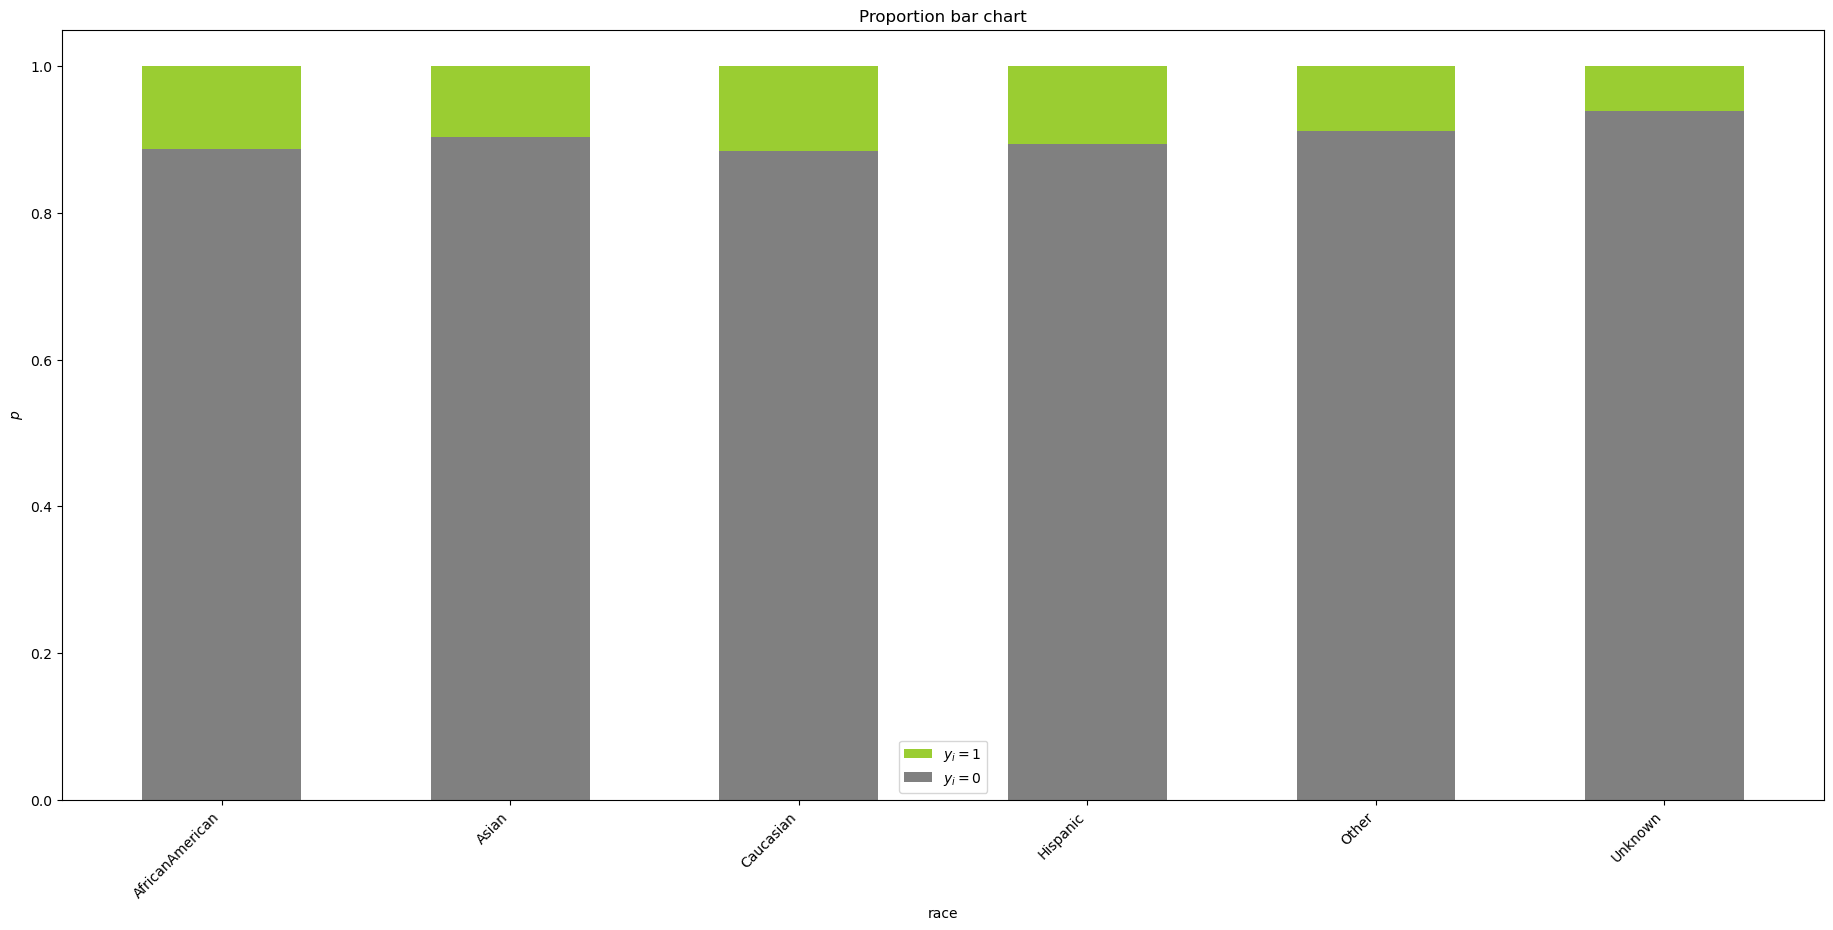

In [32]:
bar_charts_categorical(train, "race", "readmitted_binary")

In [33]:
train['race_caucasian'] = train['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [34]:
test['race_caucasian'] = test['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [35]:
train['race_caucasian'].value_counts()

race_caucasian
1    51779
0    19457
Name: count, dtype: int64

In [36]:
test['race_caucasian'].value_counts()

race_caucasian
1    21880
0     8650
Name: count, dtype: int64

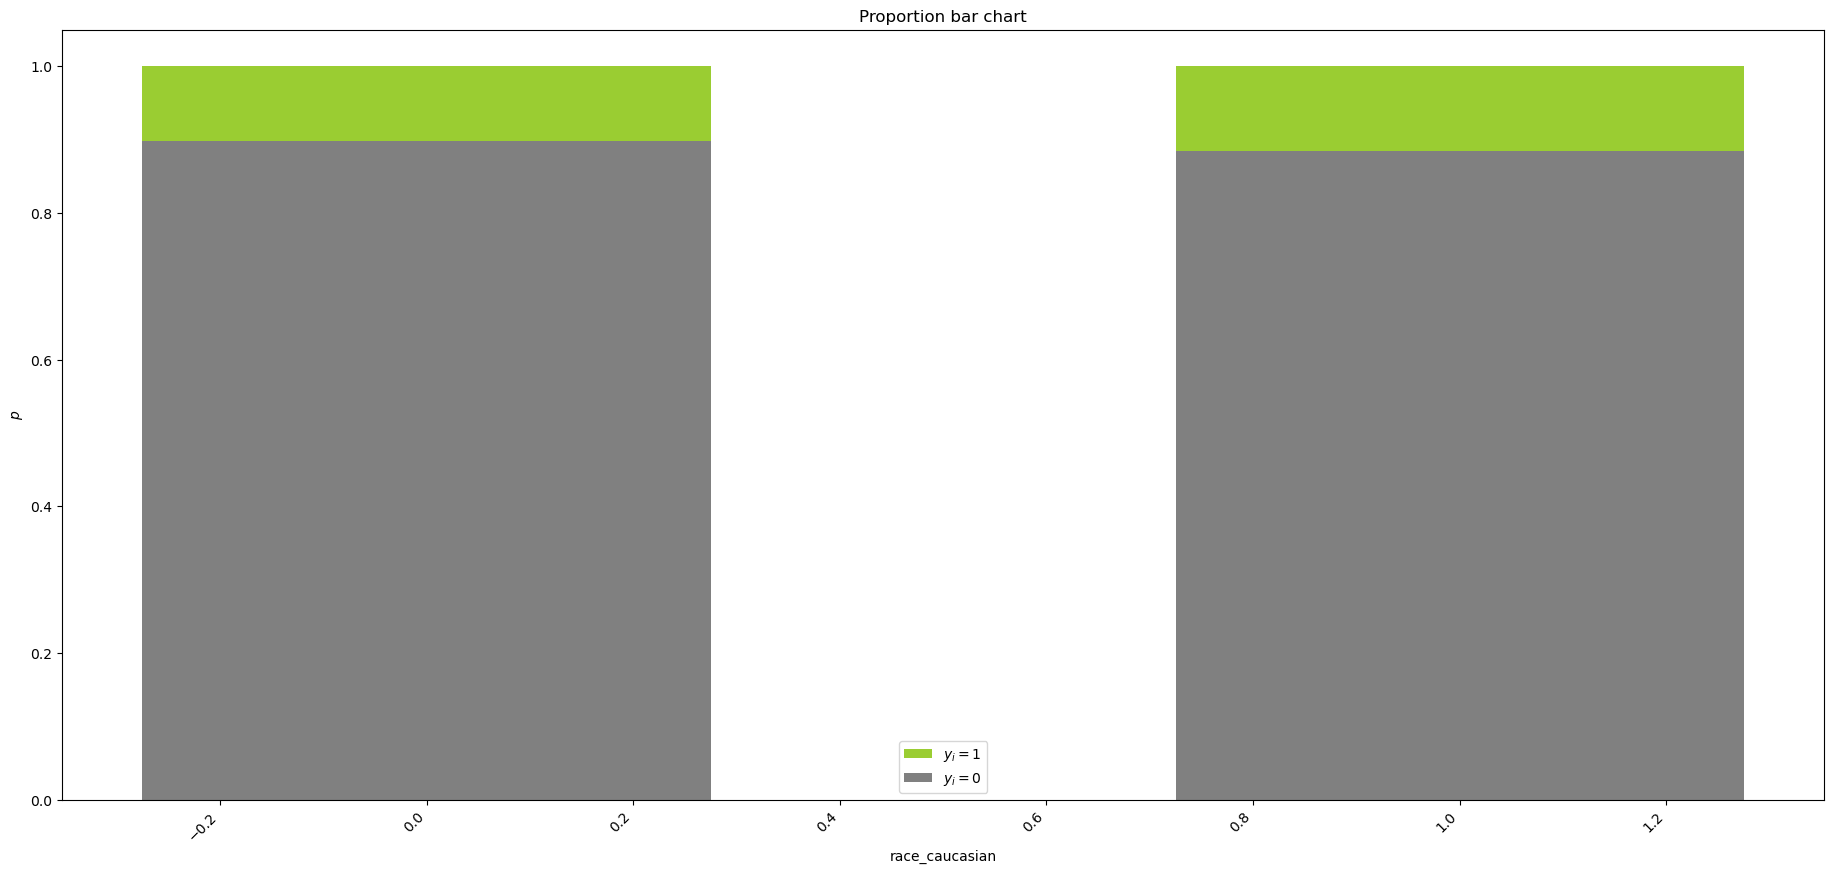

In [37]:
bar_charts_categorical(train, "race_caucasian", "readmitted_binary")

### medication 

In [38]:
train['medication'].value_counts(normalize=True)

medication
['insulin']                                                       0.304832
[]                                                                0.229463
['metformin']                                                     0.044247
['metformin', 'insulin']                                          0.042689
['glipizide']                                                     0.038281
                                                                    ...   
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']    0.000014
['glimepiride', 'rosiglitazone', 'acarbose']                      0.000014
['glipizide', 'pioglitazone', 'acarbose', 'insulin']              0.000014
['metformin', 'glyburide', 'acarbose', 'insulin']                 0.000014
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']           0.000014
Name: proportion, Length: 303, dtype: float64

In [39]:
test['medication'].value_counts(normalize=True)

medication
['insulin']                                                             0.302981
[]                                                                      0.231150
['metformin']                                                           0.043629
['metformin', 'insulin']                                                0.042614
['glipizide']                                                           0.037373
                                                                          ...   
['pioglitazone', 'tolazamide', 'insulin']                               0.000033
['metformin', 'glipizide', 'glyburide', 'pioglitazone', 'insulin']      0.000033
['nateglinide', 'rosiglitazone', 'acarbose']                            0.000033
['metformin', 'nateglinide', 'glipizide', 'pioglitazone', 'insulin']    0.000033
['rosiglitazone', 'acarbose', 'insulin']                                0.000033
Name: proportion, Length: 232, dtype: float64

In [40]:
# Replace empty brackets with 'no_medication'
train['medication'] = train['medication'].str.replace('[]', 'no_medication')
train['number_generic_medications'] = train['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [41]:
# Replace empty brackets with 'no_medication'
test['medication'] = test['medication'].str.replace('[]', 'no_medication')

test['number_generic_medications'] = test['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [42]:
train['number_generic_medications'].value_counts()

number_generic_medications
1    33182
0    16346
2    15289
3     5446
4      929
5       41
6        3
Name: count, dtype: int64

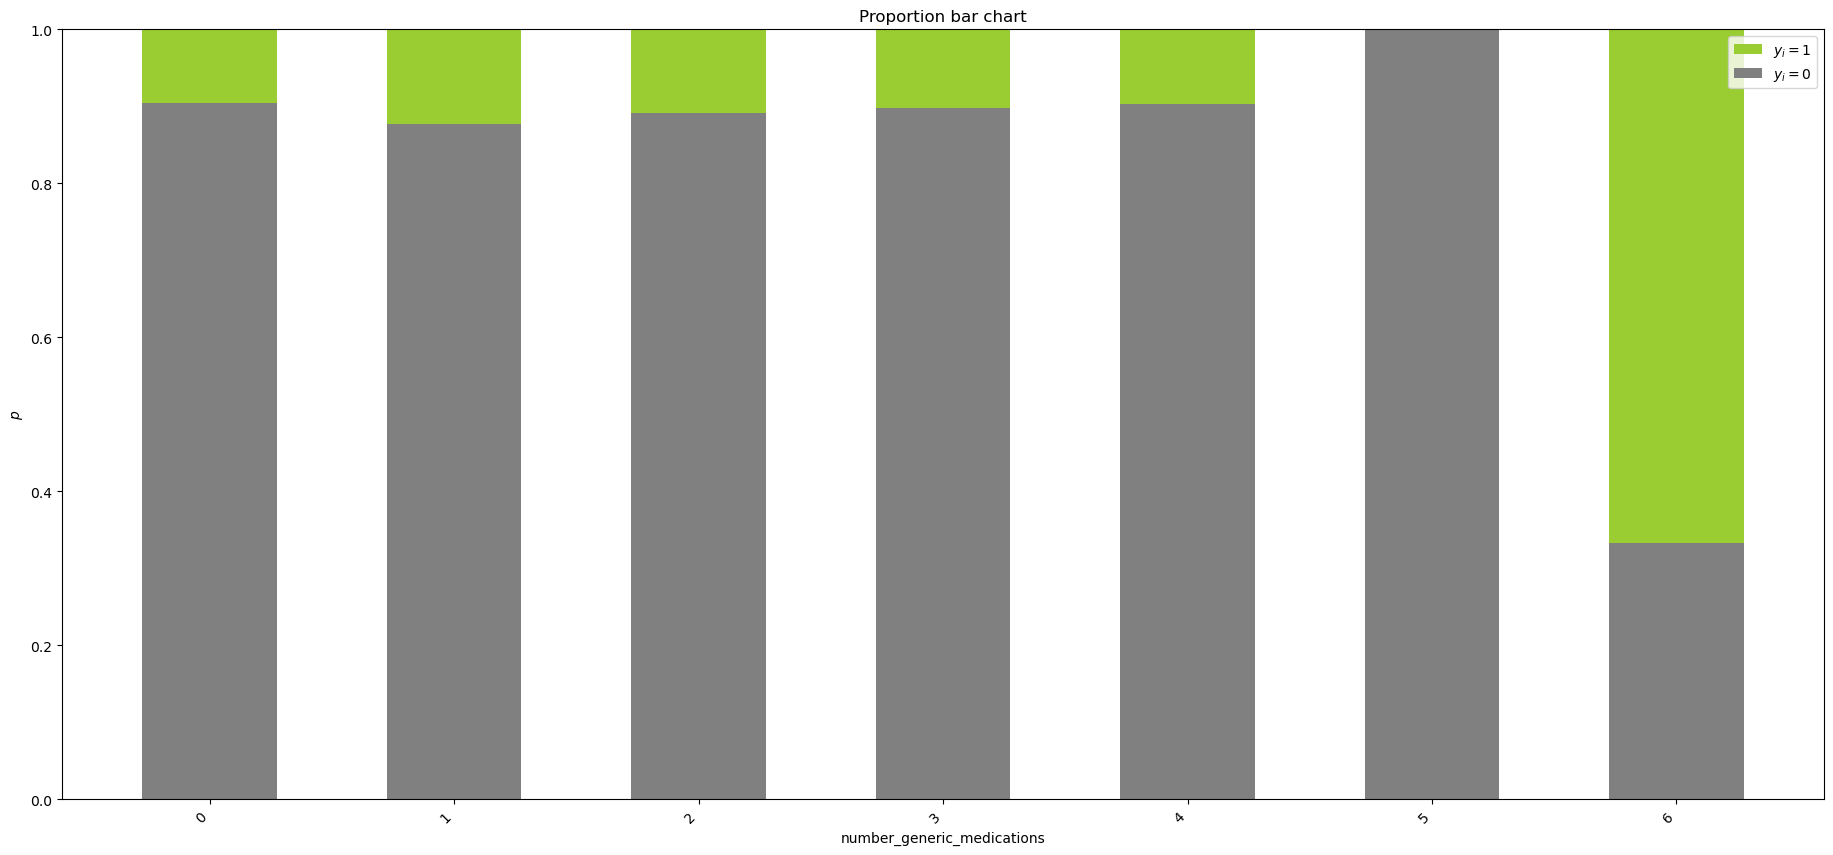

In [43]:
bar_charts_categorical(train, "number_generic_medications", "readmitted_binary")

In [44]:
# Split medications based on commas
train['medication'] = train['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get unique medications
medications = set(x for sublist in train['medication'] for x in sublist)

# Create new columns for each medication
for med in medications:
    train[med] = train['medication'].apply(lambda x: 1 if med in x else 0)

In [45]:
# Split medications based on commas and handle names with "-"
test['medication'] = test['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get unique medications
medications = set(x for sublist in test['medication'] for x in sublist)

# Create new columns for each medication
for med in medications:
    test[med] = test['medication'].apply(lambda x: 1 if med in x else 0)

In [46]:
medications

{'acarbose',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glipizide-metformin',
 'glyburide',
 'glyburide-metformin',
 'insulin',
 'metformin',
 'metformin-rosiglitazone',
 'miglitol',
 'nateglinide',
 'no_medication',
 'pioglitazone',
 'repaglinide',
 'rosiglitazone',
 'tolazamide',
 'tolbutamide',
 'troglitazone'}

In [47]:
train.drop('medication', axis=1, inplace=True)
test.drop('medication', axis=1, inplace=True)

In [48]:
train['Sulfonylureas'] = train['glipizide']+train['glyburide']+train['tolbutamide']+train['acetohexamide']+train['chlorpropamide']
+train['glimepiride']+train['tolazamide']
train['Meglitinides'] = train['repaglinide'] + train['nateglinide']
train['Thiazolidinediones'] = train['pioglitazone'] + train['rosiglitazone'] + train['troglitazone']
train['Alpha_Glucosidase_Inhibitors'] = train['acarbose'] + train['miglitol']
train['Combination_Medications'] = train['glimepiride-pioglitazone']+train['glyburide-metformin']+train['metformin-pioglitazone']
+train['glipizide-metformin']+train['metformin-rosiglitazone']

encounter_id
533253    0
426224    0
634063    0
890610    0
654194    0
         ..
660160    0
826429    0
332030    0
757560    0
459757    0
Length: 71236, dtype: int64

In [49]:
test['Sulfonylureas'] = test['glipizide'] + test['glyburide'] + test['tolbutamide'] + test['chlorpropamide'] + test['glimepiride'] + test['tolazamide']
test['Meglitinides'] = test['repaglinide'] + test['nateglinide']
test['Thiazolidinediones'] = test['pioglitazone'] + test['rosiglitazone'] + test['troglitazone']
test['Alpha_Glucosidase_Inhibitors'] = test['acarbose'] + test['miglitol']
test['Combination_Medications'] = test['glipizide-metformin'] + test['metformin-rosiglitazone']

In [50]:
train.drop(['tolazamide', 'miglitol', 'repaglinide', 'nateglinide',
            'glimepiride-pioglitazone', 'glipizide', 'pioglitazone',
            'glyburide', 'acetohexamide', 'tolbutamide','acarbose',
            'glyburide-metformin', 'metformin-pioglitazone', 'glipizide-metformin',
            'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
            'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [51]:
test.drop(['tolazamide', 'miglitol', 'repaglinide', 'nateglinide', 
           'glipizide', 'pioglitazone','glyburide', 'tolbutamide',
           'acarbose', 'glyburide-metformin', 'glipizide-metformin',
           'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
           'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [52]:
medication_columns = ['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
                      'Combination_Medications','insulin','metformin','no_medication']
for col in medication_columns:
    print(train[col].value_counts(), '\n')

Sulfonylureas
0    54890
1    16194
2      152
Name: count, dtype: int64 

Meglitinides
0    69686
1     1544
2        6
Name: count, dtype: int64 

Thiazolidinediones
0    61699
1     9507
2       30
Name: count, dtype: int64 

Alpha_Glucosidase_Inhibitors
0    71003
1      233
Name: count, dtype: int64 

Combination_Medications
0    70737
1      499
Name: count, dtype: int64 

insulin
1    38105
0    33131
Name: count, dtype: int64 

metformin
0    57271
1    13965
Name: count, dtype: int64 

no_medication
0    54890
1    16346
Name: count, dtype: int64 



In [53]:
for col in medication_columns:
    print(test[col].value_counts(), '\n')

Sulfonylureas
0    22067
1     8350
2      113
Name: count, dtype: int64 

Meglitinides
0    29847
1      680
2        3
Name: count, dtype: int64 

Thiazolidinediones
0    26417
1     4097
2       16
Name: count, dtype: int64 

Alpha_Glucosidase_Inhibitors
0    30418
1      111
2        1
Name: count, dtype: int64 

Combination_Medications
0    30527
1        3
Name: count, dtype: int64 

insulin
1    16278
0    14252
Name: count, dtype: int64 

metformin
0    24507
1     6023
Name: count, dtype: int64 

no_medication
0    23473
1     7057
Name: count, dtype: int64 



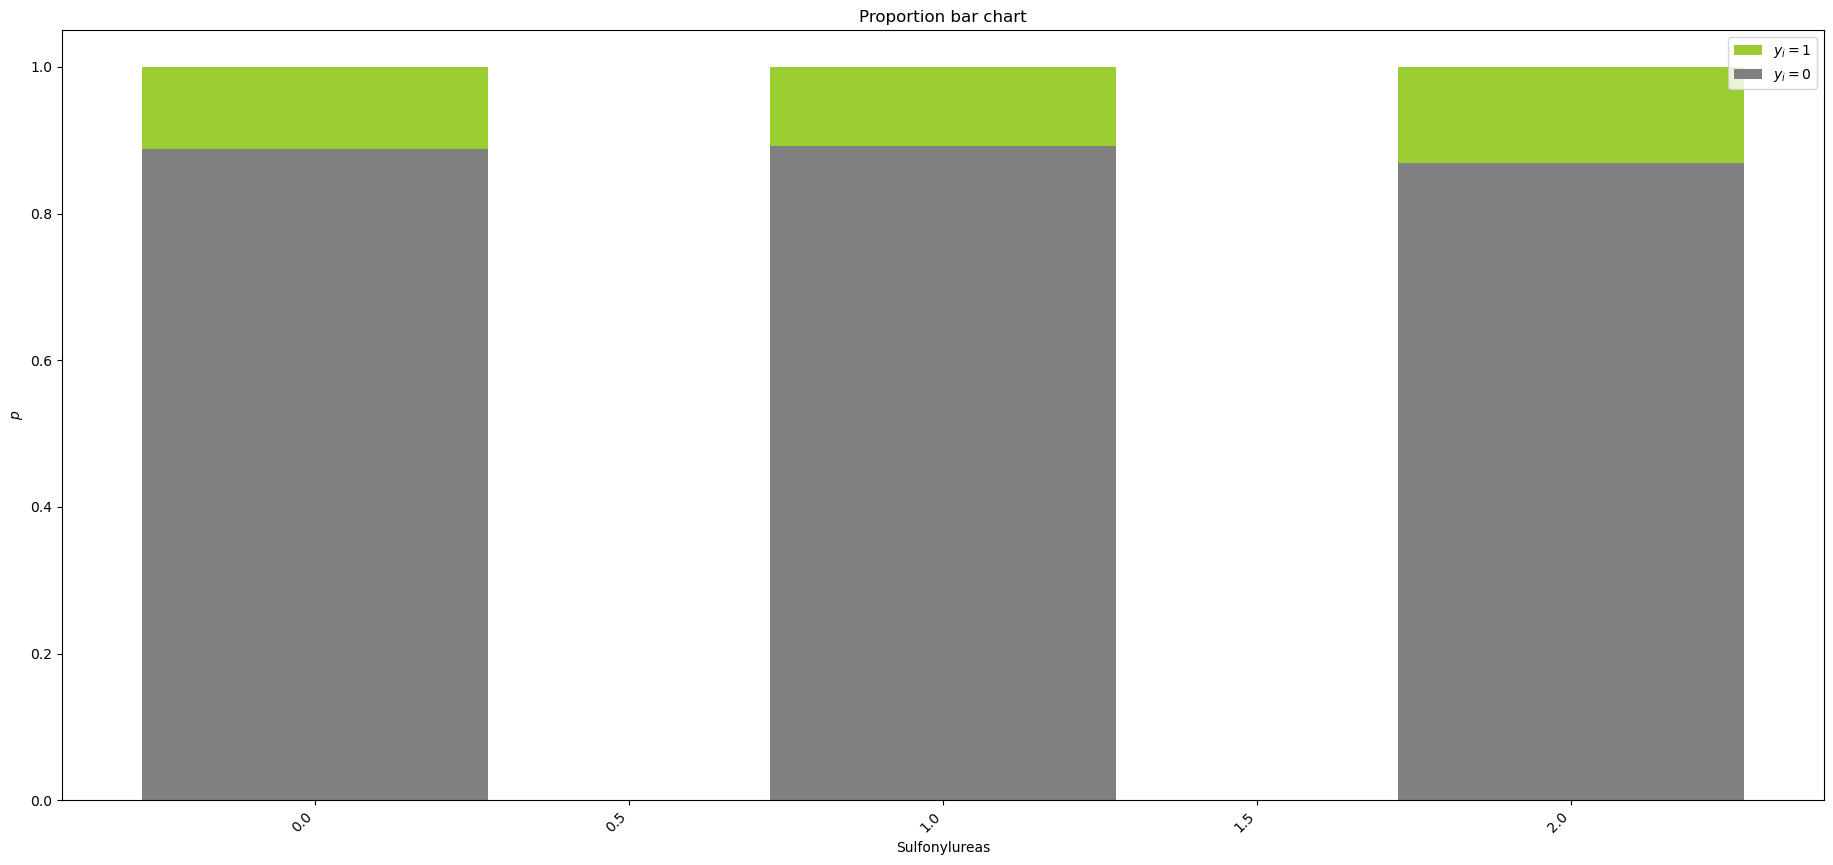

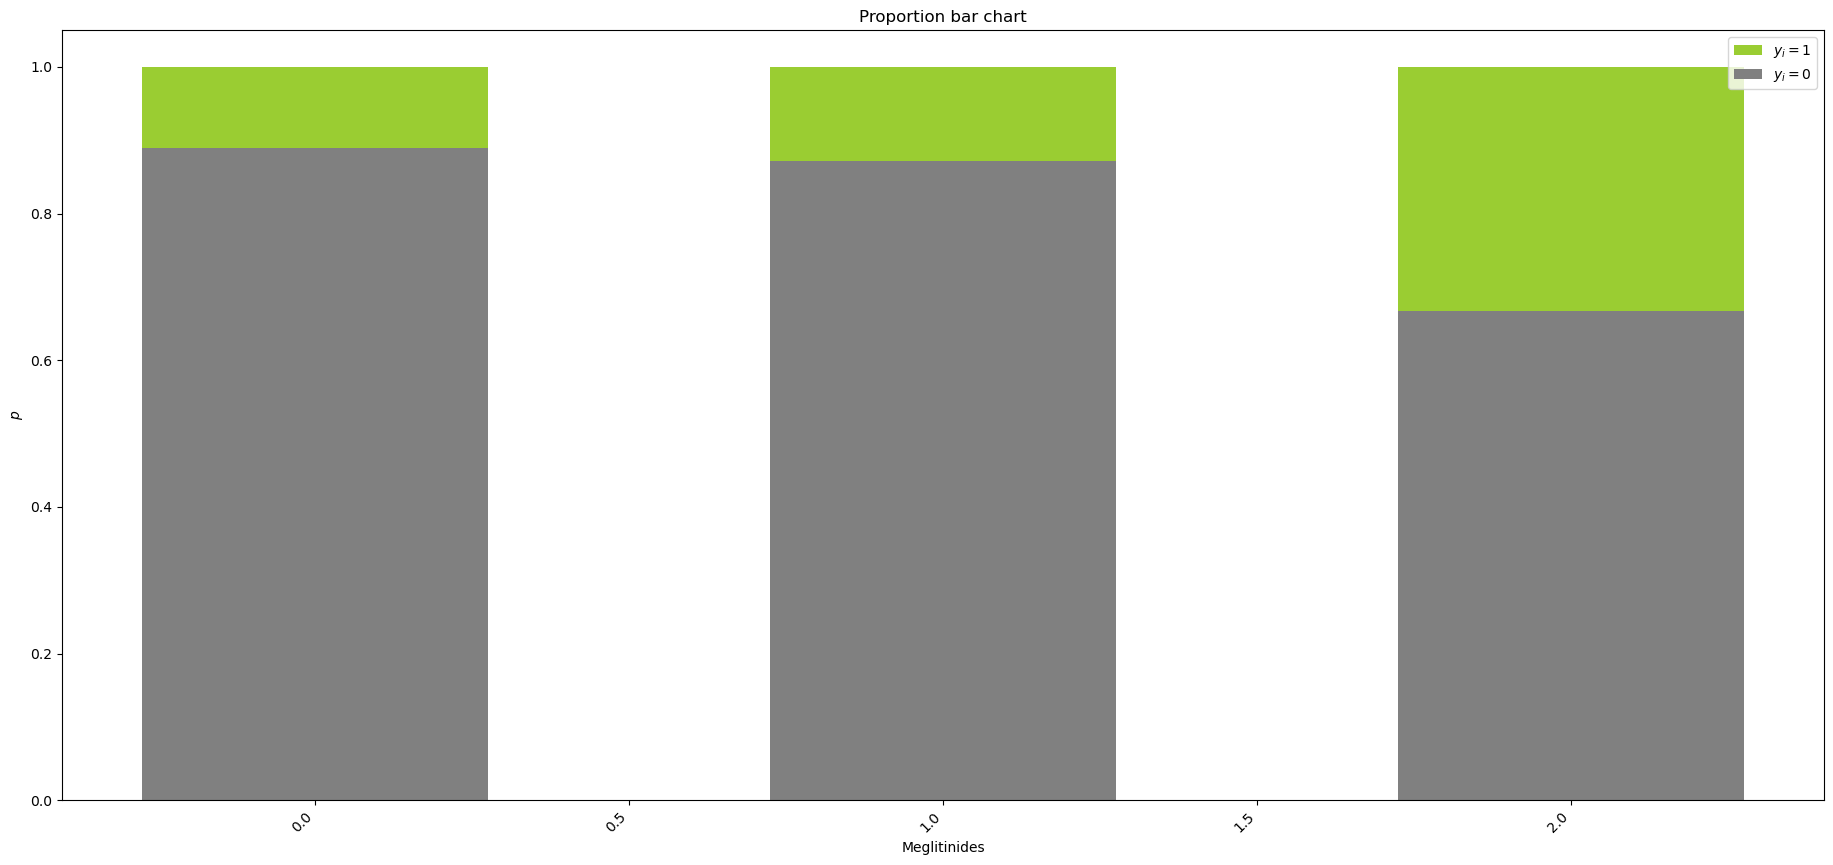

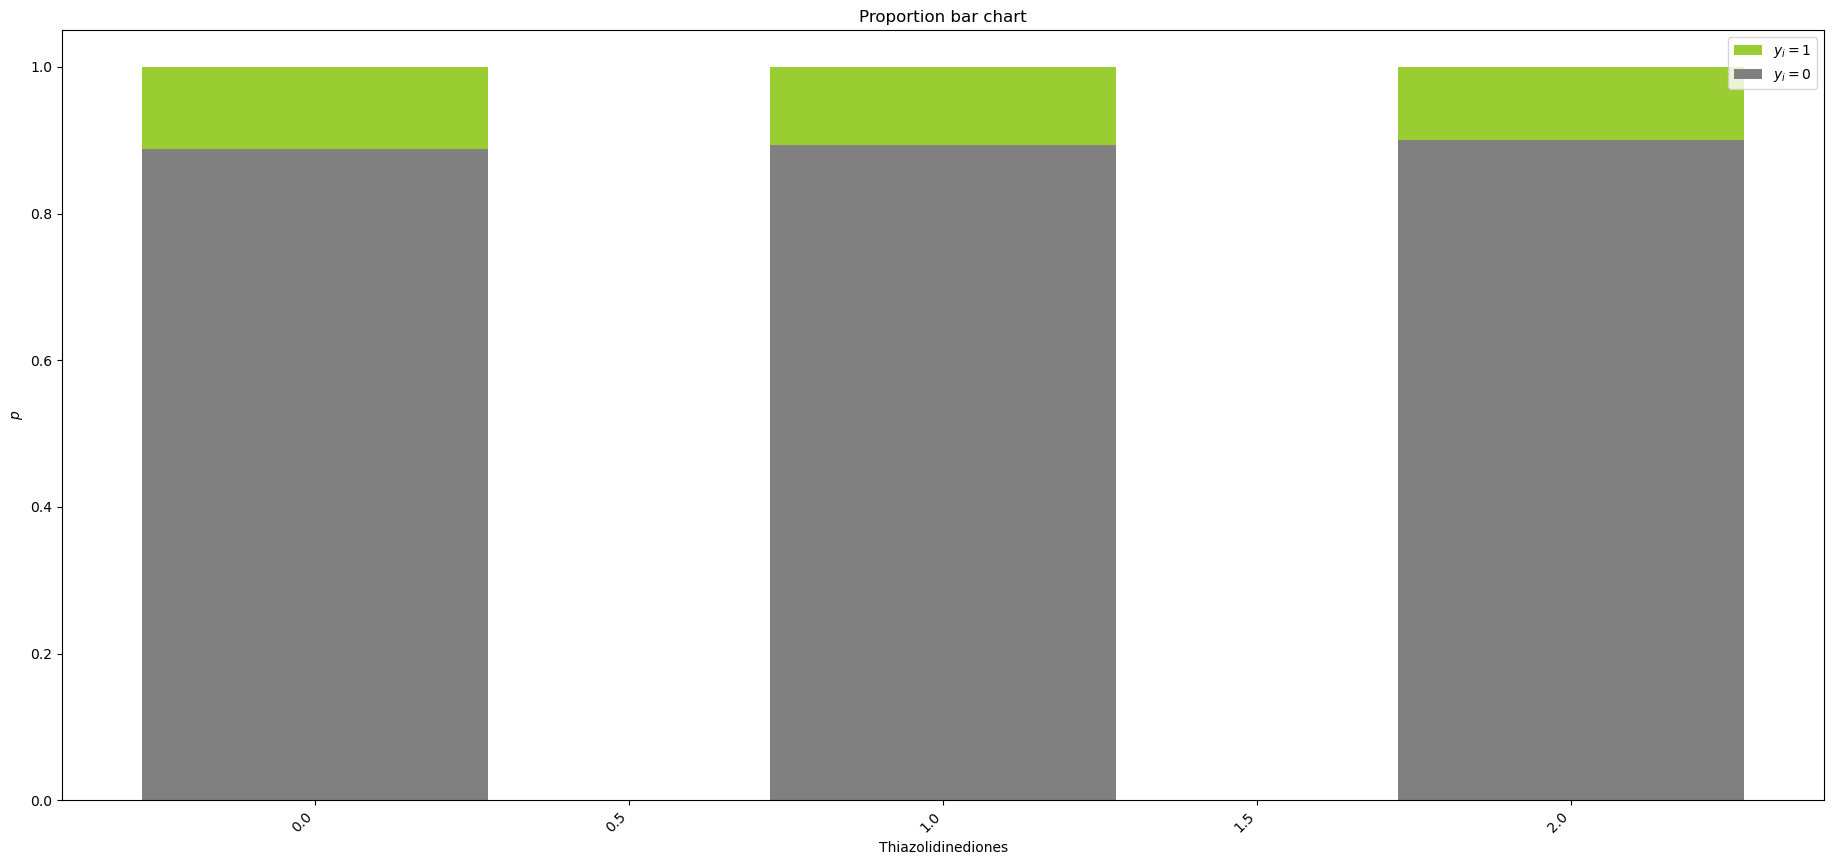

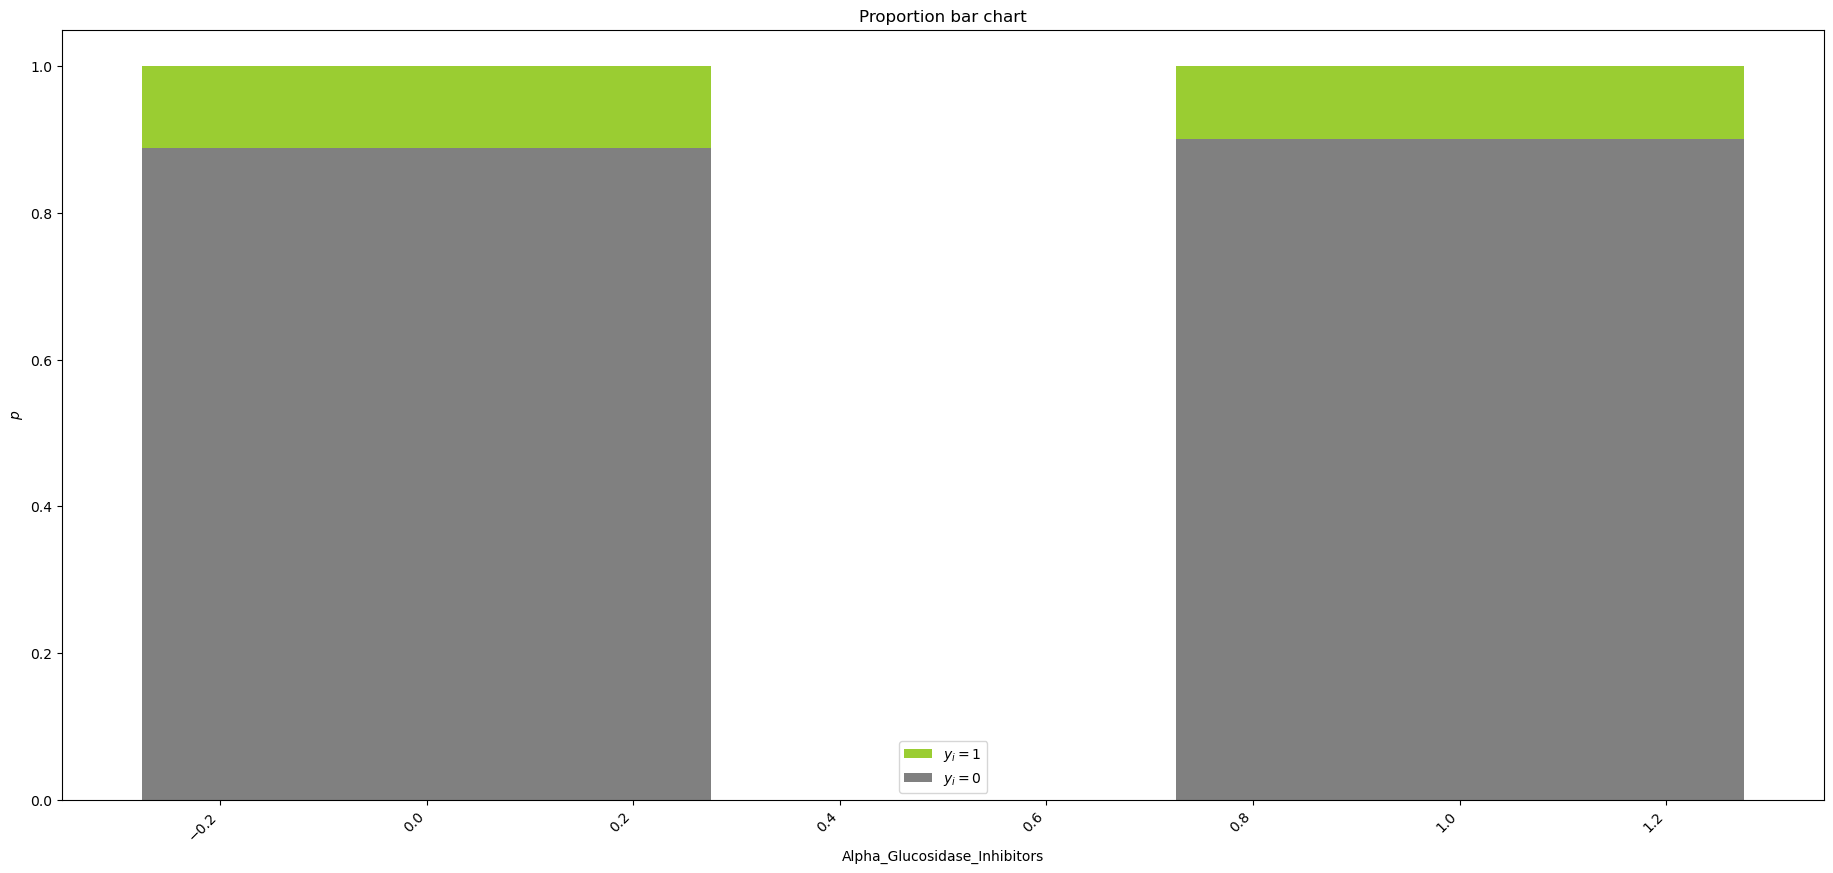

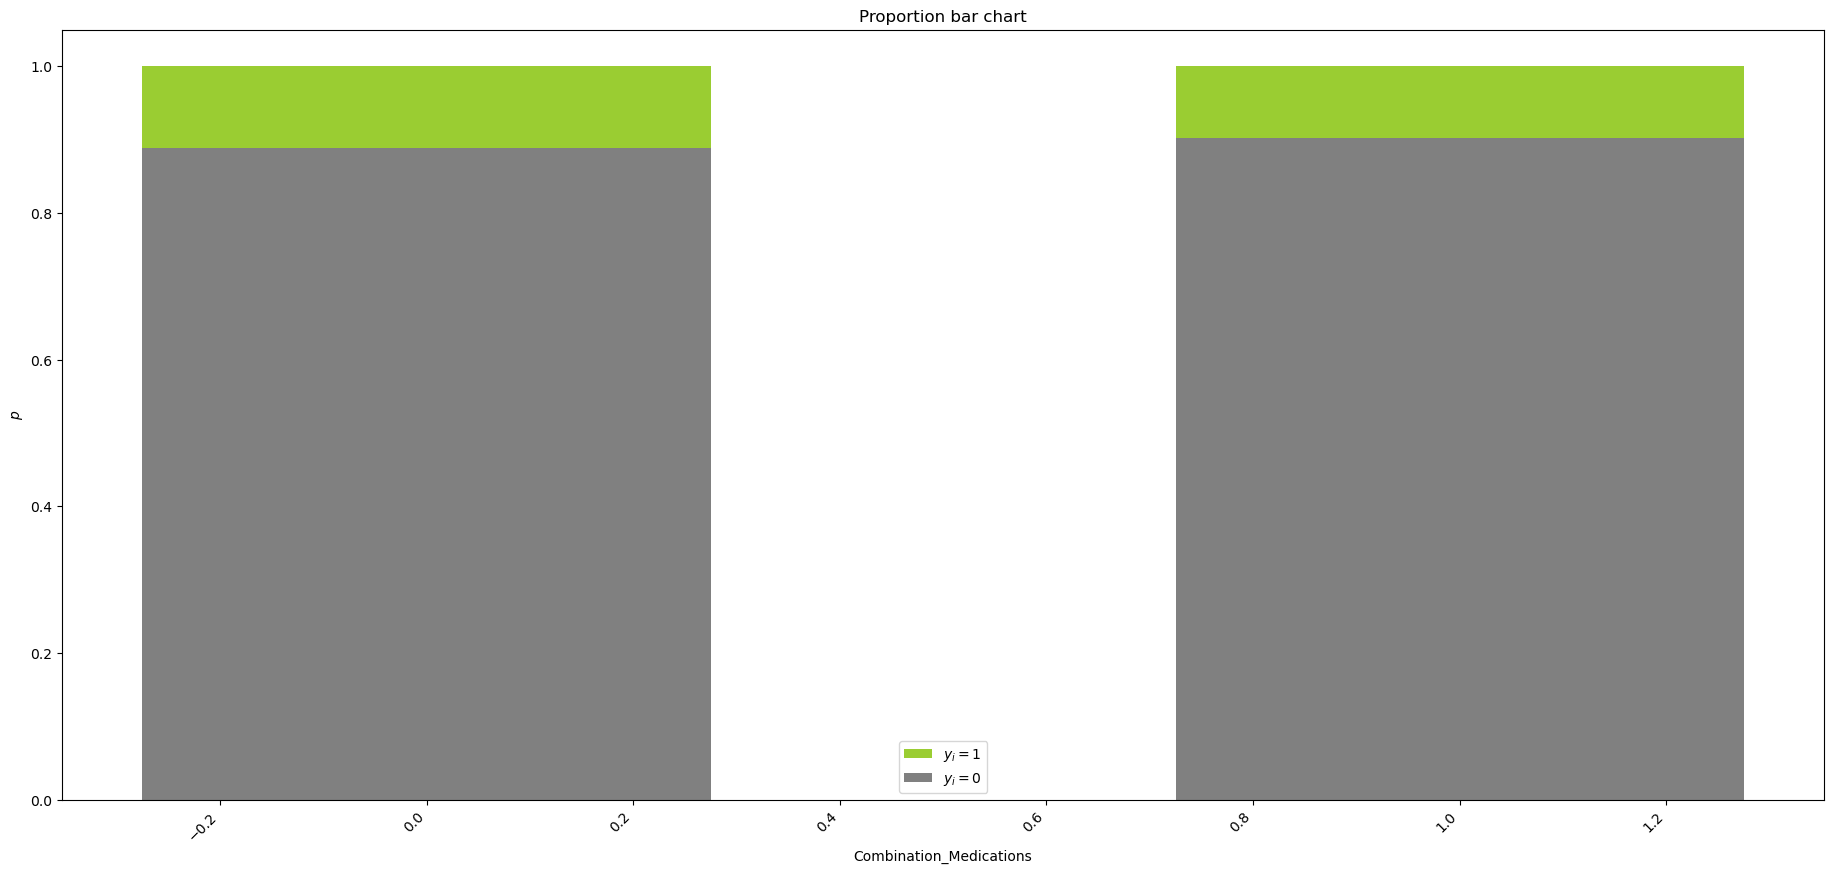

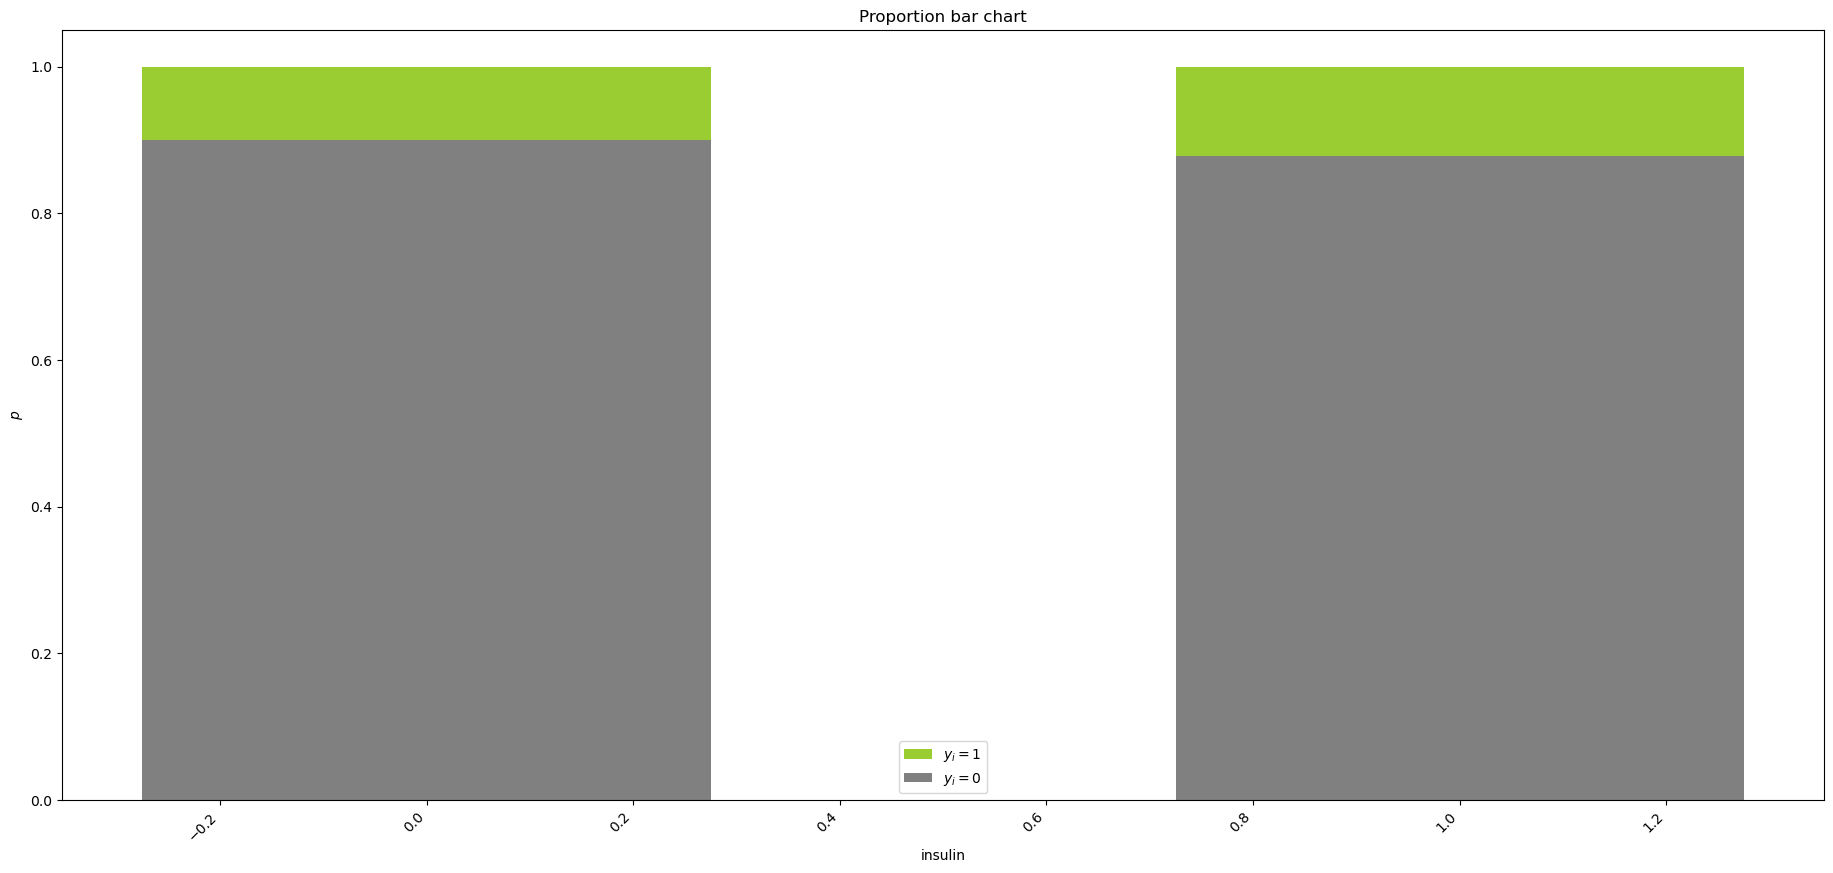

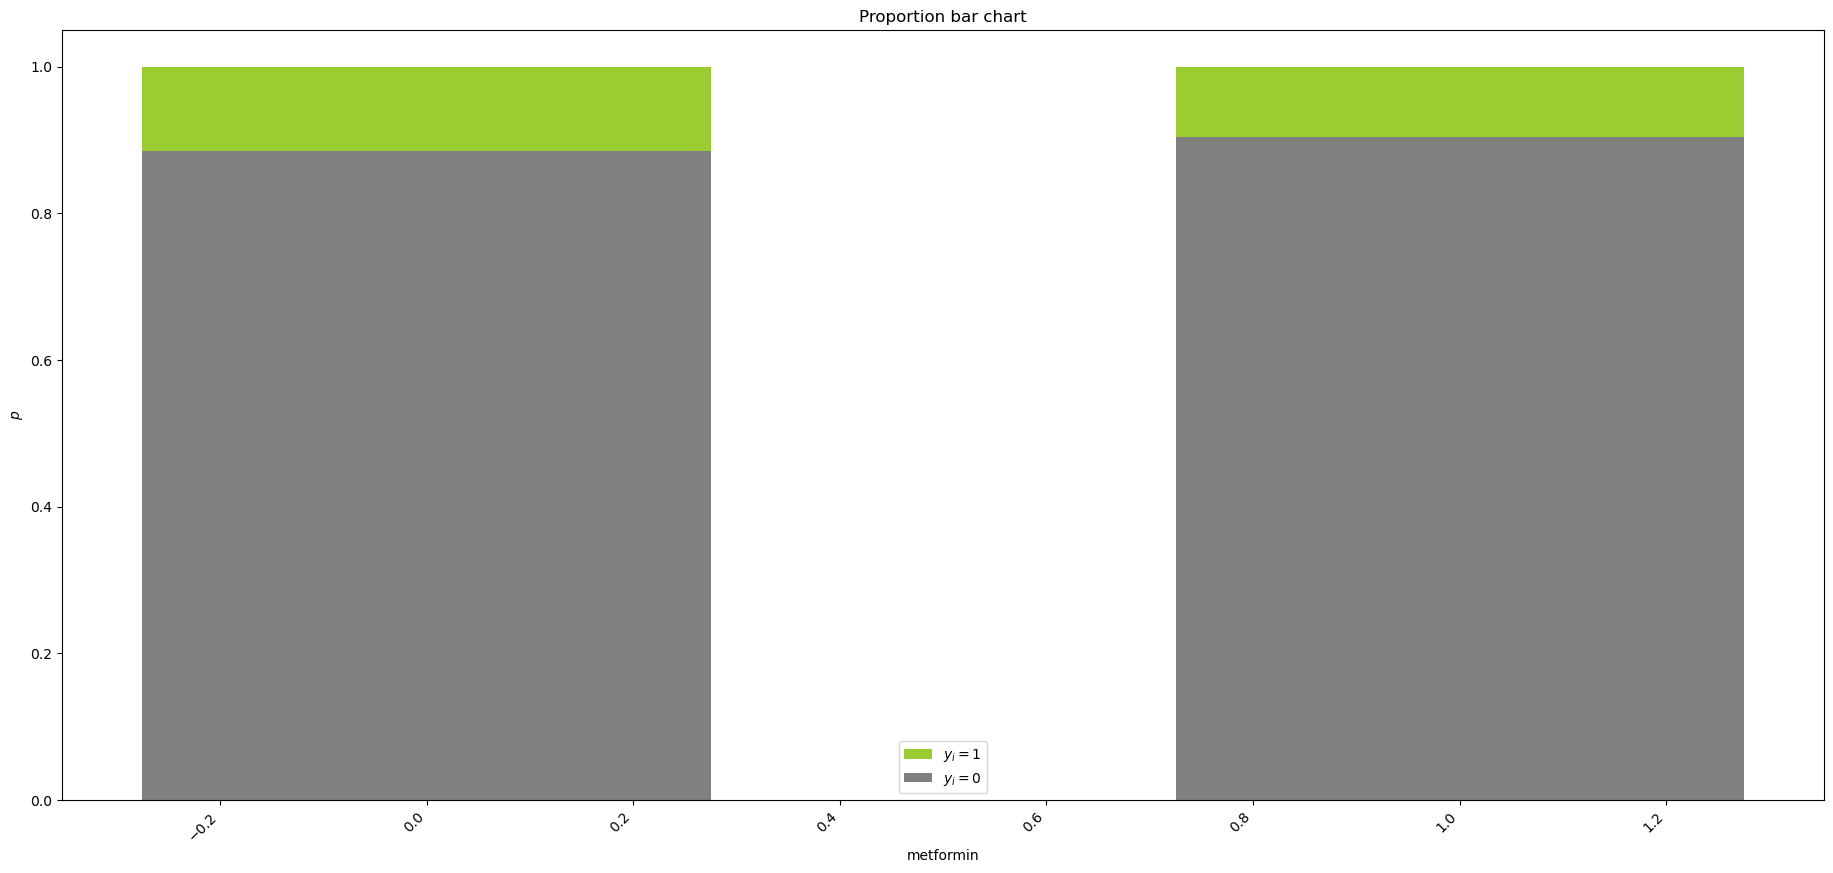

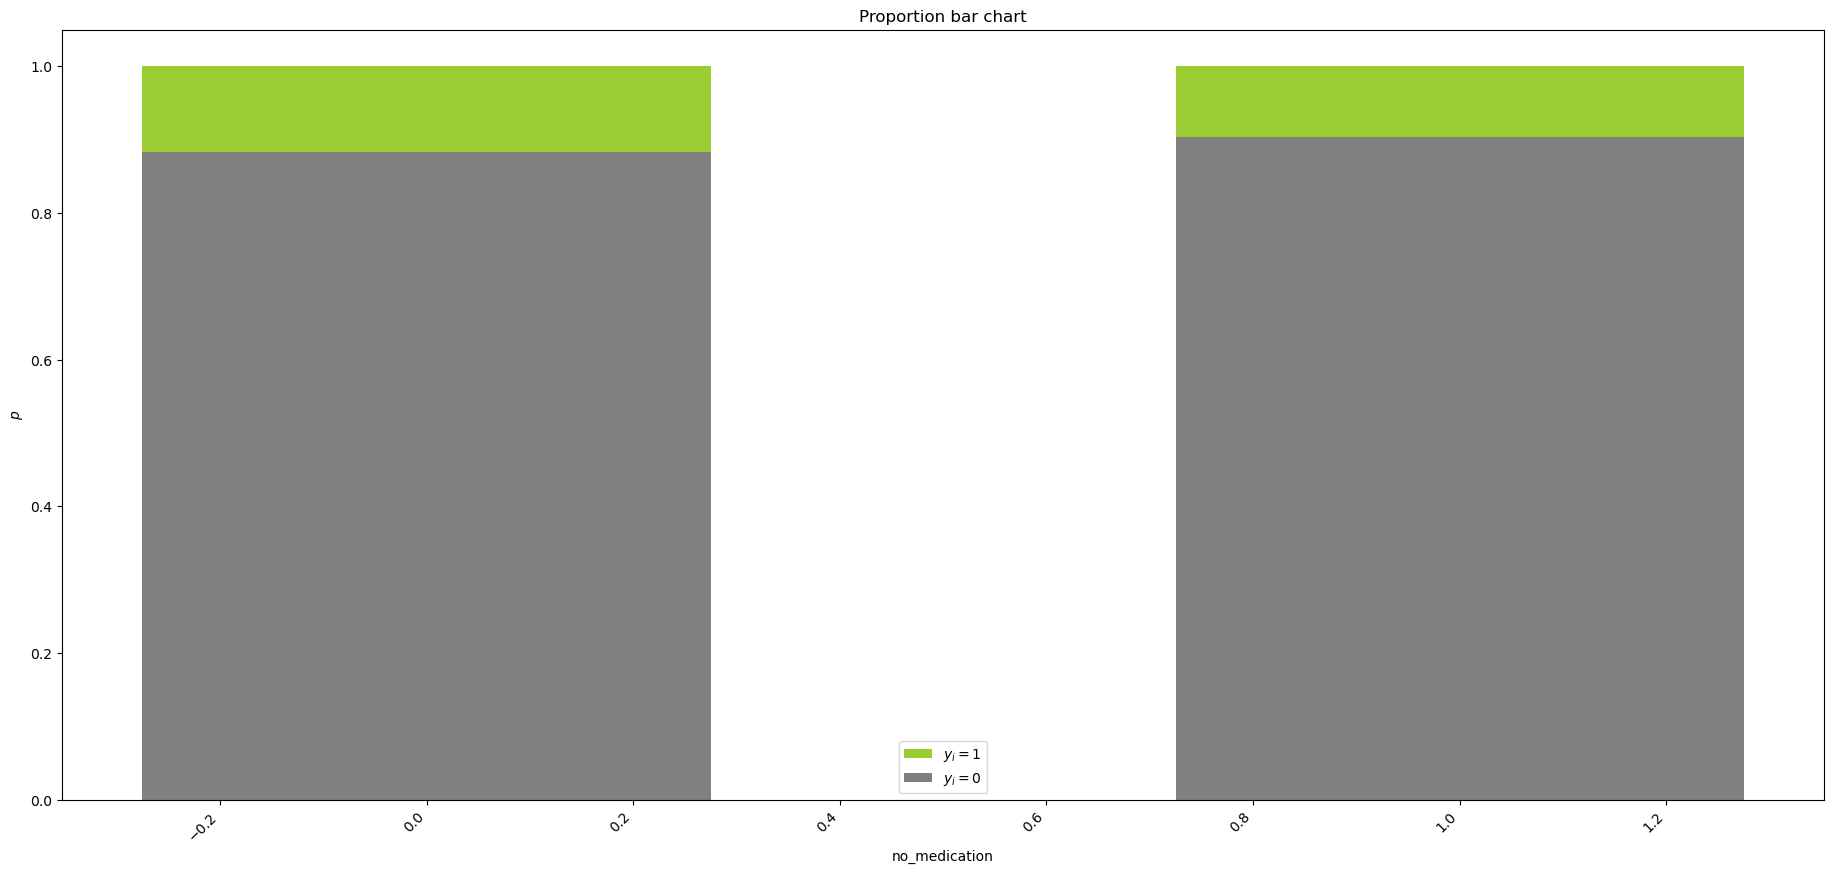

In [54]:
for col in medication_columns:
    bar_charts_categorical(train, col, "readmitted_binary")

In [55]:
# 'no_medication' is the exact oposite to 'prescribed_diabetes_meds'
train.drop('no_medication', axis=1, inplace=True)
test.drop('no_medication', axis=1, inplace=True)

In [56]:
train.columns

Index(['patient_id', 'race', 'gender', 'age', 'payer_code',
       'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'admission_type', 'medical_specialty', 'average_pulse_bpm',
       'discharge_disposition', 'admission_source', 'length_of_stay',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
       'number_diagnoses', 'glucose_test_result', 'a1c_test_result',
       'change_in_meds', 'prescribed_diabetes_meds', 'readmitted_binary',
       'readmitted_multiclass', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications'],
      dtype='object')

### age

In [57]:
train['age'].value_counts(normalize=True)

age
[70-80)     0.243683
[60-70)     0.209276
[80-90)     0.161576
[50-60)     0.160354
[40-50)     0.090095
Unknown     0.049933
[30-40)     0.035600
[90-100)    0.026321
[20-30)     0.015035
[10-20)     0.006654
[0-10)      0.001474
Name: proportion, dtype: float64

In [58]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')

# Calculate the midpoint age
df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                                            (df['Lower_Age'] + df['Upper_Age']) / 2, np.nan)

train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [59]:
data = test['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')

# Calculate the midpoint age
df['Midpoint_Age'] = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                              (df['Lower_Age'] + df['Upper_Age']) / 2, np.nan)

test['Midpoint_Age'] = df['Midpoint_Age']
test.drop('age', axis=1, inplace=True)

In [60]:
train['Midpoint_Age'].fillna('Unknown', inplace=True)
train[train['Midpoint_Age']=='Unknown'].shape[0]

3557

In [61]:
test['Midpoint_Age'].fillna('Unknown', inplace=True)
test[test['Midpoint_Age']=='Unknown'].shape[0]

1531

In [62]:
# Age Imputation by Patient
def fill_age(df):
    for i, row in df.iterrows():
        if row['Midpoint_Age'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['Midpoint_Age'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'Midpoint_Age'] = other_rows.iloc[0]['Midpoint_Age']

In [63]:
fill_age(train)
train[train['Midpoint_Age']=='Unknown'].shape[0]

2217

In [64]:
fill_age(test)
test[test['Midpoint_Age']=='Unknown'].shape[0]

1194

In [65]:
train['Midpoint_Age'].unique()

array([75.0, 55.0, 65.0, 85.0, 45.0, 'Unknown', 25.0, 35.0, 95.0, 15.0,
       5.0], dtype=object)

### gender

In [66]:
train['gender'].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [67]:
#Female = 0, Male = 1 and the Unknown/Invalid becomes Female because it is the mode in train
train['gender_binary'] = np.where(train['gender']=='Male',1,0)
train.drop('gender', axis=1, inplace=True)

In [68]:
test['gender_binary'] = np.where(test['gender']=='Male',1,0)
test.drop('gender', axis=1, inplace=True)

In [69]:
train['gender_binary'].value_counts()

gender_binary
0    38231
1    33005
Name: count, dtype: int64

### prescribed_diabetes_meds

In [70]:
#No = 0 | Yes = 1
train['presc_diabetes_meds_binary'] = np.where(train['prescribed_diabetes_meds']== 'Yes',1,0)
train.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [71]:
test['presc_diabetes_meds_binary'] = np.where(test['prescribed_diabetes_meds']== 'Yes',1,0)
test.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [72]:
train['presc_diabetes_meds_binary'].value_counts()

presc_diabetes_meds_binary
1    54890
0    16346
Name: count, dtype: int64

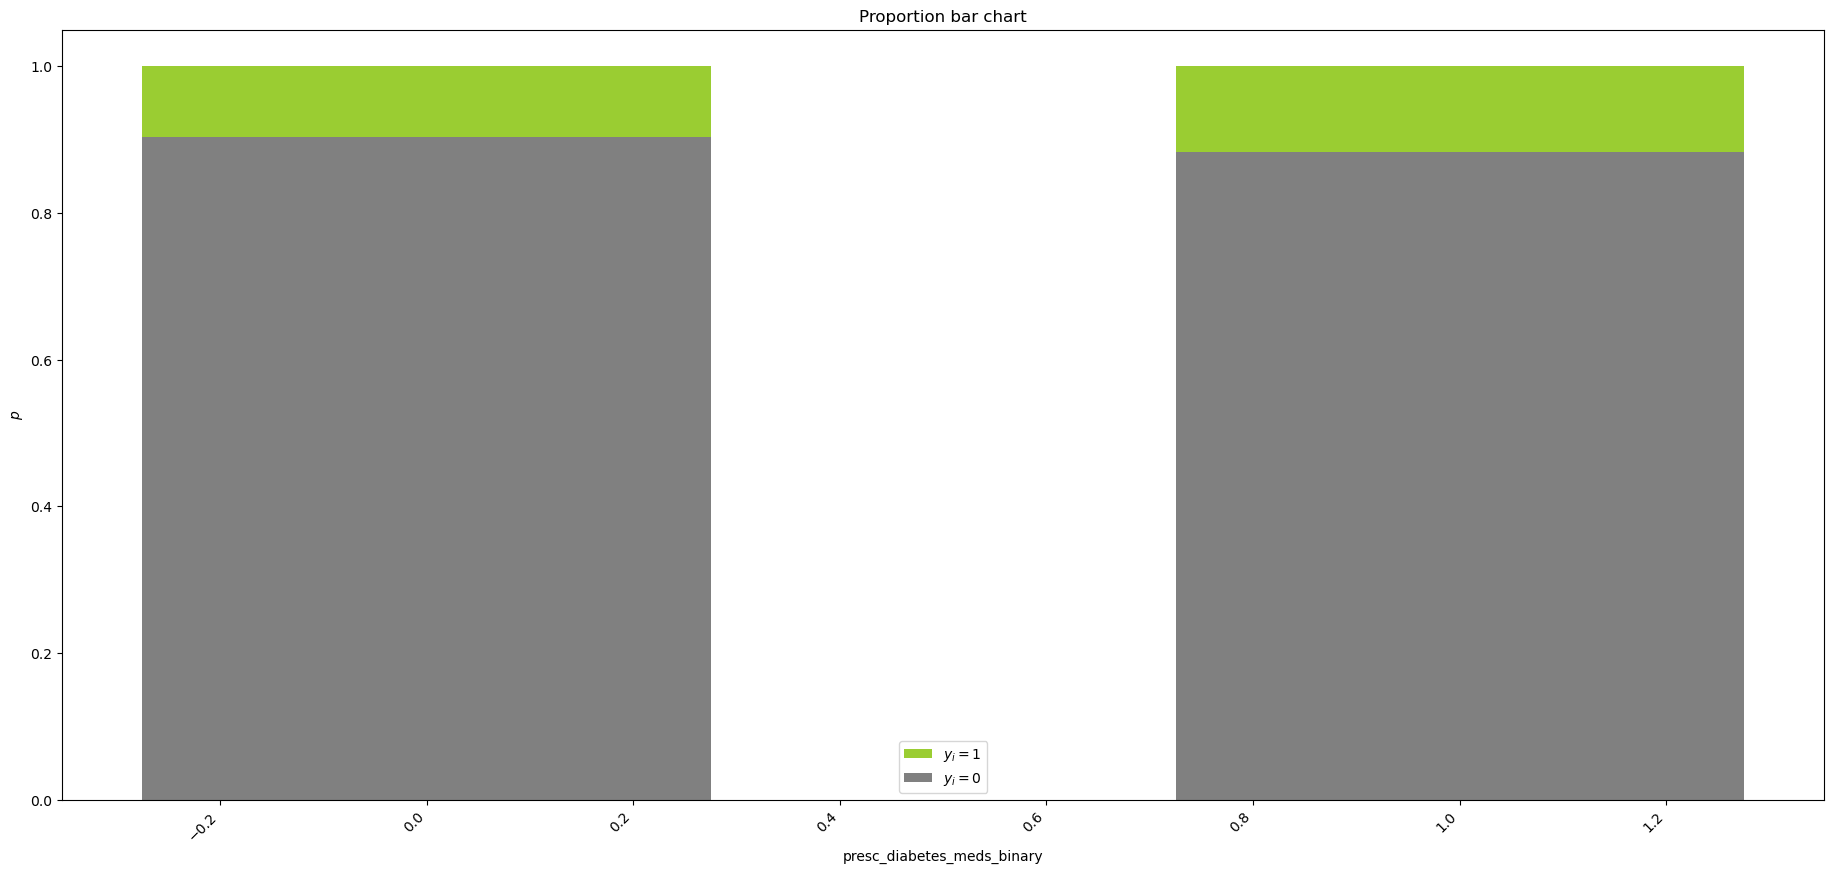

In [73]:
bar_charts_categorical(train, 'presc_diabetes_meds_binary', 'readmitted_binary')

### change_in_meds

In [74]:
#no change = 0 | change = 1
train['change_in_meds_binary'] = np.where(train['change_in_meds']=='Ch',1,0)
train.drop('change_in_meds', axis=1, inplace=True)

In [75]:
test['change_in_meds_binary'] = np.where(test['change_in_meds']== 'Ch',1,0)
test.drop('change_in_meds', axis=1, inplace=True)

In [ ]:
train['change_in_meds_binary'].value_counts()

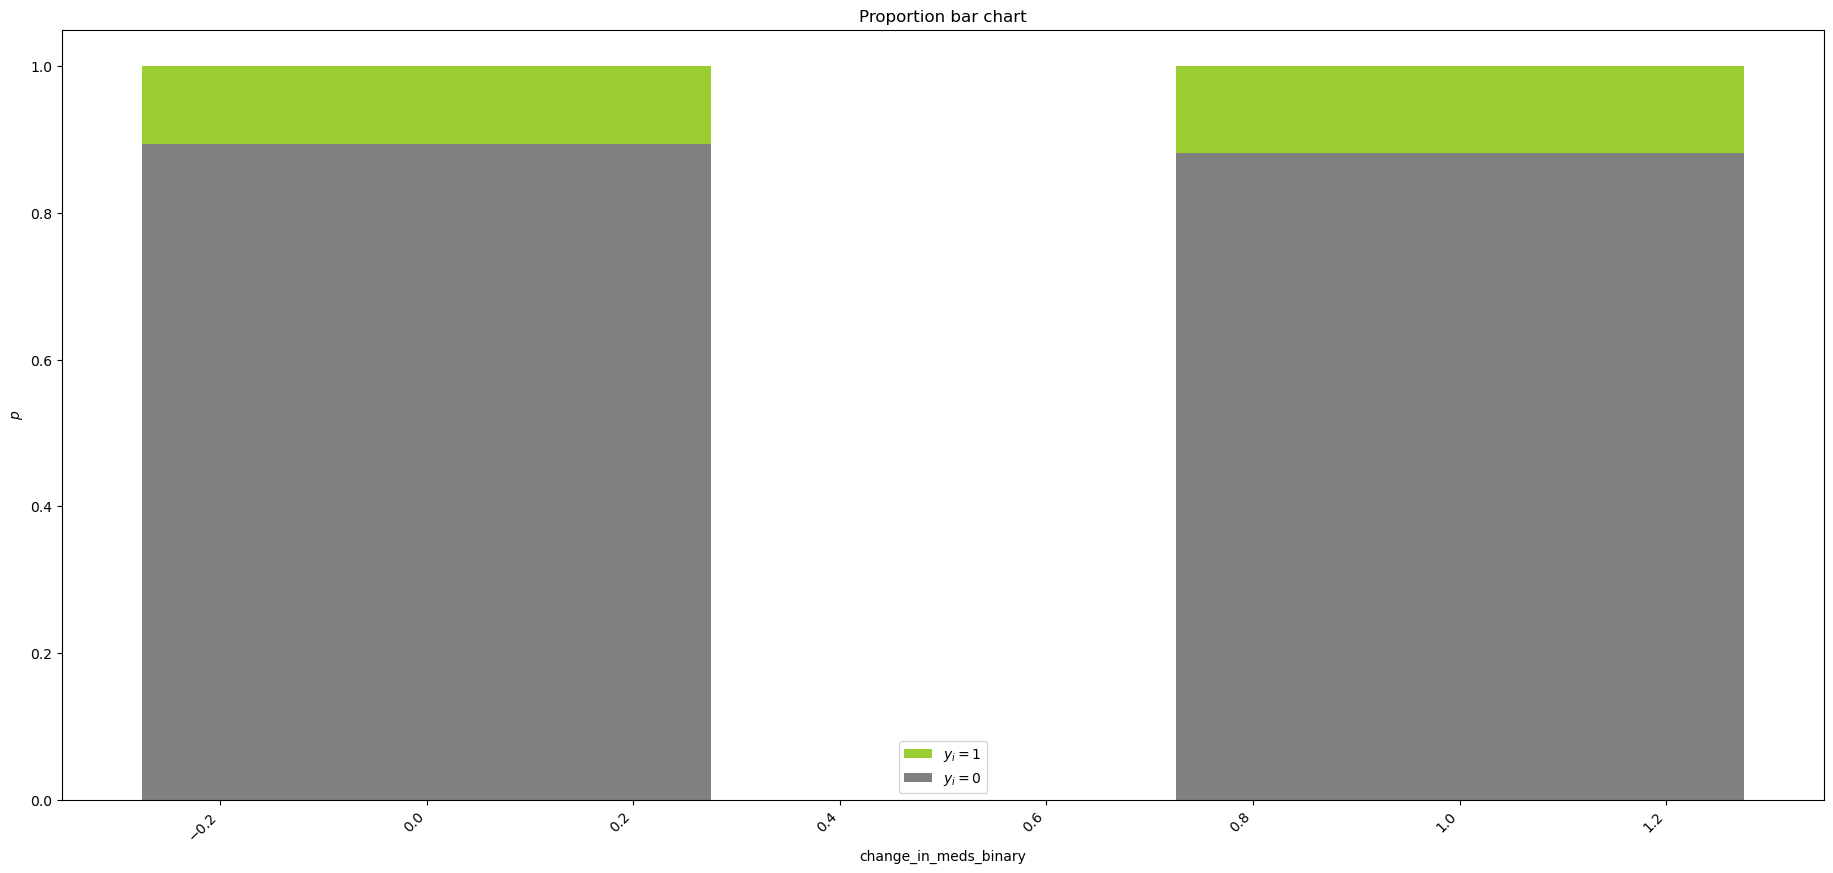

In [76]:
bar_charts_categorical(train, "change_in_meds_binary", "readmitted_binary")

### payer_code

In [77]:
train['payer_code'].value_counts(normalize=True)

payer_code
None    0.395881
MC      0.318420
HM      0.060629
SP      0.049708
BC      0.046213
MD      0.034870
CP      0.024735
UN      0.024328
CM      0.018909
OG      0.010234
PO      0.005685
DM      0.005306
CH      0.001432
WC      0.001390
OT      0.000856
MP      0.000758
SI      0.000632
FR      0.000014
Name: proportion, dtype: float64

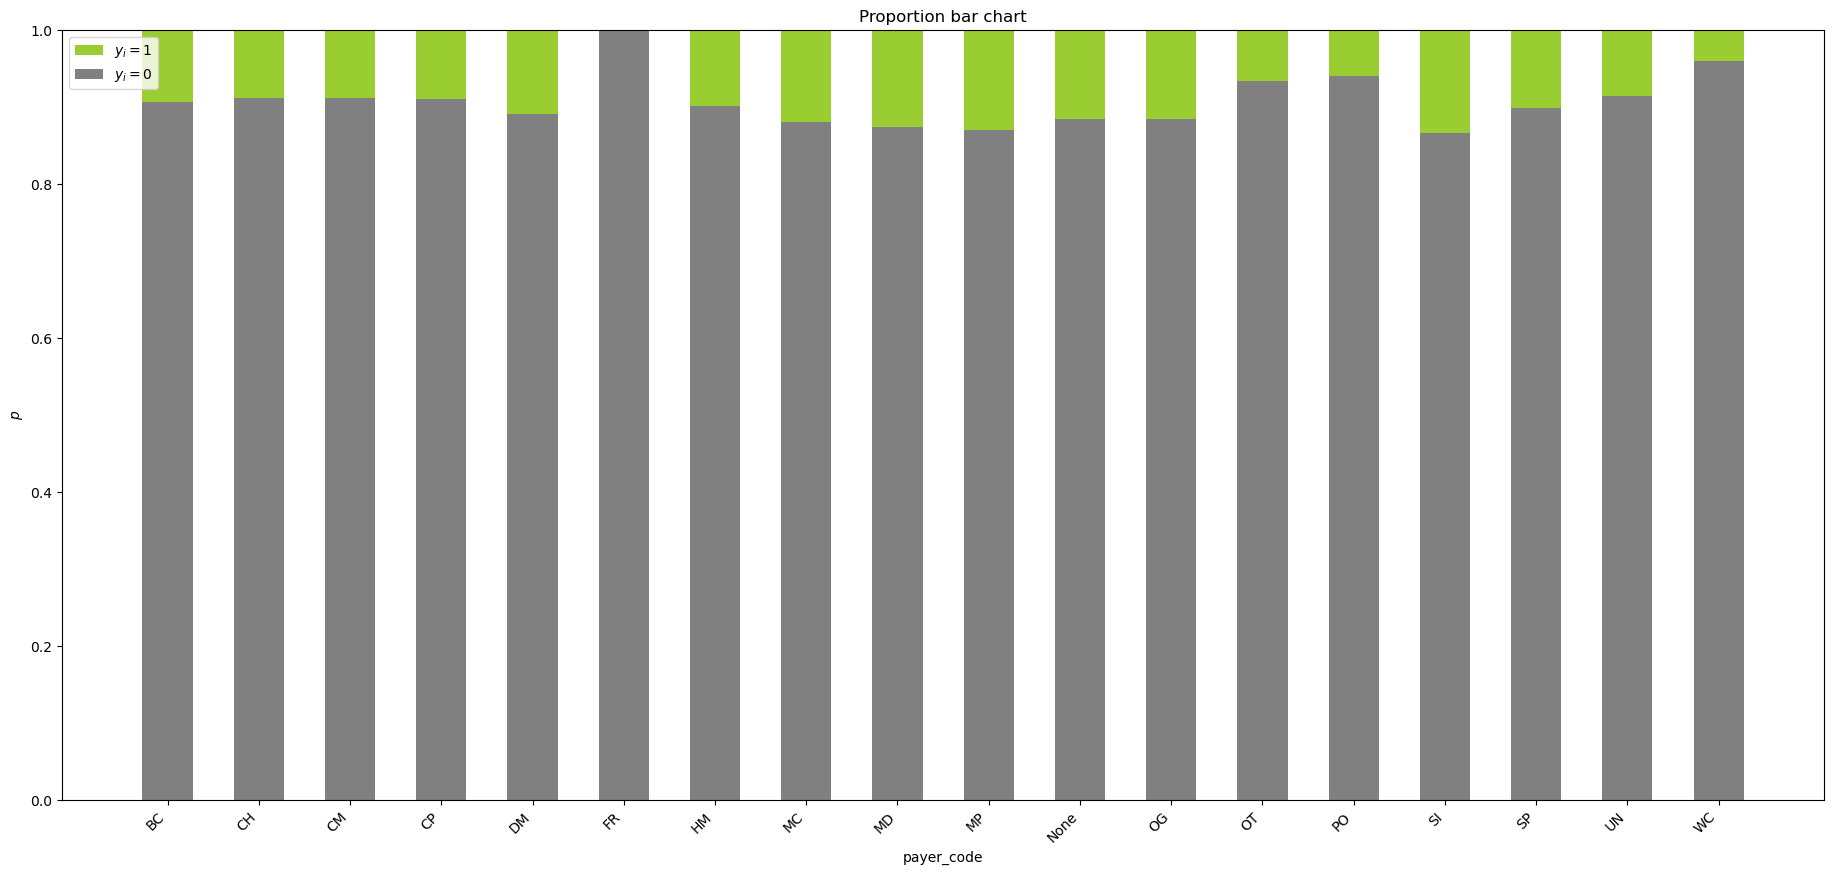

In [78]:
bar_charts_categorical(train, "payer_code", "readmitted_binary")

In [79]:
# Replacing the categories that have less than 1% of the number of rows
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index
train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other_code')

In [80]:
value_counts = test['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index
test['payer_code'] = test['payer_code'].replace(replace_payer_code, 'Other_code')

In [81]:
train['payer_code'].value_counts(normalize=True)

payer_code
None          0.395881
MC            0.318420
HM            0.060629
SP            0.049708
BC            0.046213
MD            0.034870
CP            0.024735
UN            0.024328
CM            0.018909
Other_code    0.016073
OG            0.010234
Name: proportion, dtype: float64

In [82]:
test['payer_code'].value_counts(normalize=True)

payer_code
None          0.394858
MC            0.319555
HM            0.064035
SP            0.048018
BC            0.044645
MD            0.034327
Other_code    0.026564
CP            0.025254
UN            0.023420
CM            0.019325
Name: proportion, dtype: float64

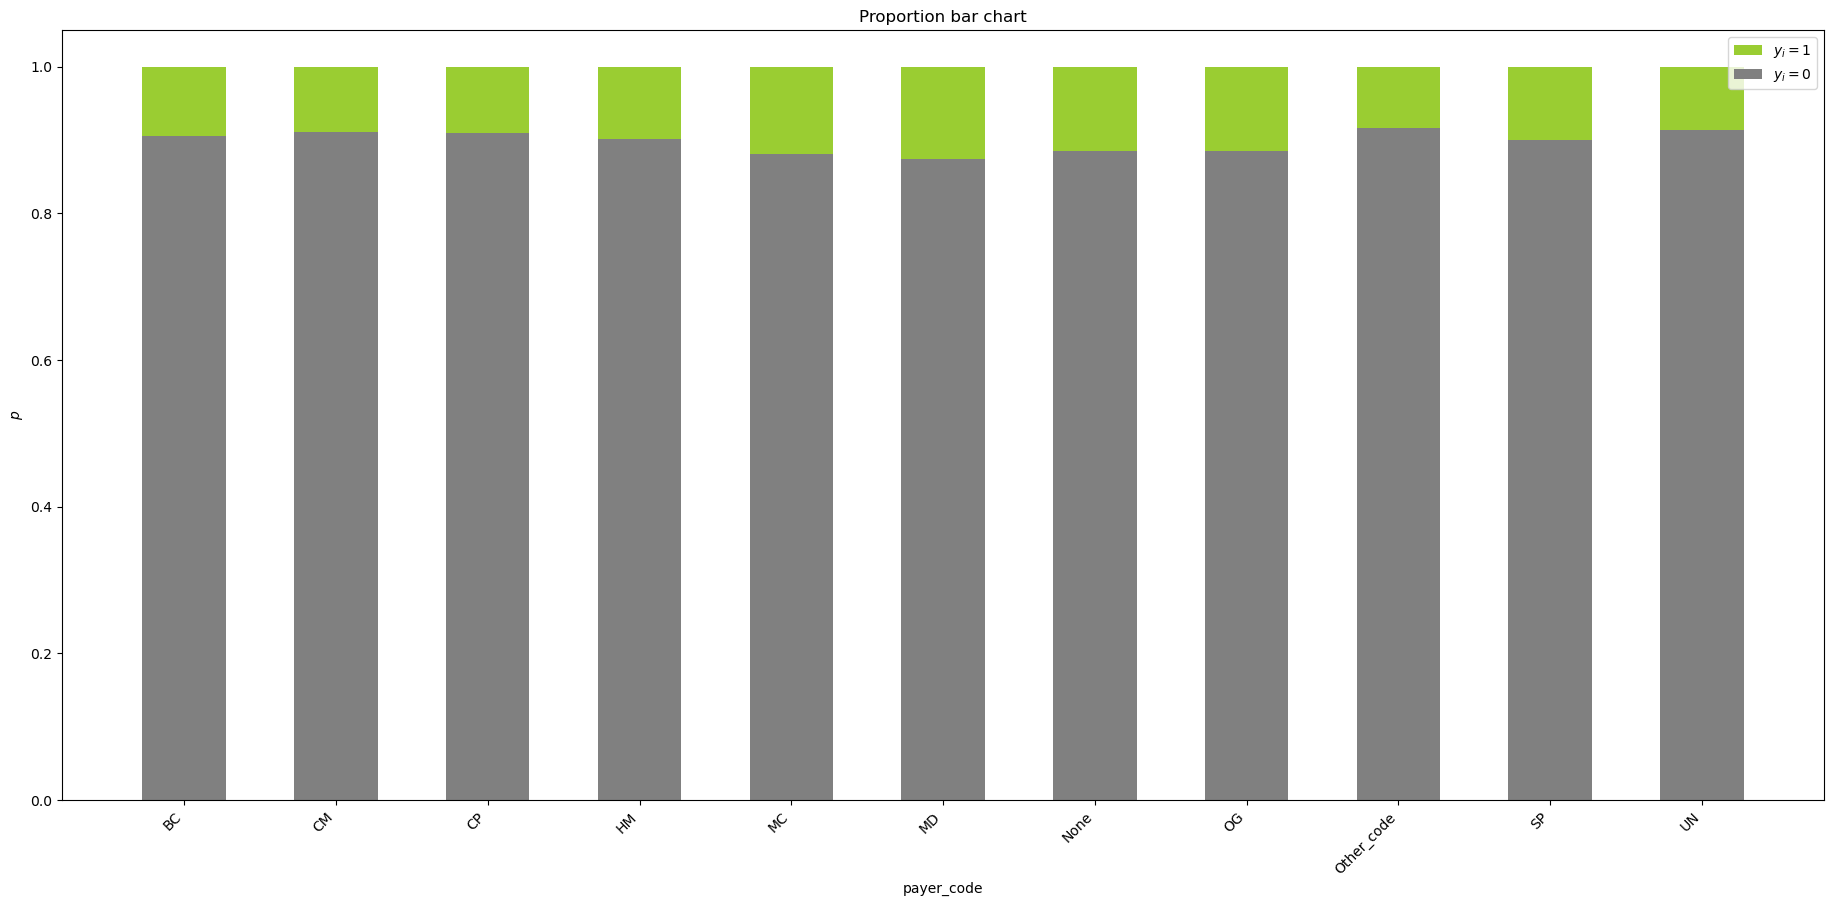

In [83]:
bar_charts_categorical(train, "payer_code", "readmitted_binary")

In [84]:
train['Has_Insurance'] = train['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

In [85]:
test['Has_Insurance'] = test['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

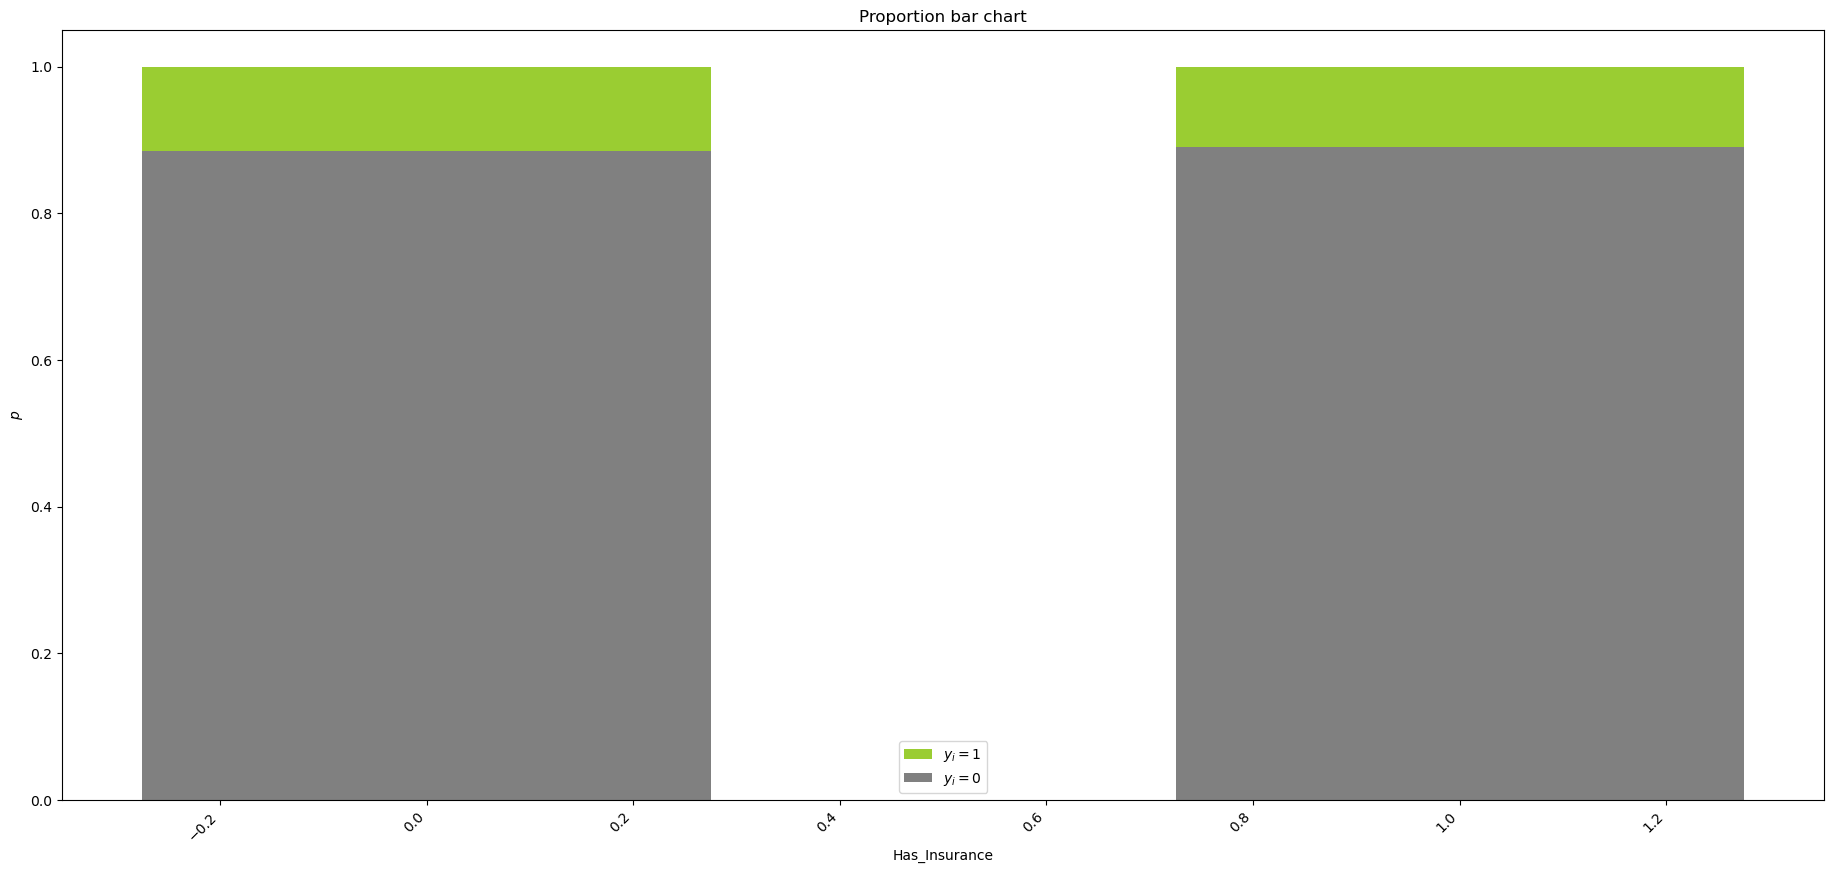

In [86]:
bar_charts_categorical(train, "Has_Insurance", "readmitted_binary")

### admission_type

In [88]:
train["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Unknown           3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

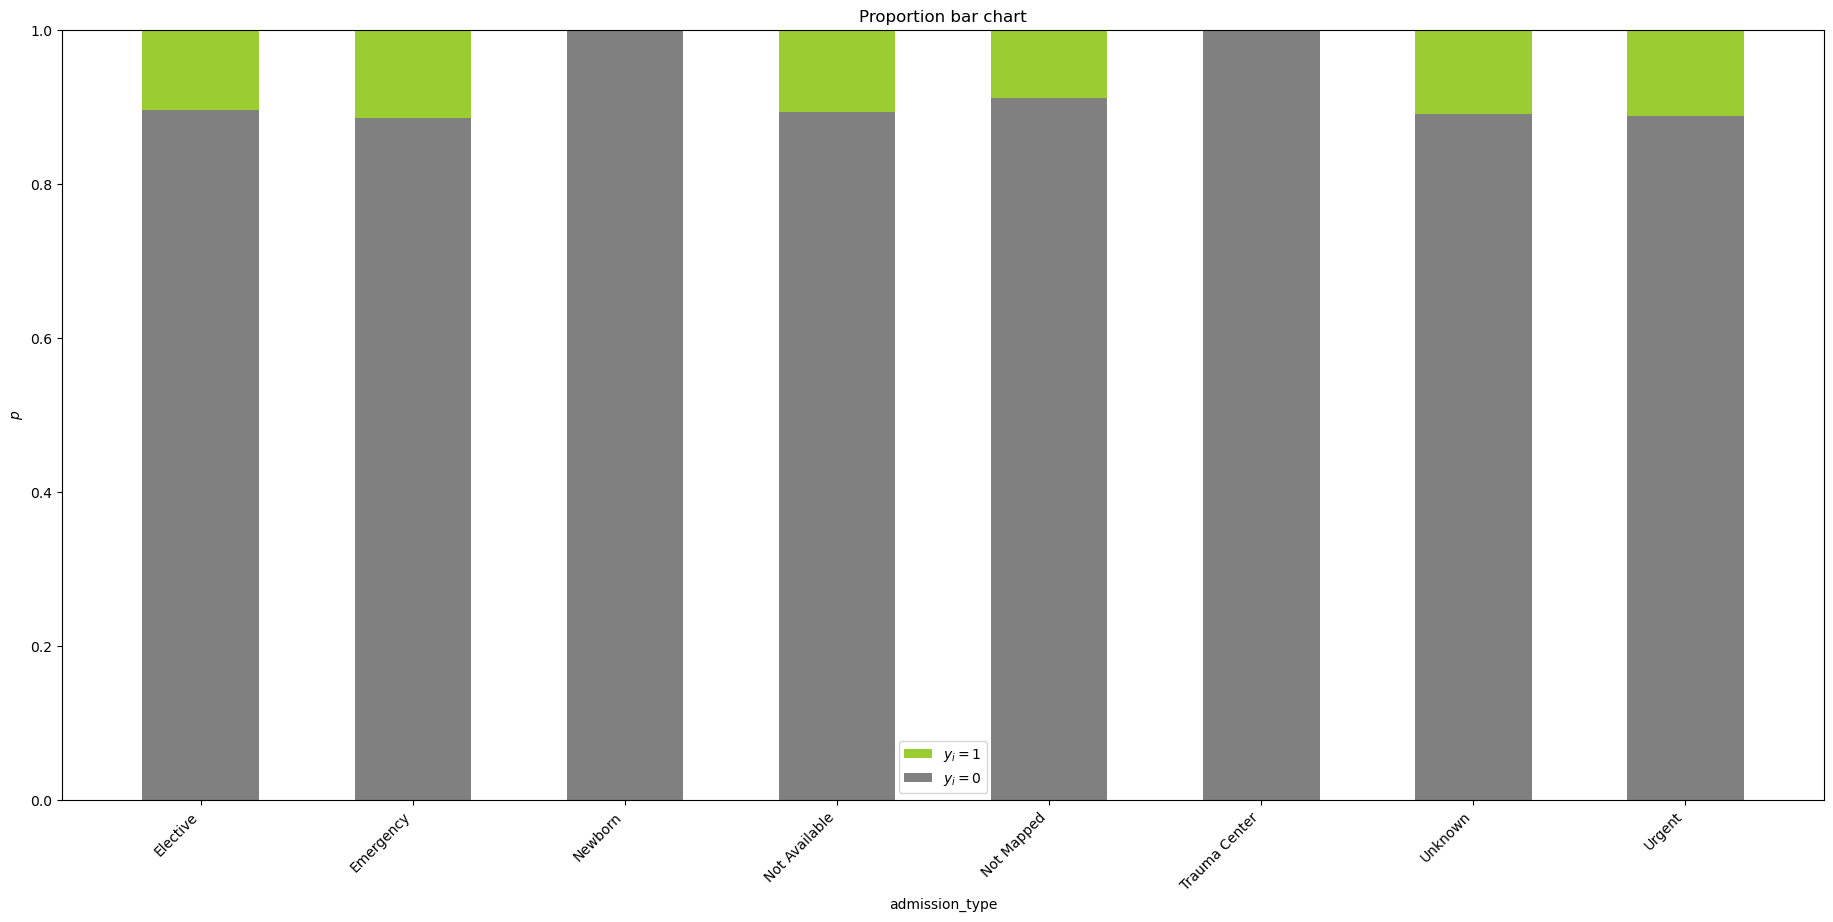

In [87]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

In [89]:
train['admission_type'] = train['admission_type'].replace({'Unknown':'Other_type',
                                                           'Not Available':'Other_type',
                                                           'Not Mapped':'Other_type',
                                                           'Newborn':'Other_type'})
train['admission_type'] = train['admission_type'].replace({'Trauma Center':'Urgent/Emergency',
                                                           'Urgent':'Urgent/Emergency', 
                                                           'Emergency':'Urgent/Emergency'})
train['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.712828
Elective            0.185454
Other_type          0.101718
Name: proportion, dtype: float64

In [90]:
test['admission_type'] = test['admission_type'].replace({'Unknown':'Other_type',
                                                           'Not Available':'Other_type',
                                                           'Not Mapped':'Other_type',
                                                           'Newborn':'Other_type'})
test['admission_type'] = test['admission_type'].replace({'Trauma Center':'Urgent/Emergency',
                                                           'Urgent':'Urgent/Emergency', 
                                                           'Emergency':'Urgent/Emergency'})
test['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.711169
Elective            0.185326
Other_type          0.103505
Name: proportion, dtype: float64

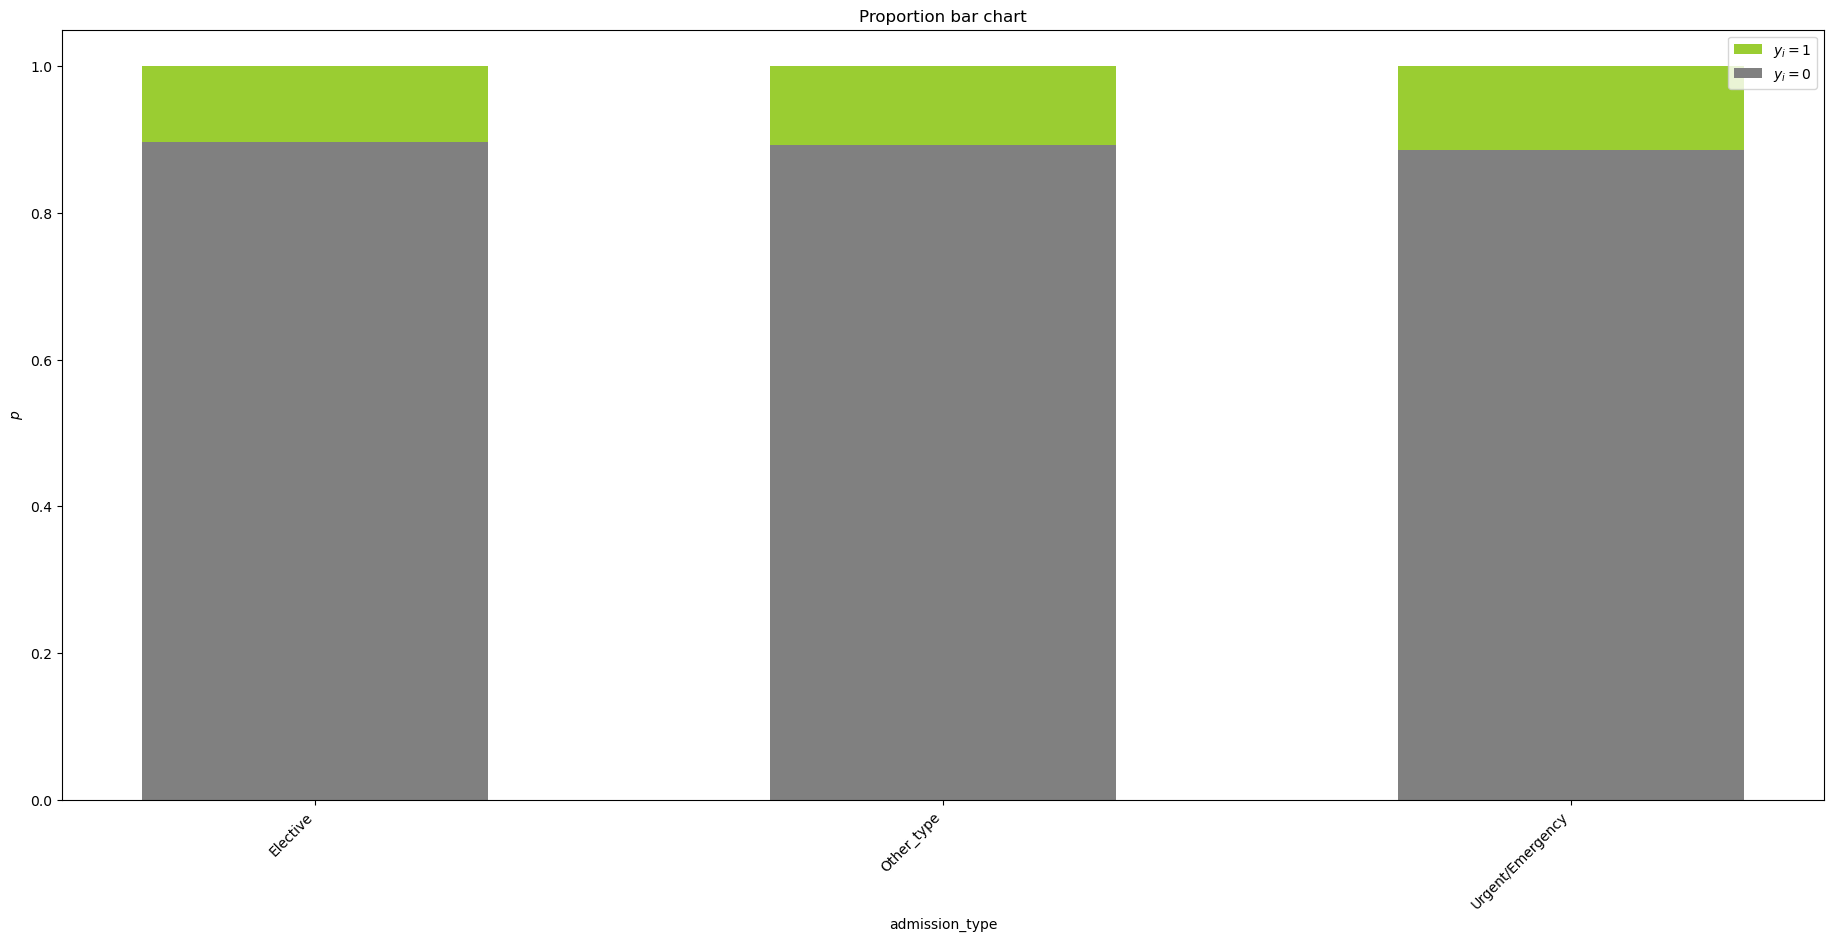

In [91]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

### medical_specialty

In [92]:
train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                          0.490230
InternalMedicine                 0.144478
Emergency/Trauma                 0.074667
Family/GeneralPractice           0.073235
Cardiology                       0.052165
                                   ...   
Speech                           0.000014
SportsMedicine                   0.000014
Pediatrics-InfectiousDiseases    0.000014
Proctology                       0.000014
Neurophysiology                  0.000014
Name: proportion, Length: 69, dtype: float64

In [93]:
train['medical_specialty'].unique()

array(['Family/GeneralPractice', 'Unknown', 'InternalMedicine',
       'Surgery-General', 'Radiologist', 'Emergency/Trauma', 'Hematology',
       'Nephrology', 'Orthopedics', 'ObstetricsandGynecology',
       'Psychiatry', 'Cardiology', 'Gastroenterology', 'Psychology',
       'Surgery-Thoracic', 'Orthopedics-Reconstructive',
       'Surgery-Vascular', 'PhysicianNotFound', 'Neurology',
       'PhysicalMedicineandRehabilitation', 'Pulmonology',
       'Hematology/Oncology', 'Oncology', 'Surgery-Neuro', 'Radiology',
       'Urology', 'Pediatrics', 'Surgery-Cardiovascular/Thoracic',
       'Gynecology', 'Pediatrics-Endocrinology', 'Surgery-Maxillofacial',
       'Podiatry', 'Ophthalmology', 'Endocrinology', 'Obstetrics',
       'Pediatrics-CriticalCare', 'Otolaryngology',
       'Pediatrics-Neurology', 'Surgery-Cardiovascular', 'Hospitalist',
       'Surgery-Plastic', 'Osteopath', 'Pediatrics-Pulmonology',
       'SurgicalSpecialty', 'InfectiousDiseases', 'AllergyandImmunology',
       'S

In [94]:
surgery = train[train['medical_specialty'].str.contains('Surgery|Surgeon|Surgical|Reconstructive')]
train.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = train[train['medical_specialty'].str.contains('Pediatrics|Pediatric')]
train.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

hematology = train[train['medical_specialty'].str.contains('Hematology|Oncology')]
train.loc[hematology.index, 'medical_specialty'] = 'Hematology/Oncology'

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.490230
InternalMedicine                        0.144478
Emergency/Trauma                        0.074667
Family/GeneralPractice                  0.073235
Surgery                                 0.061907
Cardiology                              0.052165
Nephrology                              0.015947
Orthopedics                             0.013392
Radiologist                             0.011469
Pulmonology                             0.008577
Psychiatry                              0.008395
Urology                                 0.006710
ObstetricsandGynecology                 0.006570
Hematology/Oncology                     0.006303
Pediatric                               0.005784
Gastroenterology                        0.005573
PhysicalMedicineandRehabilitation       0.003931
Neurology                               0.001937
Otolaryngology                          0.001207
Endocrinology                           0.001137
Po

In [95]:
internal_medicine_categories = ['InternalMedicine', 'Endocrinology', 'Endocrinology-Metabolism', 'InfectiousDiseases', 
                                'Gastroenterology', 'Nephrology', 'Pulmonology', 'Rheumatology',
                                'AllergyandImmunology', 'Hematology/Oncology', 'SportsMedicine']
train['medical_specialty'] = train['medical_specialty'].replace(internal_medicine_categories, 'InternalMedicine')

surgery_categories = ['Surgery', 'Orthopedics', 'Otolaryngology', 'Podiatry', 'Proctology']
train['medical_specialty'] = train['medical_specialty'].replace(surgery_categories, 'Surgery')

value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index
train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                   0.490230
InternalMedicine          0.182731
Surgery                   0.077559
Emergency/Trauma          0.074667
Family/GeneralPractice    0.073235
Cardiology                0.052165
Other_specialty           0.049413
Name: proportion, dtype: float64

In [96]:
surgery = test[test['medical_specialty'].str.contains('Surgery|Surgeon|Surgical|Reconstructive')]
test.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = test[test['medical_specialty'].str.contains('Pediatrics|Pediatric')]
test.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

hematology = test[test['medical_specialty'].str.contains('Hematology|Oncology')]
test.loc[hematology.index, 'medical_specialty'] = 'Hematology/Oncology'


test['medical_specialty'] = test['medical_specialty'].replace(internal_medicine_categories, 'InternalMedicine')
test['medical_specialty'] = test['medical_specialty'].replace(surgery_categories, 'Surgery')

value_counts = test['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index
test['medical_specialty'] = test['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')

test['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                   0.492204
InternalMedicine          0.179921
Surgery                   0.080020
Emergency/Trauma          0.073567
Family/GeneralPractice    0.072814
Cardiology                0.053587
Other_specialty           0.047887
Name: proportion, dtype: float64

In [97]:
train['medical_specialty'] = train['medical_specialty'].str.strip().str.replace('/', '_')

In [98]:
test['medical_specialty'] = test['medical_specialty'].str.strip().str.replace('/', '_')

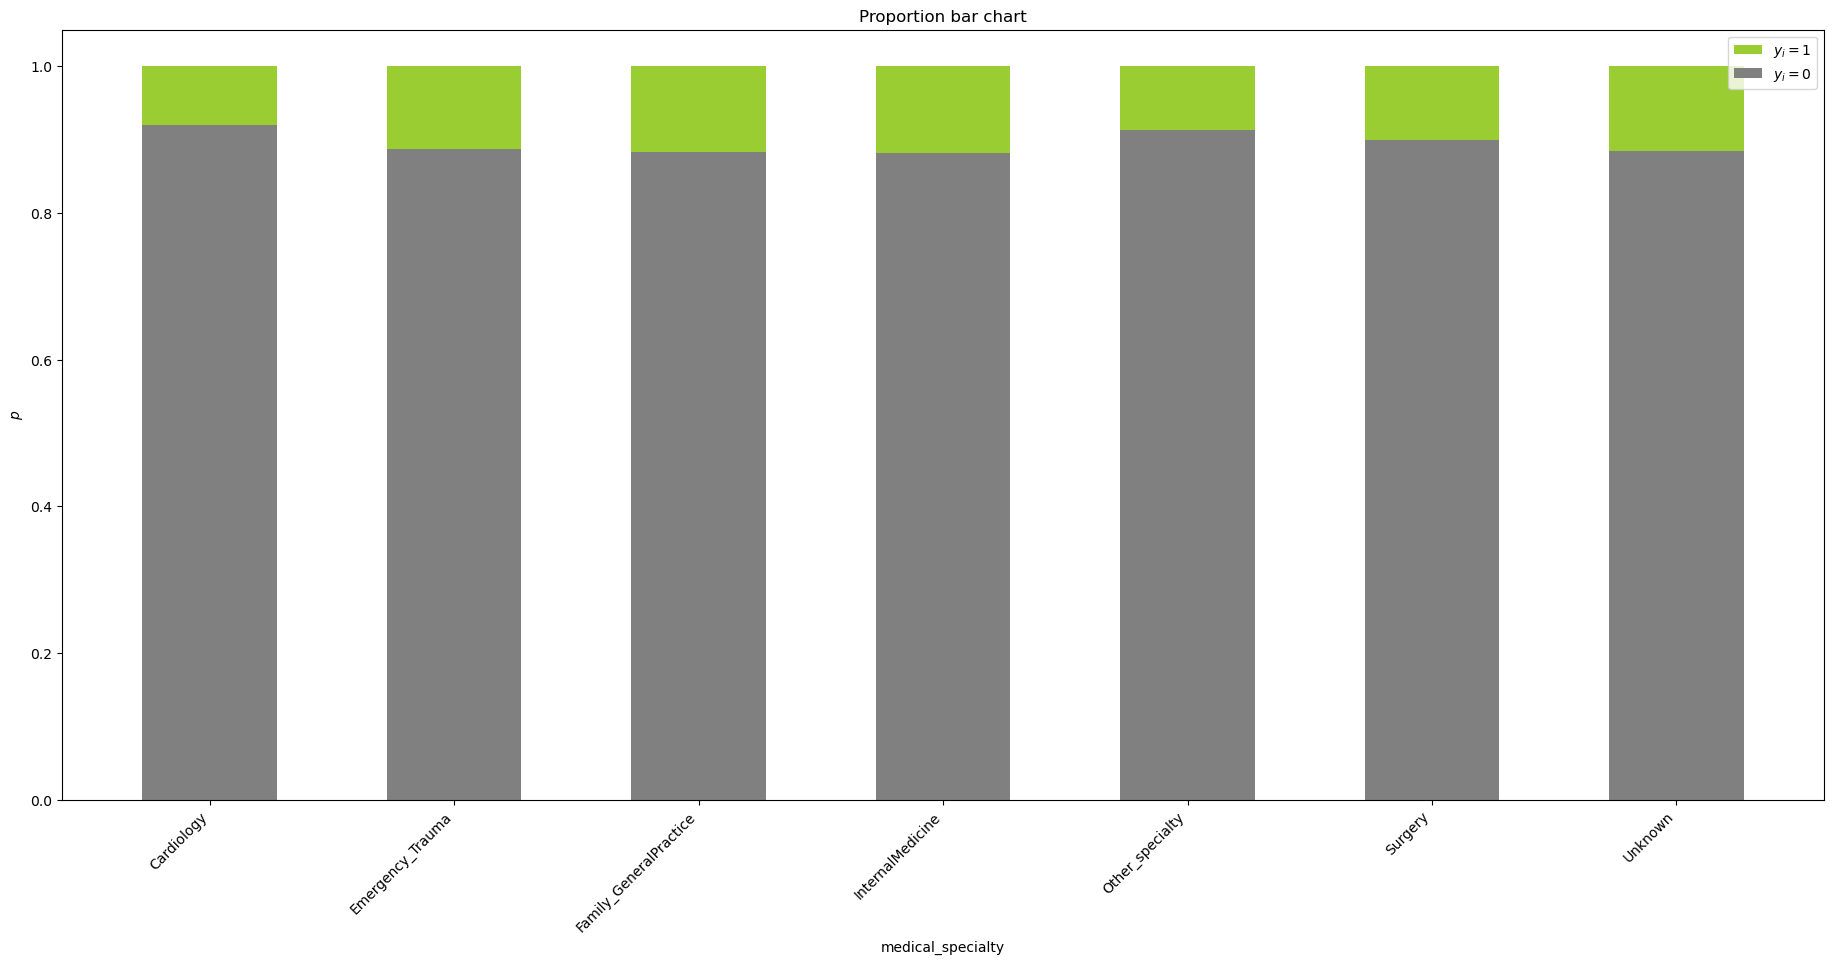

In [99]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

### discharge_disposition

In [100]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.593183
Discharged/transferred to SNF                                                                                0.137290
Discharged/transferred to home with home health service                                                      0.126411
Unknown                                                                                                      0.036358
Discharged/transferred to another short term hospital                                                        0.020888
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019555
Expired                                                                                                      0.015933
Discharged/transferred to another type of inpatient care institution                                         0.011539
Not Mapped                        

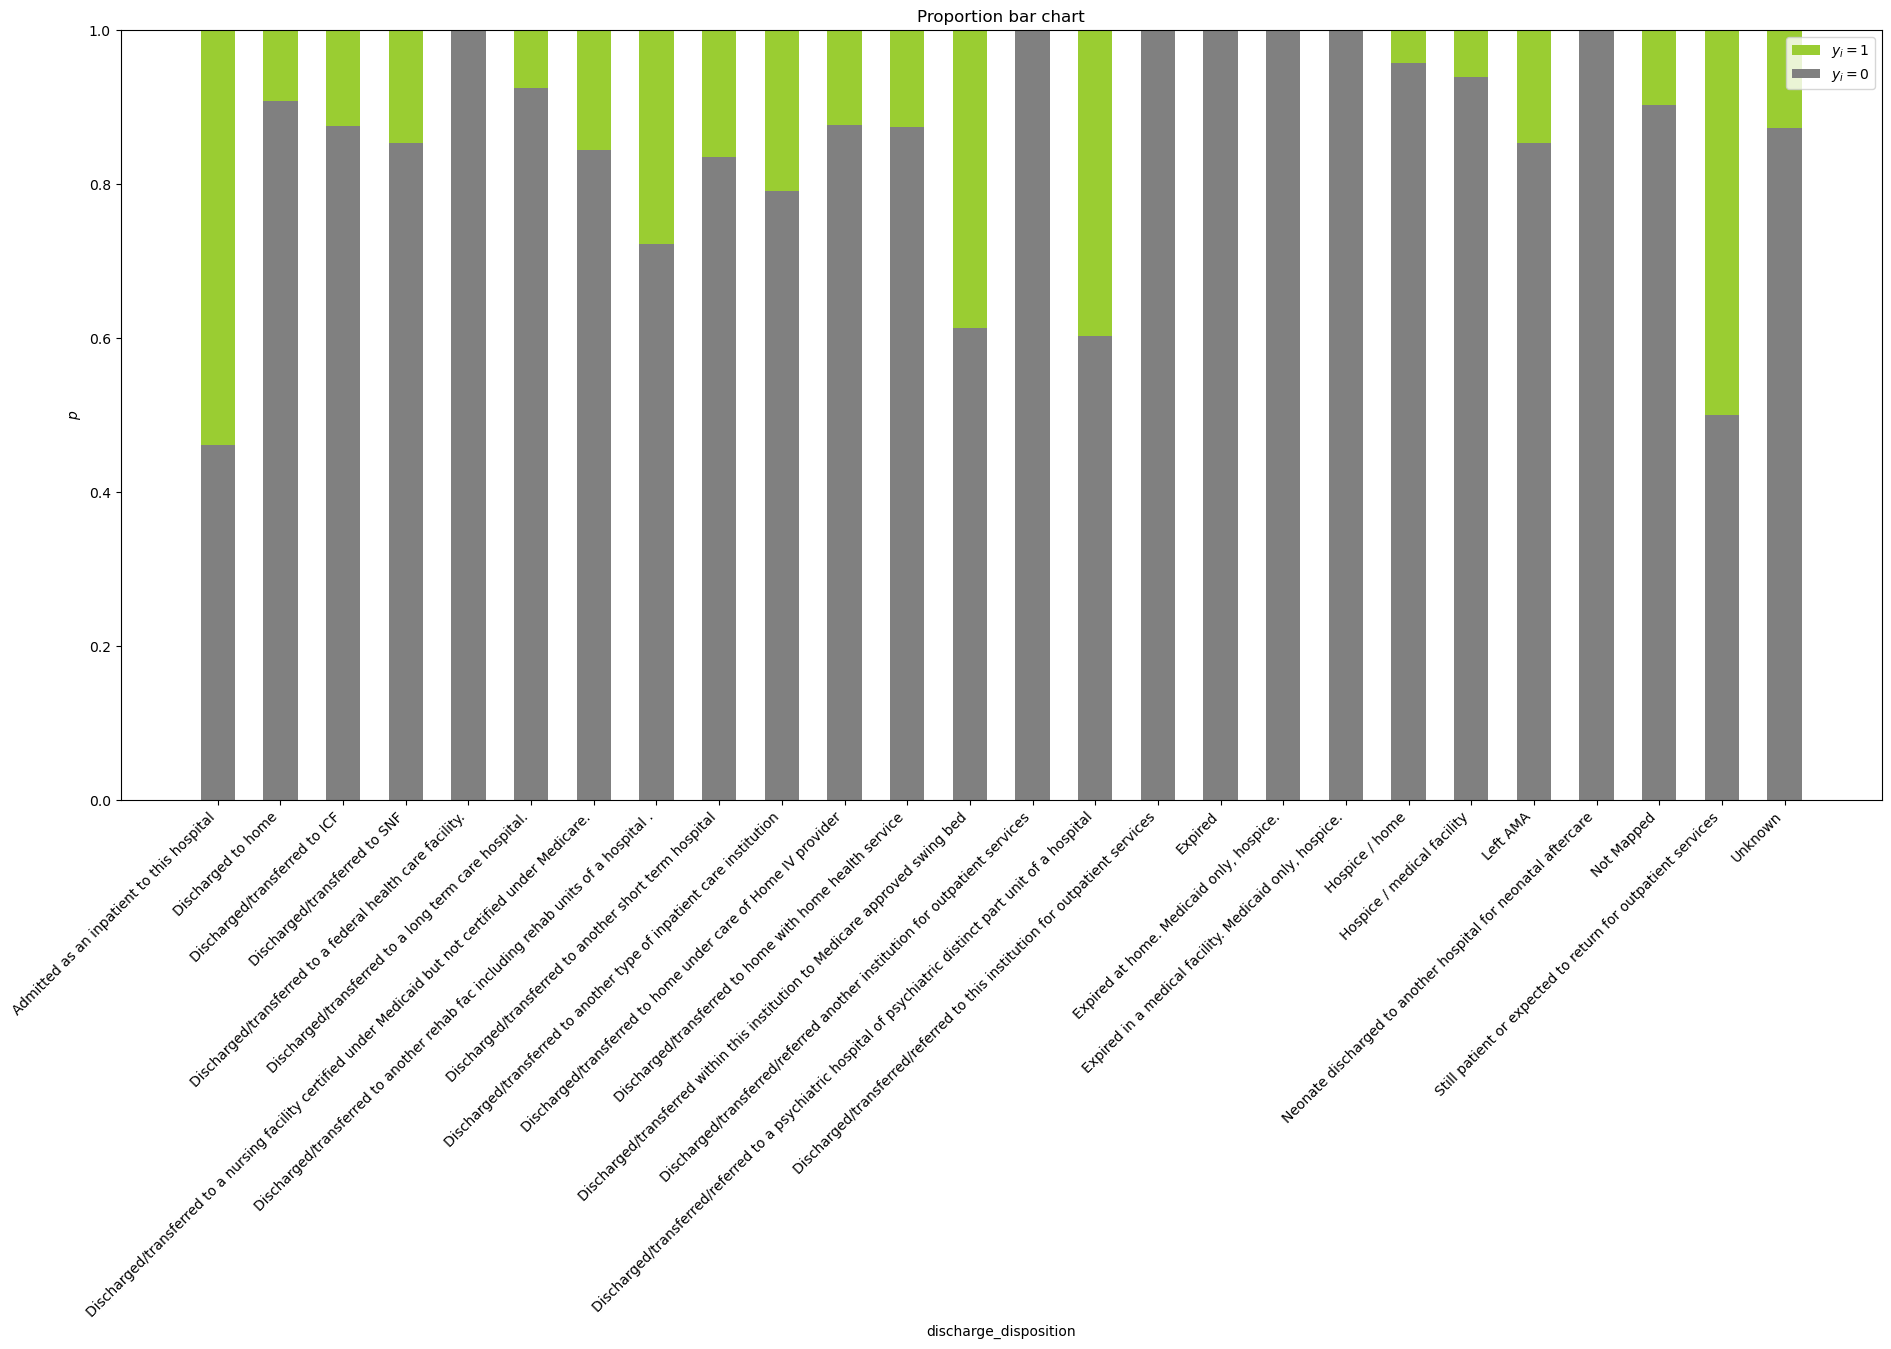

In [101]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [102]:
expired = train[train['discharge_disposition'].str.contains('Expired')]
train.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = train[train['discharge_disposition'].str.contains('Hospice')]
train.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

rehab = train[train['discharge_disposition'].str.contains('rehab')]
train.loc[rehab.index, 'discharge_disposition'] = 'Rehab'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital',
                            'Discharged/transferred to another type of inpatient care institution', 
                            'Discharged/transferred to a long term care hospital.', 
                            'Discharged/transferred to a federal health care facility.',
                            'Discharged/transferred to ICF',
                            'Neonate discharged to another hospital for neonatal aftercare',
                            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
train['discharge_disposition'] = train['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

home = train[train['discharge_disposition'].str.contains('home')]
train.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        'Discharged/transferred within this institution to Medicare approved swing bed',
        'Admitted as an inpatient to this hospital','Left AMA',
        'Discharged/transferred/referred to this institution for outpatient services',
        'Discharged/transferred/referred another institution for outpatient services',
        'Still patient or expected to return for outpatient services']
train['discharge_disposition'] = train['discharge_disposition'].replace(other, 'Other')

train['discharge_disposition'] = train['discharge_disposition'].replace('Not Mapped', 'Unknown')

In [ ]:
expired = test[test['discharge_disposition'].str.contains('Expired')]
test.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = test[test['discharge_disposition'].str.contains('Hospice')]
test.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

rehab = test[test['discharge_disposition'].str.contains('rehab')]
test.loc[rehab.index, 'discharge_disposition'] = 'Rehab'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital',
                            'Discharged/transferred to another type of inpatient care institution', 
                            'Discharged/transferred to a long term care hospital.', 
                            'Discharged/transferred to a federal health care facility.',
                            'Discharged/transferred to ICF',
                            'Neonate discharged to another hospital for neonatal aftercare',
                            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
test['discharge_disposition'] = test['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

home = test[test['discharge_disposition'].str.contains('home')]
test.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        'Discharged/transferred within this institution to Medicare approved swing bed',
        'Admitted as an inpatient to this hospital','Left AMA',
        'Discharged/transferred/referred to this institution for outpatient services',
        'Discharged/transferred/referred another institution for outpatient services',
        'Still patient or expected to return for outpatient services']
test['discharge_disposition'] = test['discharge_disposition'].replace(other, 'Other')

test['discharge_disposition'] = test['discharge_disposition'].replace('Not Mapped', 'Unknown')

In [103]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Home                                     0.593183
Facility                                 0.184359
Home_with_care_or_Outpatient_services    0.127787
Others                                   0.051800
Rehab                                    0.019555
Expired                                  0.016031
Hospice                                  0.007286
Name: proportion, dtype: float64

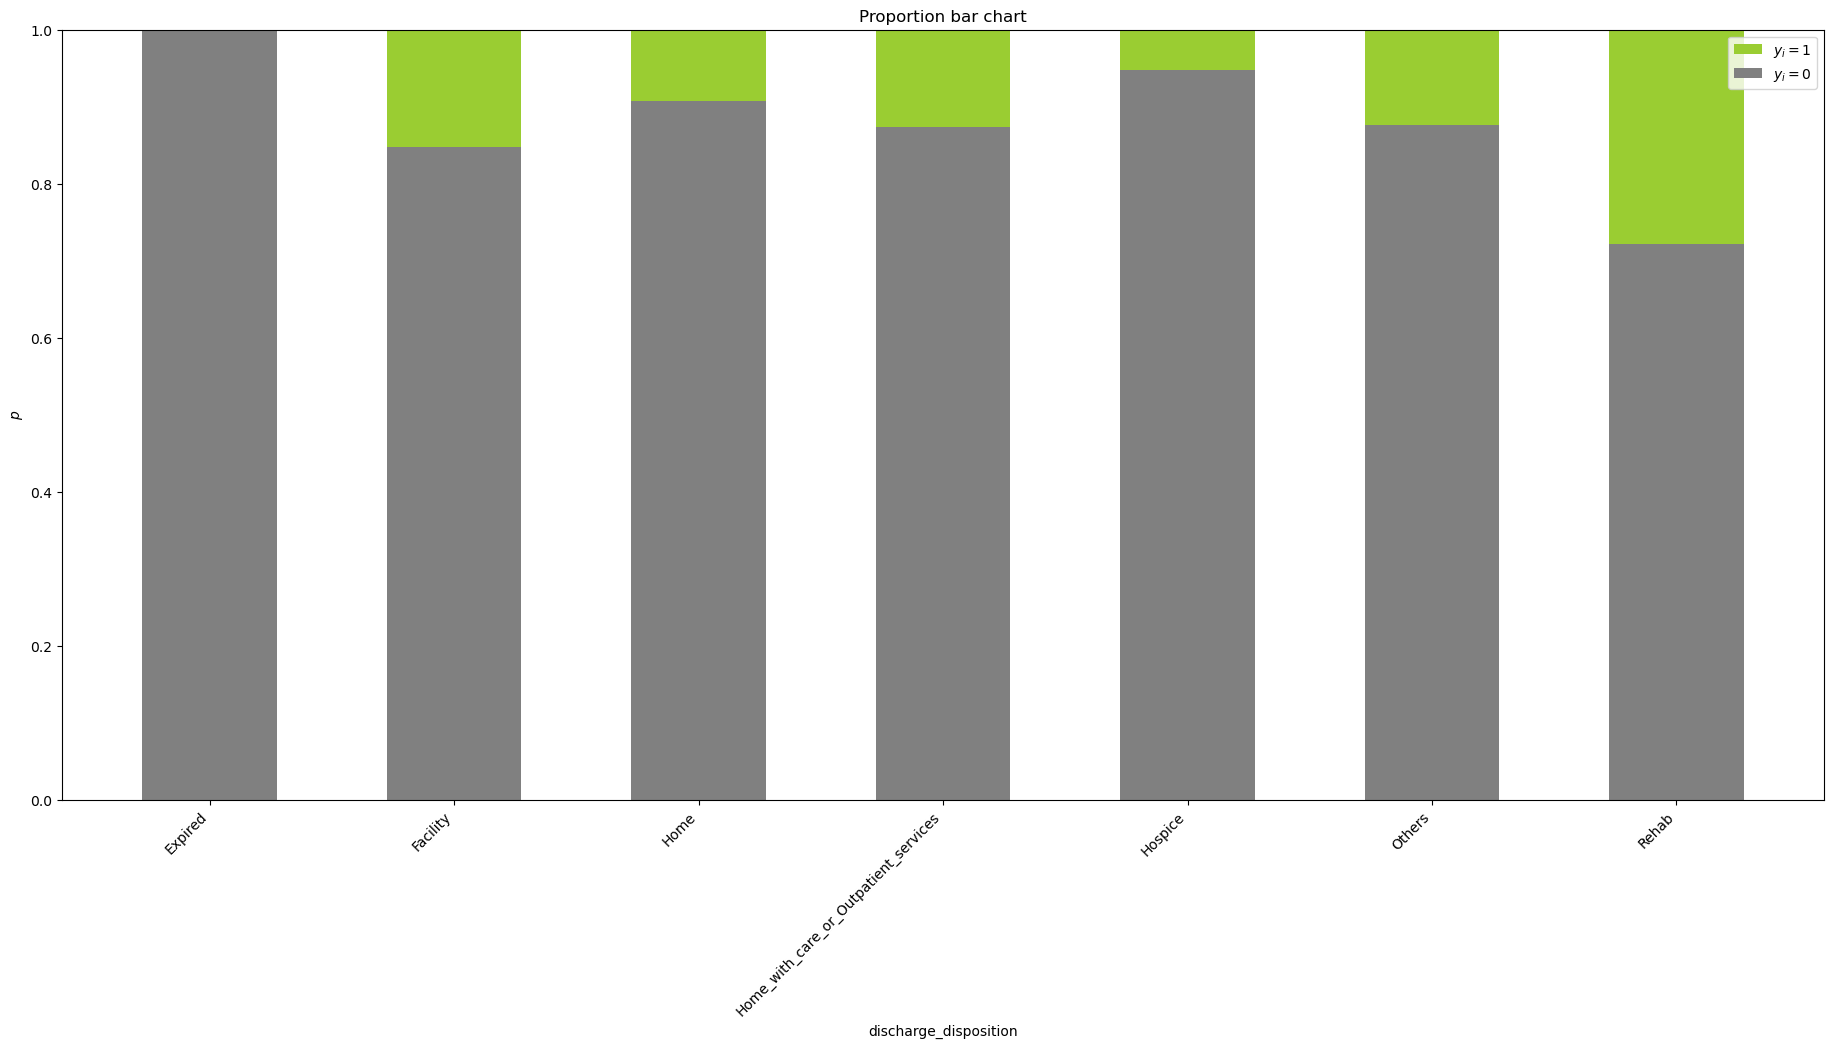

In [105]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

### admission_source

In [106]:
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.565992
 Physician Referral                                           0.290275
Unknown                                                       0.066231
Transfer from a hospital                                      0.031304
 Transfer from another health care facility                   0.021927
Clinic Referral                                               0.010935
 Transfer from a Skilled Nursing Facility (SNF)               0.008353
HMO Referral                                                  0.001811
 Not Mapped                                                   0.001502
 Not Available                                                0.001235
 Court/Law Enforcement                                        0.000154
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000112
 Transfer from critial access hospital                        0.000098
 Transfer from Ambulatory Surgery Center                    

In [107]:
train['admission_source'] = train['admission_source'].str.strip().str.replace(' ', '_')
train['admission_source'].unique()

array(['Emergency_Room', 'Clinic_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility', 'Physician_Referral',
       'Transfer_from_a_hospital', 'HMO_Referral',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)', 'Not_Mapped',
       'Not_Available', 'Court/Law_Enforcement',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Transfer_from_critial_access_hospital', 'Extramural_Birth',
       'Normal_Delivery', 'Transfer_from_Ambulatory_Surgery_Center',
       'Sick_Baby'], dtype=object)

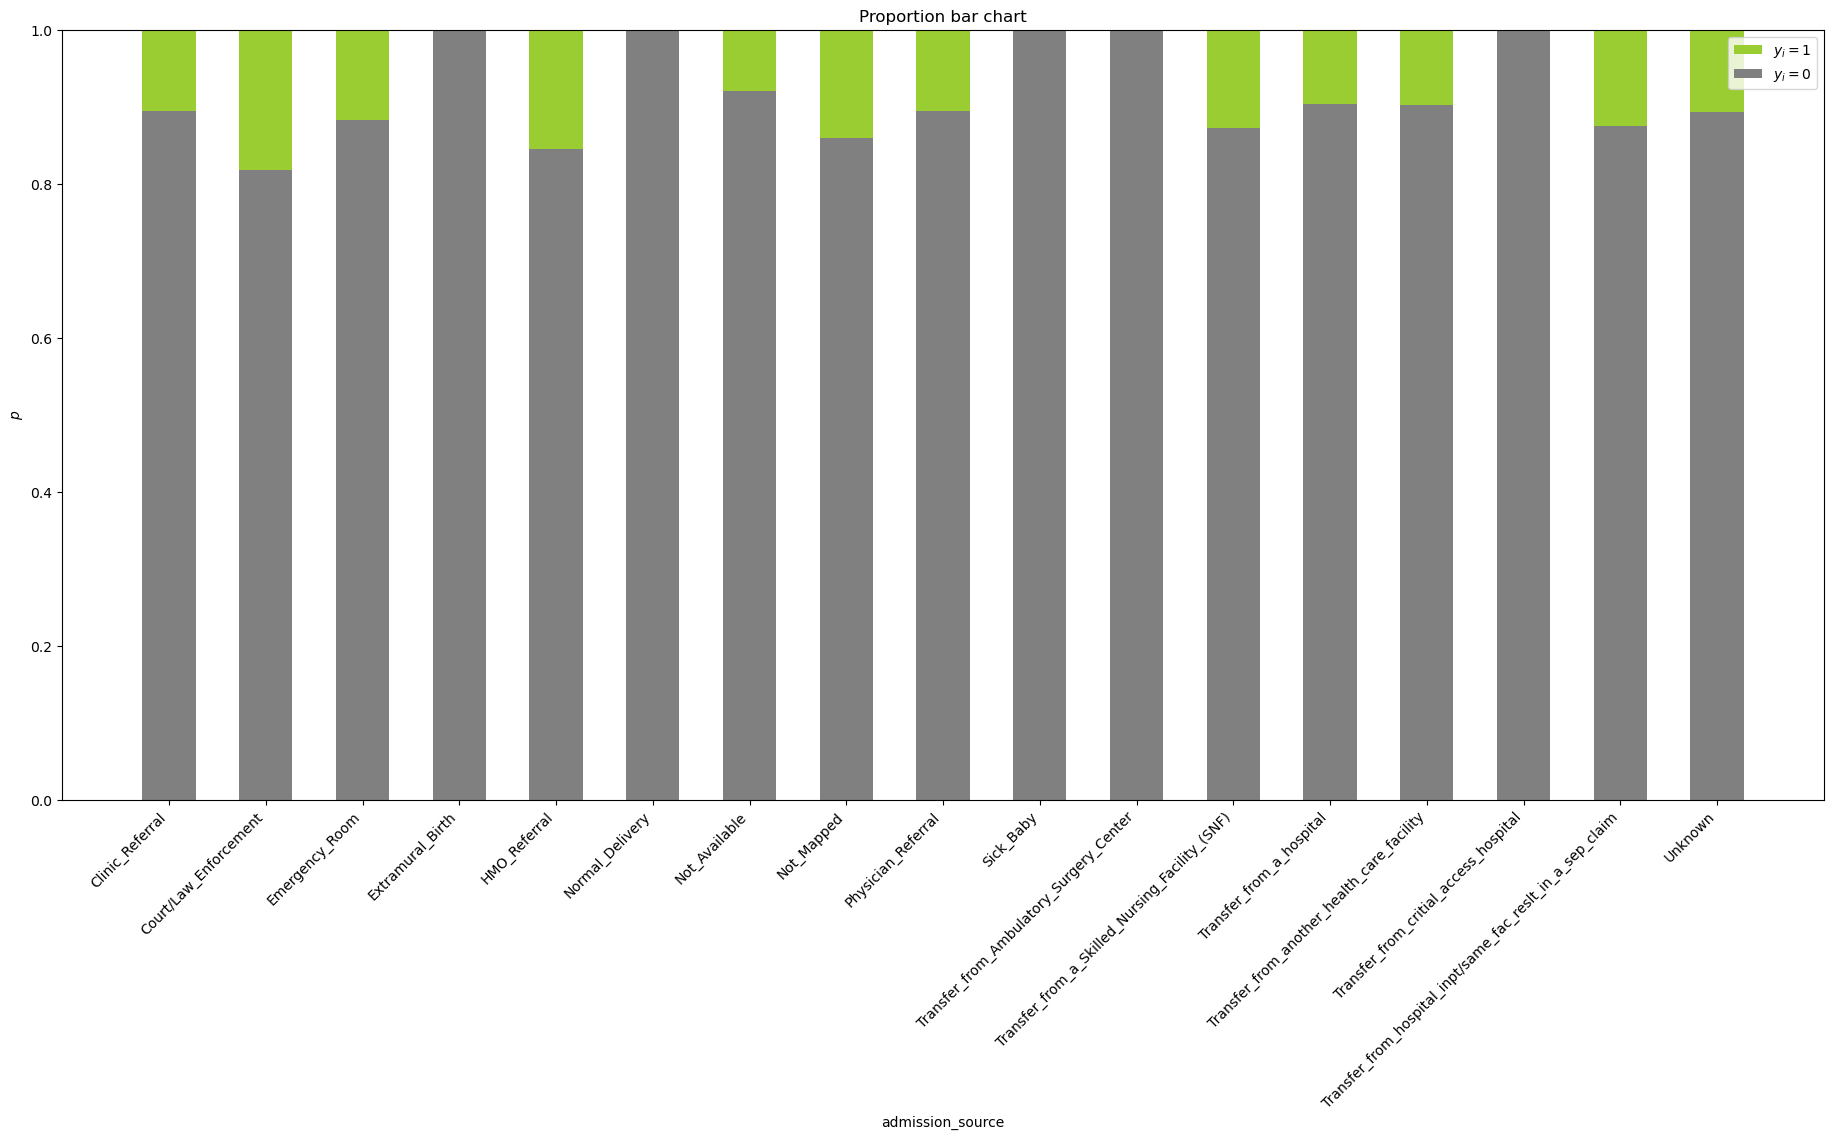

In [108]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [109]:
unknown = ['Not_Mapped','Not_Available','Unknown']
referral = ['Physician_Referral','Clinic_Referral','HMO_Referral']

value_counts = train['admission_source'].value_counts(normalize=True)
other_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(unknown,'No_source').replace(referral,'Referral').replace(other_source,'Other_source')

In [110]:
train['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room    0.565992
Referral          0.303021
No_source         0.068968
Other_source      0.062019
Name: proportion, dtype: float64

In [111]:
test['admission_source'] = test['admission_source'].str.strip().str.replace(' ', '_')
test['admission_source'].unique()

array(['Emergency_Room', 'Physician_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility',
       'Transfer_from_a_hospital',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Clinic_Referral', 'Not_Available', 'Court/Law_Enforcement',
       'Not_Mapped', 'HMO_Referral',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Normal_Delivery', 'Transfer_from_critial_access_hospital',
       'Extramural_Birth'], dtype=object)

In [112]:
unknown = ['Not_Mapped','Not_Available']
referral = ['Physician_Referral','Clinic_Referral','HMO_Referral']

value_counts = test['admission_source'].value_counts(normalize=True)
other_source = value_counts[value_counts < 0.05].index

test['admission_source'] = test['admission_source'].replace(unknown,'No_source').replace(referral,'Referral').replace(other_source,'Other_source')

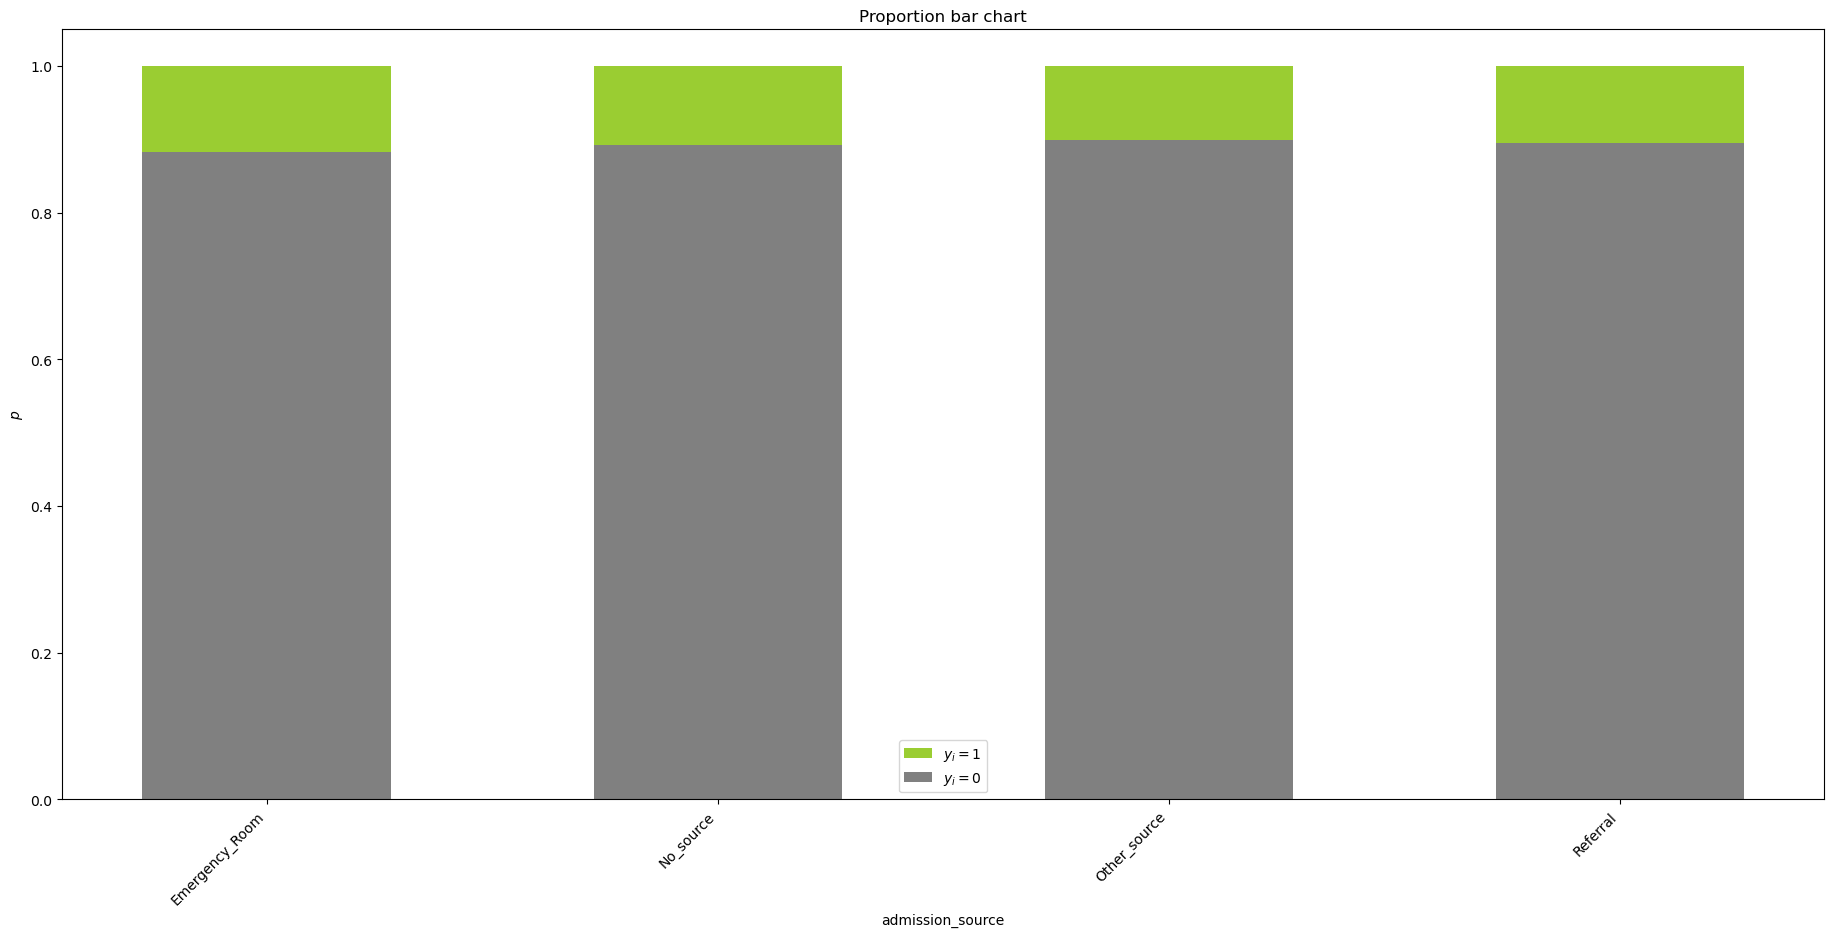

In [113]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

### _diagnosis

In [114]:
# Define a function to categorize diagnosis types
def diagnosis_types_division(x):
    try:
        x = float(x)
        x = int(x)
        if 1 <= x <= 139:
            return 'Infectious_Parasitic'
        elif 140 <= x <= 239:
            return 'Neoplasms'
        elif 240 <= x <= 249 or 251 <= x <= 279:
            return 'Metabolic'
        elif 250 <= x < 251:
            return 'Diabetes'
        elif 280 <= x <= 289:
            return 'Blood'
        elif 290 <= x <= 319:
            return 'Mental'
        elif 320 <= x <= 389:
            return 'Nervous'
        elif 390 <= x <= 459:
            return 'Circulatory'
        elif 460 <= x <= 519:
            return 'Respiratory'
        elif 520 <= x <= 579:
            return 'Digestive'
        elif 580 <= x <= 629:
            return 'Genitourinary'
        elif 630 <= x <= 679:
            return 'Pregnancy'
        elif 680 <= x <= 709:
            return 'Skin'
        elif 710 <= x <= 739:
            return 'Musculoskeletal'
        elif 740 <= x <= 759:
            return 'Congenital'
        elif 760 <= x <= 779:
            return 'Perinatal_period'
        elif 780 <= x <= 799:
            return 'Symptoms_Signs_Conditions'
        elif 800 <= x <= 999:
            return 'Injury_Poisoning'
        else:
            return 'External'
    except ValueError:
        return 'External'

In [115]:
train['primary_diagnosis_types'] = train['primary_diagnosis'].apply(diagnosis_types_division)
train['secondary_diagnosis_types'] = train['secondary_diagnosis'].apply(diagnosis_types_division)
train['additional_diagnosis_types'] = train['additional_diagnosis'].apply(diagnosis_types_division)

In [116]:
test['primary_diagnosis_types'] = test['primary_diagnosis'].apply(diagnosis_types_division)
test['secondary_diagnosis_types'] = test['secondary_diagnosis'].apply(diagnosis_types_division)
test['additional_diagnosis_types'] = test['additional_diagnosis'].apply(diagnosis_types_division)

In [117]:
train = train.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [118]:
test = test.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [119]:
train['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Circulatory                  0.297925
Respiratory                  0.102350
Digestive                    0.090909
Diabetes                     0.085687
Symptoms_Signs_Conditions    0.075481
Injury_Poisoning             0.068519
Genitourinary                0.049961
Musculoskeletal              0.048332
Neoplasms                    0.034028
Infectious_Parasitic         0.027626
Metabolic                    0.026110
Skin                         0.024482
Mental                       0.022110
External                     0.016438
Nervous                      0.011946
Blood                        0.010655
Pregnancy                    0.006879
Congenital                   0.000562
Name: proportion, dtype: float64

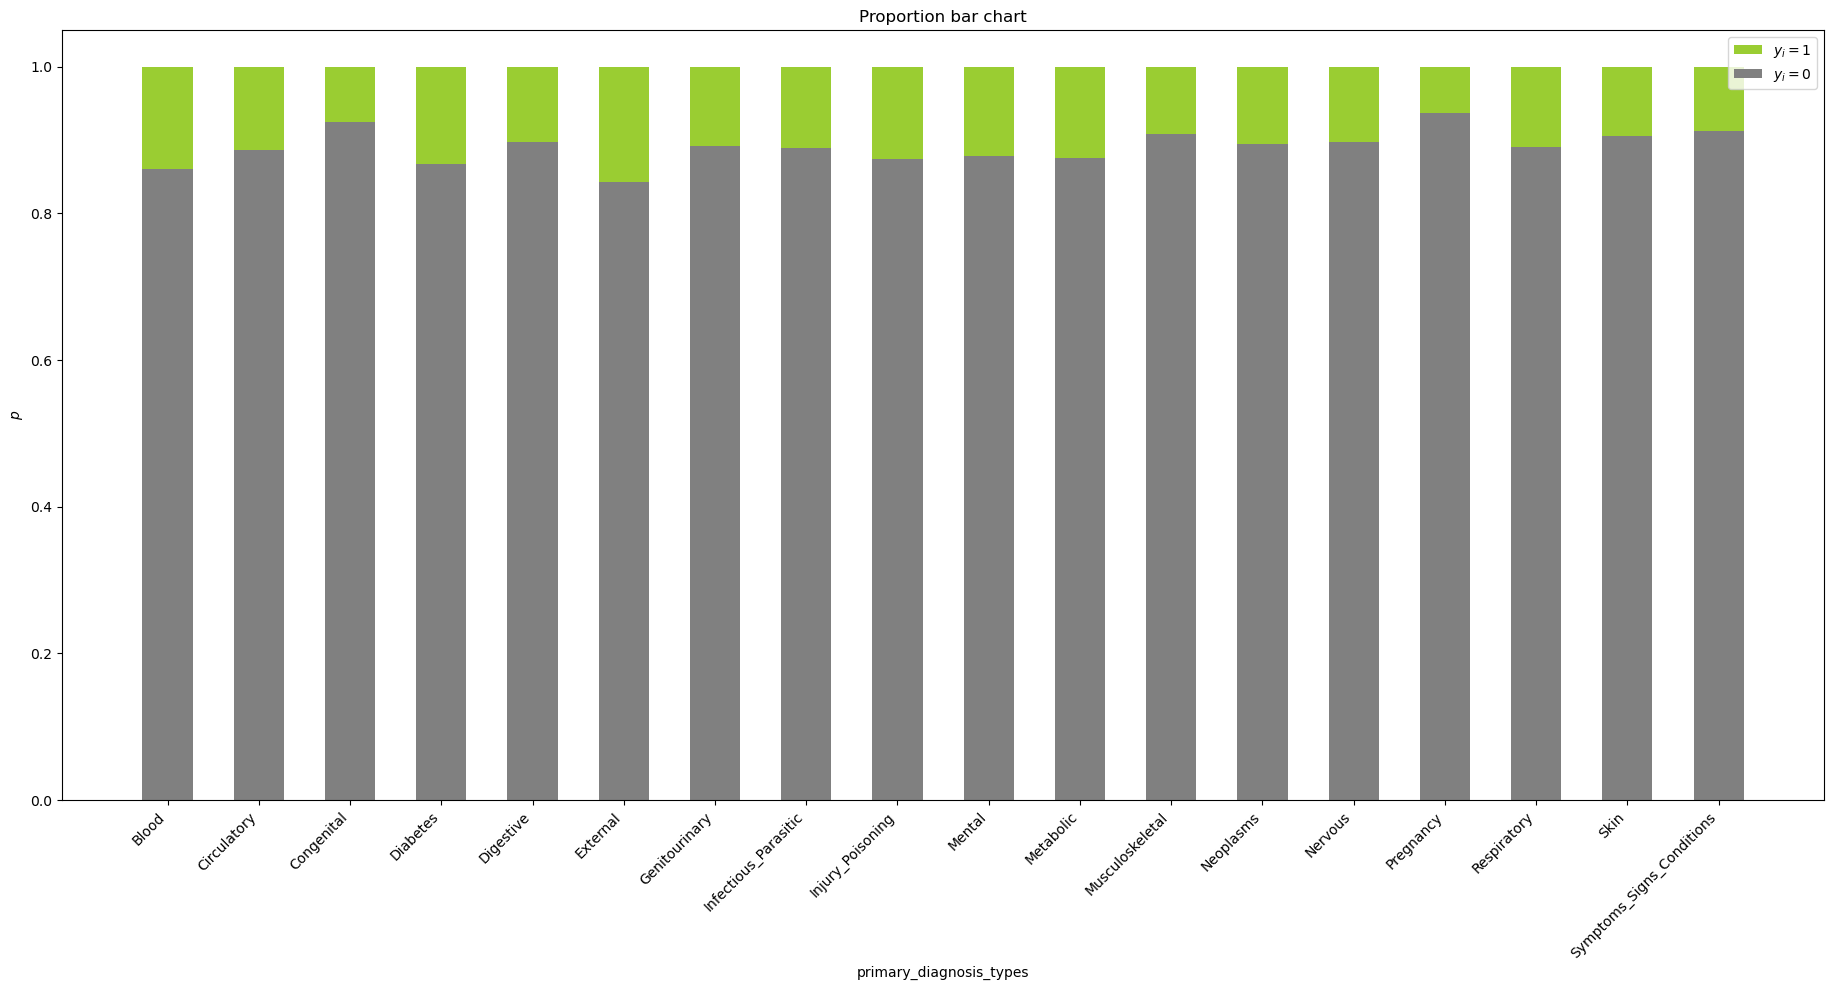

In [120]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

In [121]:
train['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Circulatory                  0.308819
Diabetes                     0.125470
Respiratory                  0.100960
Metabolic                    0.080661
Genitourinary                0.078724
Symptoms_Signs_Conditions    0.044837
Digestive                    0.038562
Skin                         0.035586
Blood                        0.029114
External                     0.028665
Mental                       0.025802
Neoplasms                    0.024777
Injury_Poisoning             0.024187
Infectious_Parasitic         0.019063
Musculoskeletal              0.017238
Nervous                      0.012381
Pregnancy                    0.004099
Congenital                   0.001053
Name: proportion, dtype: float64

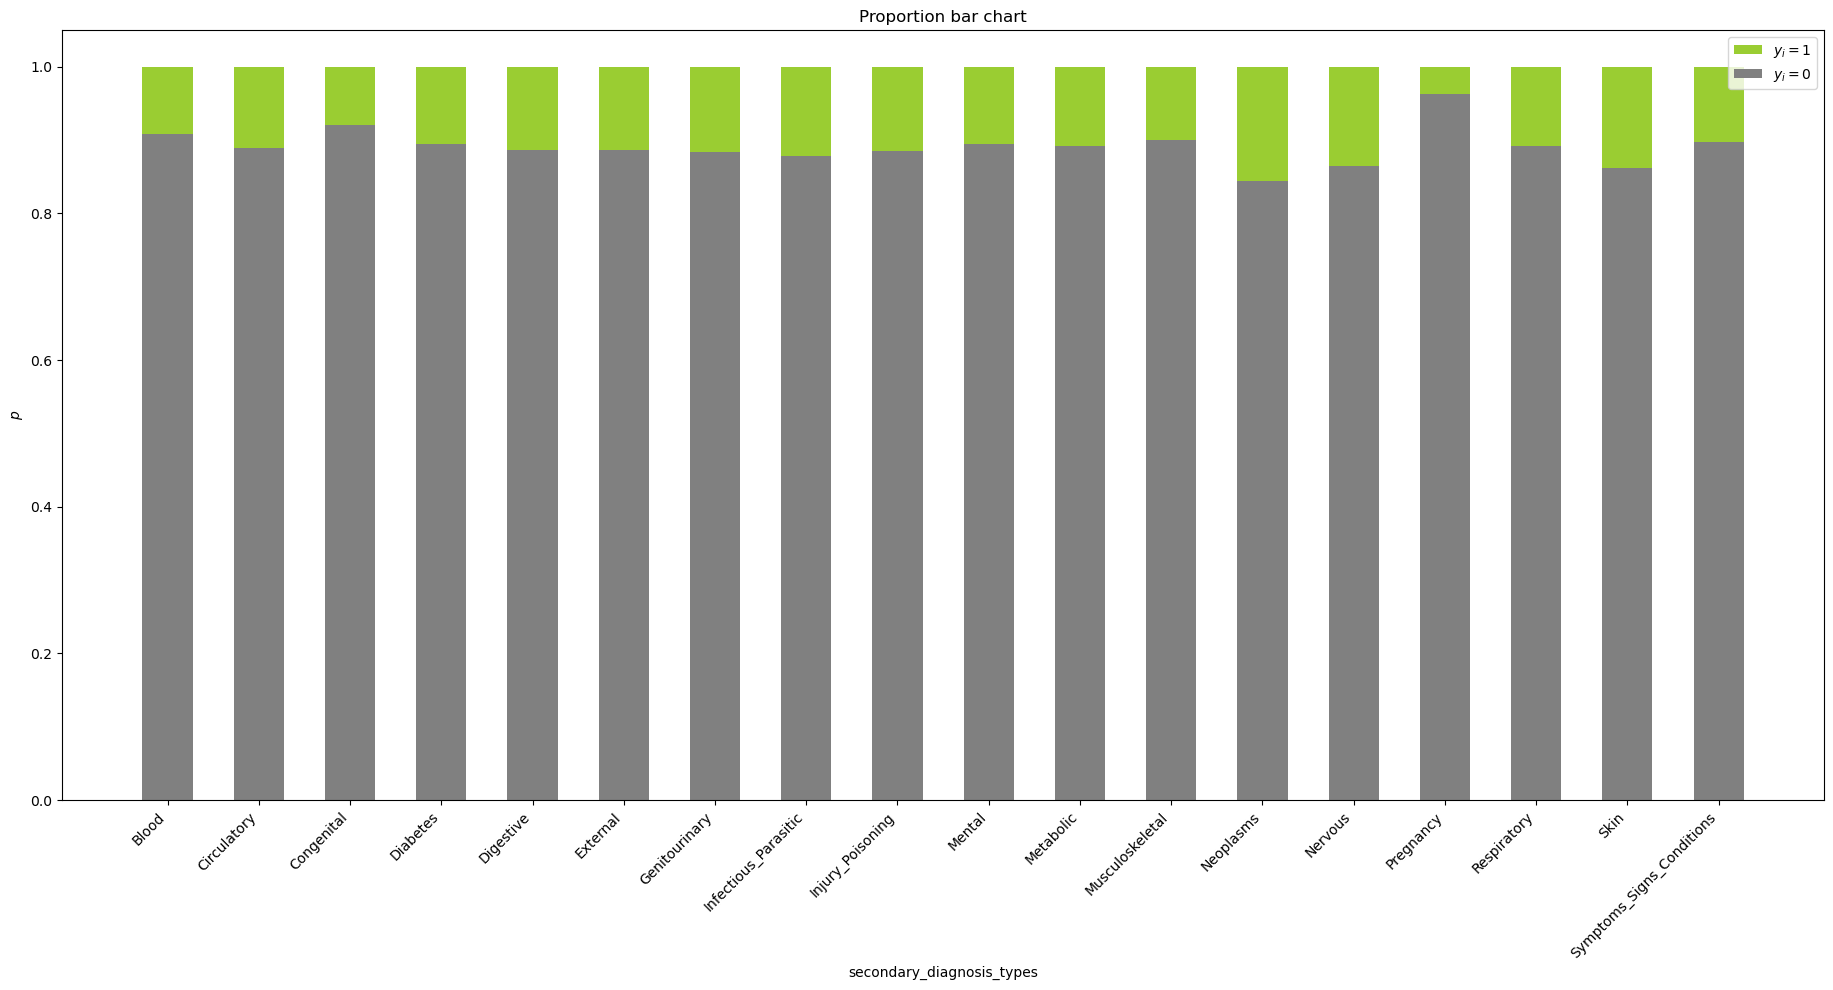

In [122]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

In [123]:
train['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Circulatory                  0.294219
Diabetes                     0.167429
Metabolic                    0.089393
Respiratory                  0.066385
External                     0.063872
Genitourinary                0.062735
Symptoms_Signs_Conditions    0.043967
Digestive                    0.035291
Mental                       0.031178
Skin                         0.024594
Blood                        0.024566
Injury_Poisoning             0.019414
Musculoskeletal              0.018628
Infectious_Parasitic         0.018558
Neoplasms                    0.018207
Nervous                      0.017477
Pregnancy                    0.003173
Congenital                   0.000912
Name: proportion, dtype: float64

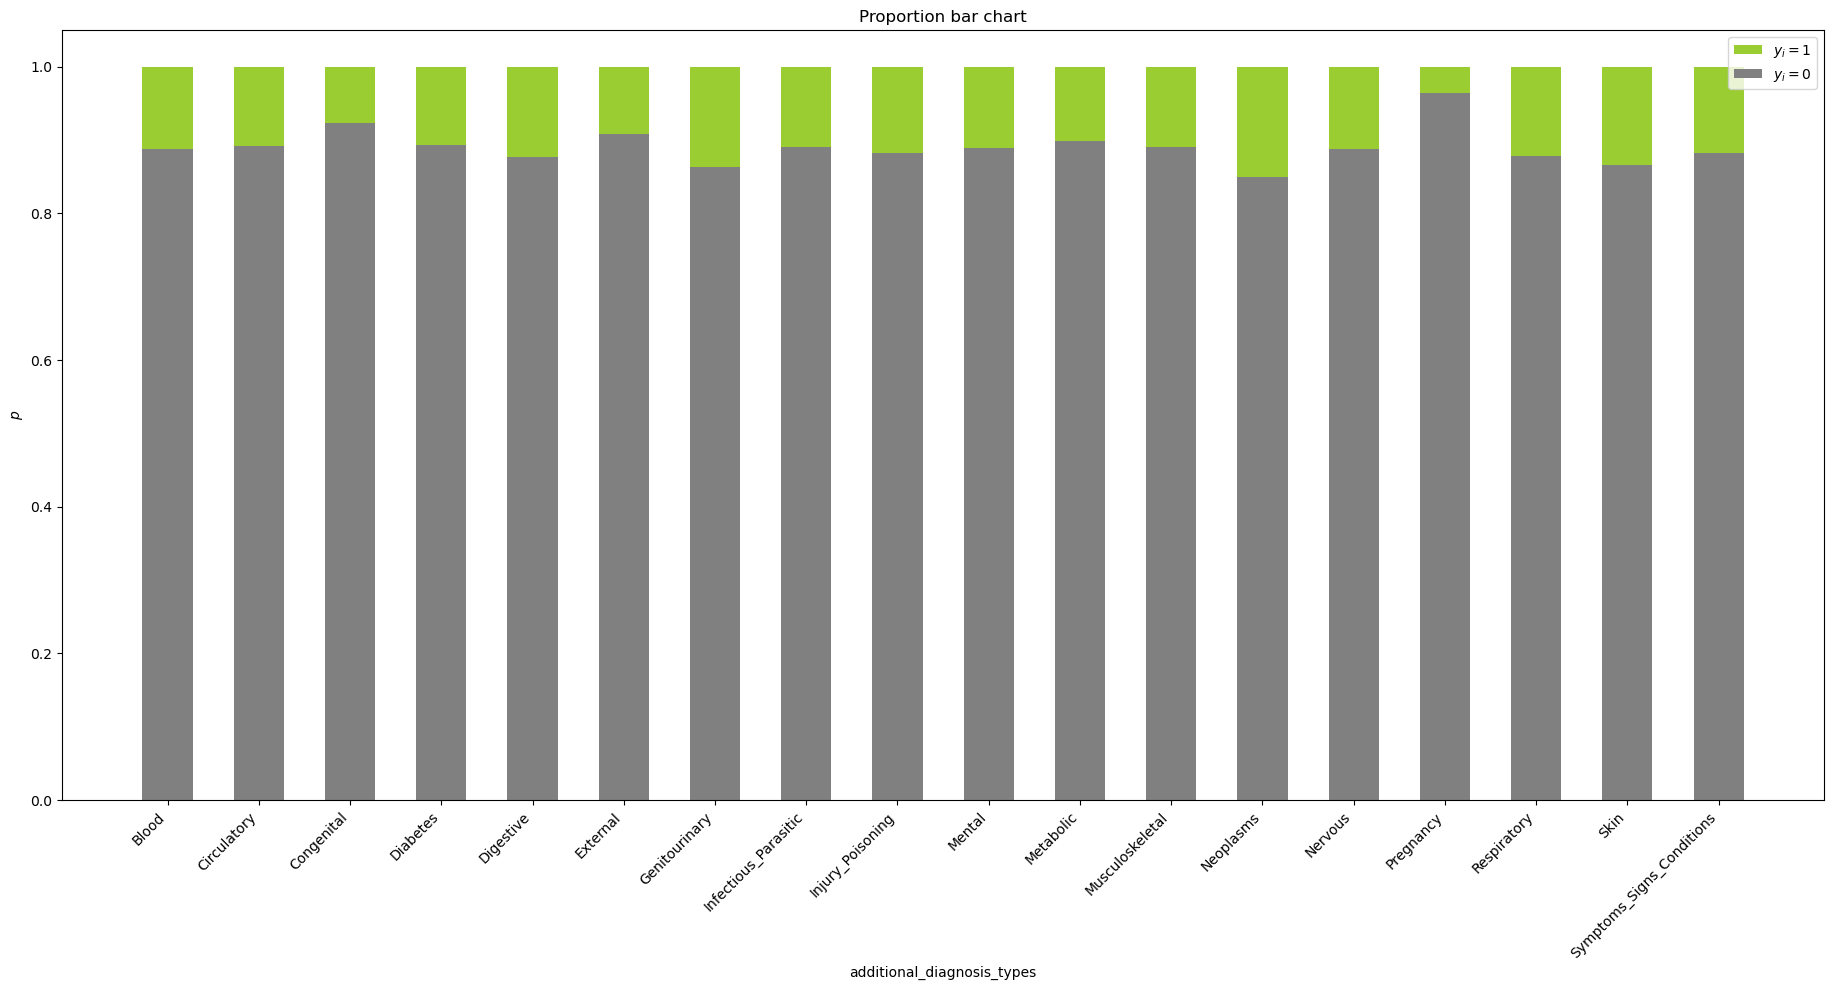

In [124]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

### glucose_test_result

In [125]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.948228
Norm         0.025352
>200         0.014810
>300         0.011609
Name: proportion, dtype: float64

In [126]:
train['glucose_test_result'] = train['glucose_test_result'].replace({'>200': 'High', '>300': 'High'})
test['glucose_test_result'] = test['glucose_test_result'].replace({'>200': 'High', '>300': 'High'})

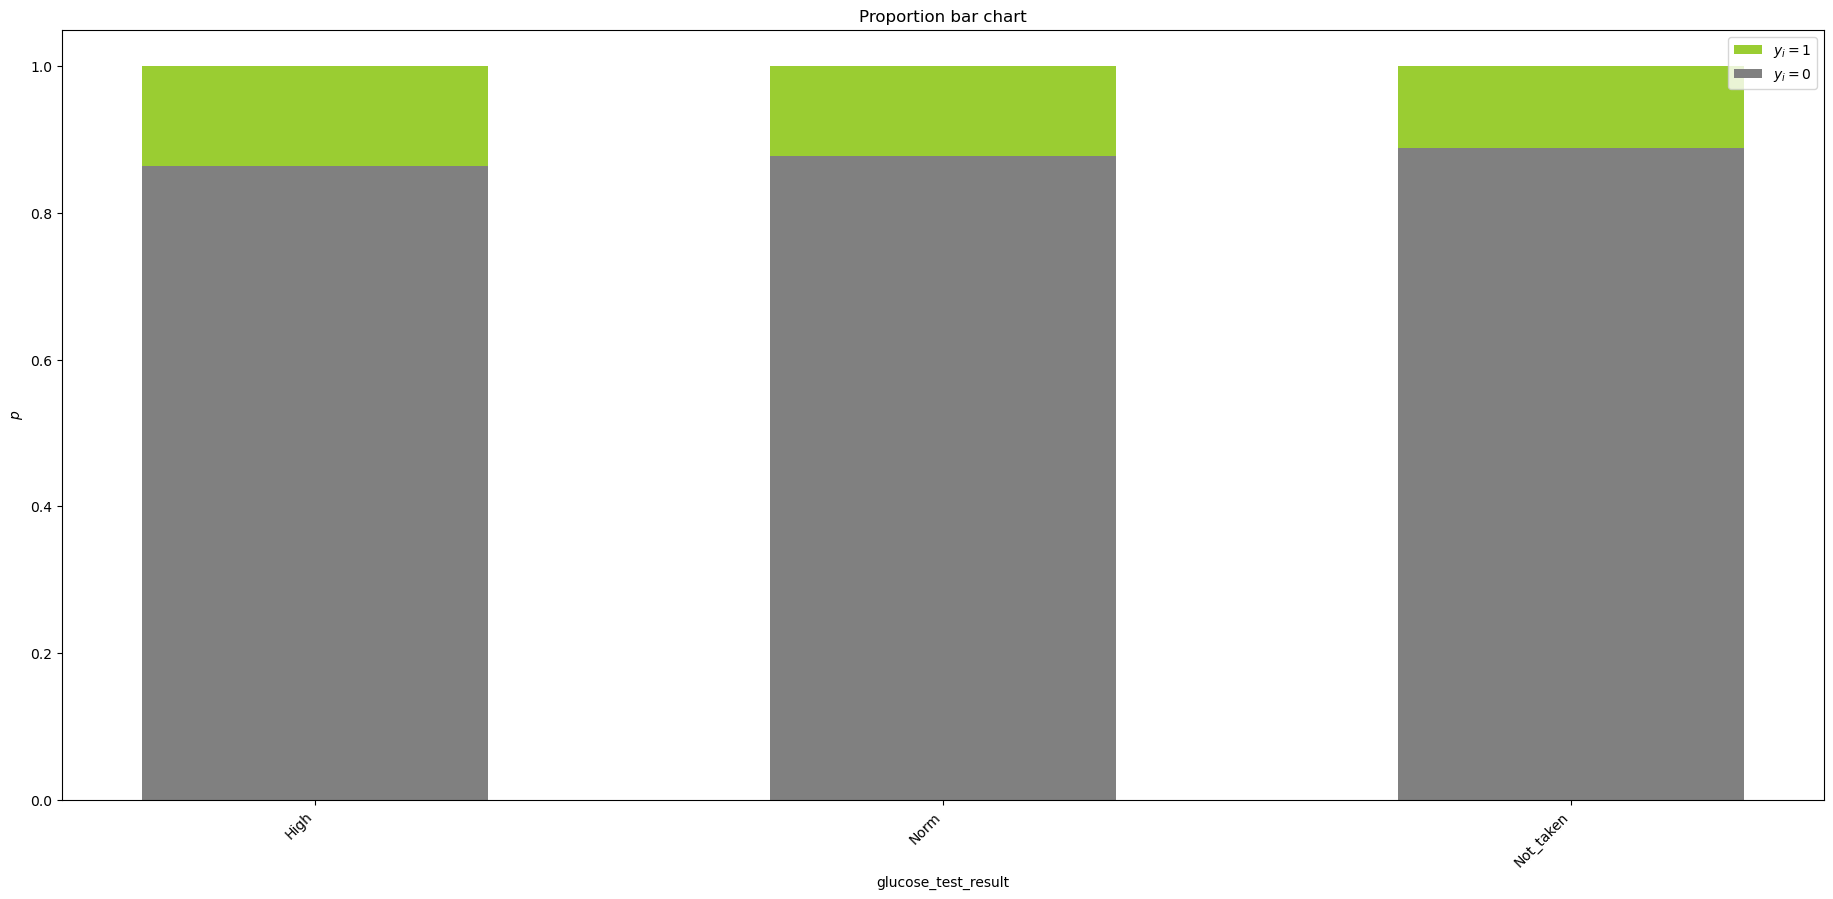

In [127]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

### a1c_test_result

In [128]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832725
>8           0.080086
Norm         0.049175
>7           0.038014
Name: proportion, dtype: float64

In [129]:
train['a1c_test_result'] = train['a1c_test_result'].replace({'>7': 'High', '>8': 'High'})
test['a1c_test_result'] = test['a1c_test_result'].replace({'>7': 'High', '>8': 'High'})

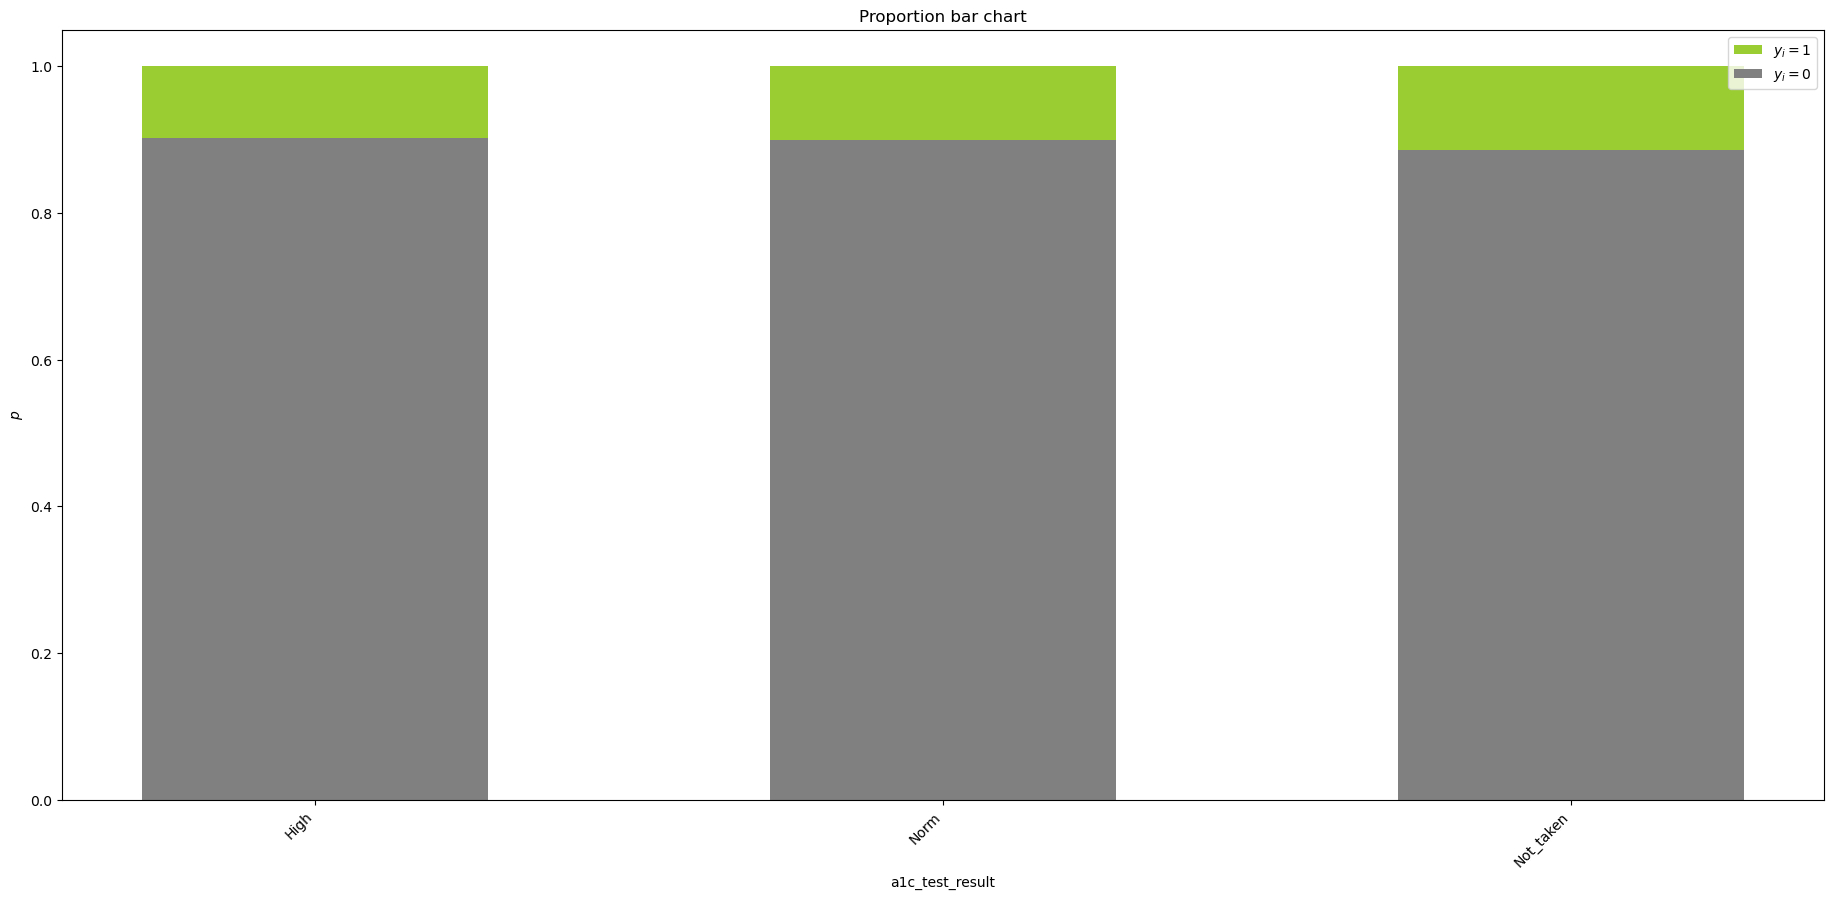

In [130]:
bar_charts_categorical(train, "a1c_test_result", "readmitted_binary")

### average_pulse_bpm

In [131]:
train['Midpoint_Age'] = train['Midpoint_Age'].replace('Unknown', np.nan)
train['Midpoint_Age'].isna().sum()

2217

In [132]:
test['Midpoint_Age'] = test['Midpoint_Age'].replace('Unknown', np.nan)
test['Midpoint_Age'].isna().sum()

1194

In [133]:
def label_pulse(row):
    age = row['Midpoint_Age']
    pulse = row['average_pulse_bpm']
    if age == 5.0:
        return 1 if 70 <= pulse <= 130 else 0
    elif 25.0 <= age <= 45.0:
        return 1 if 60 <= pulse <= 110 else 0
    elif age >= 65.0:
        return 1 if 60 <= pulse <= 95 else 0
    else:
        return 1 if 60 <= pulse <= 100 else 0

In [134]:
train['is_normal_pulse'] = train.apply(lambda row: label_pulse(row), axis=1)

In [135]:
test['is_normal_pulse'] = test.apply(lambda row: label_pulse(row), axis=1)

In [136]:
train['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.512283
1    0.487717
Name: proportion, dtype: float64

In [137]:
test['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.511595
1    0.488405
Name: proportion, dtype: float64

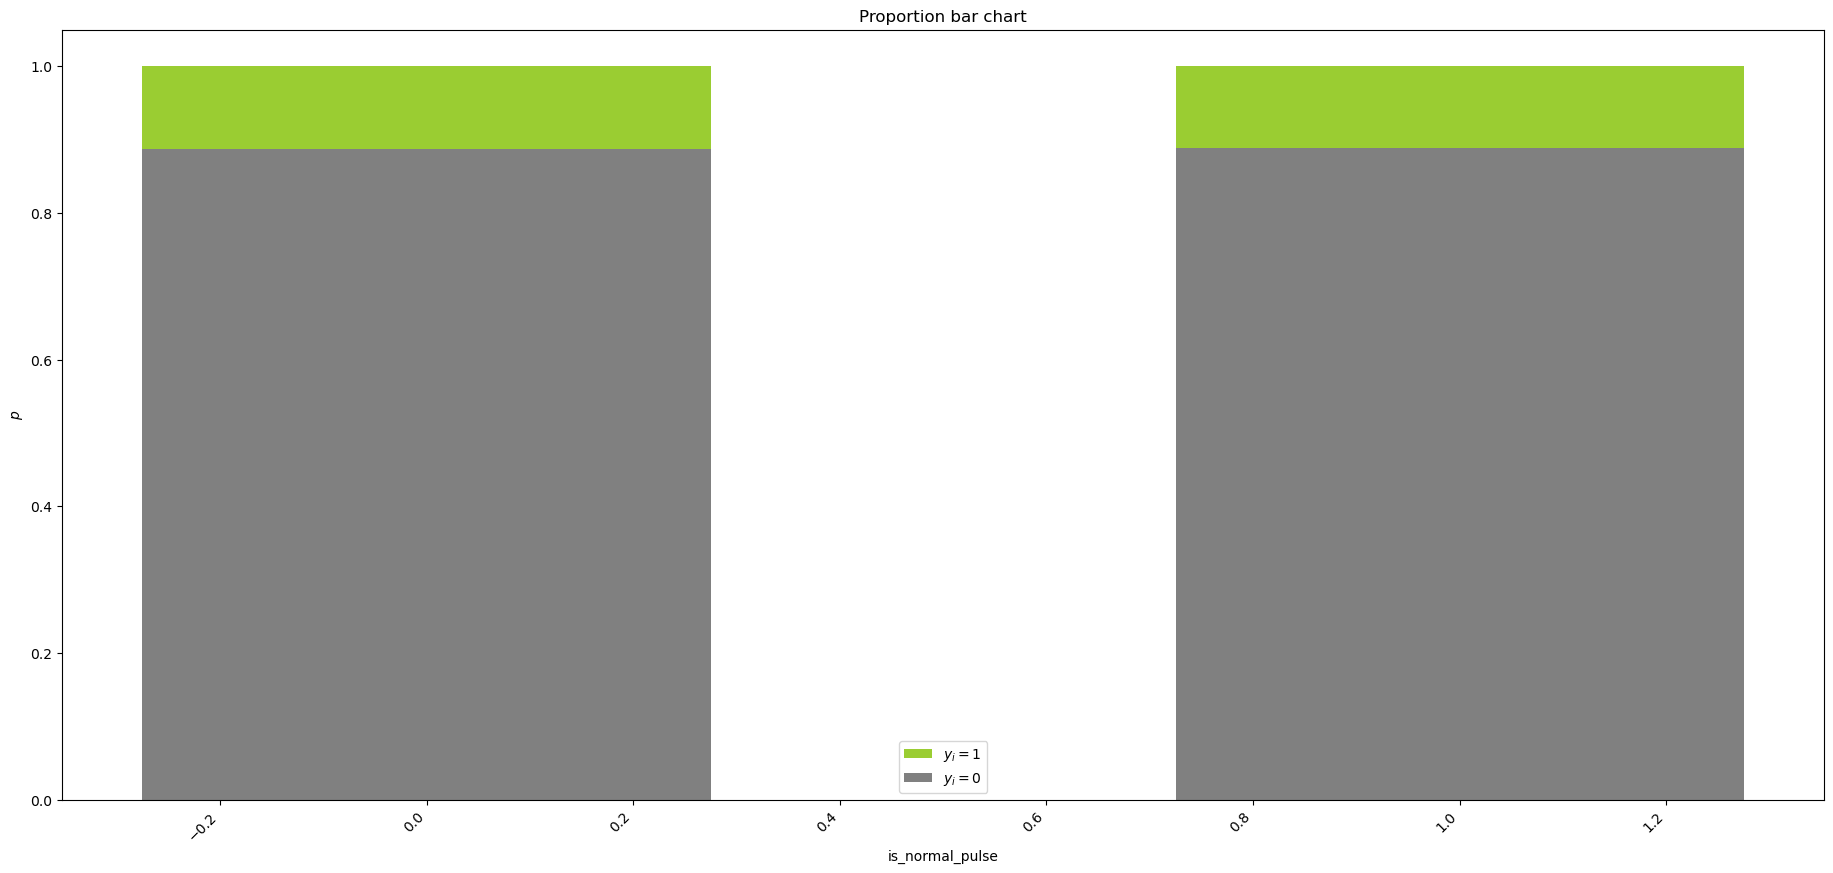

In [138]:
bar_charts_categorical(train, "is_normal_pulse", "readmitted_binary")

### length_of_stay

In [139]:
train['length_of_stay'].value_counts(normalize=True)

length_of_stay
3     0.174547
2     0.170125
1     0.140519
4     0.135549
5     0.097802
6     0.073516
7     0.058313
8     0.042156
9     0.029550
10    0.022980
11    0.018558
12    0.014178
13    0.012059
14    0.010149
Name: proportion, dtype: float64

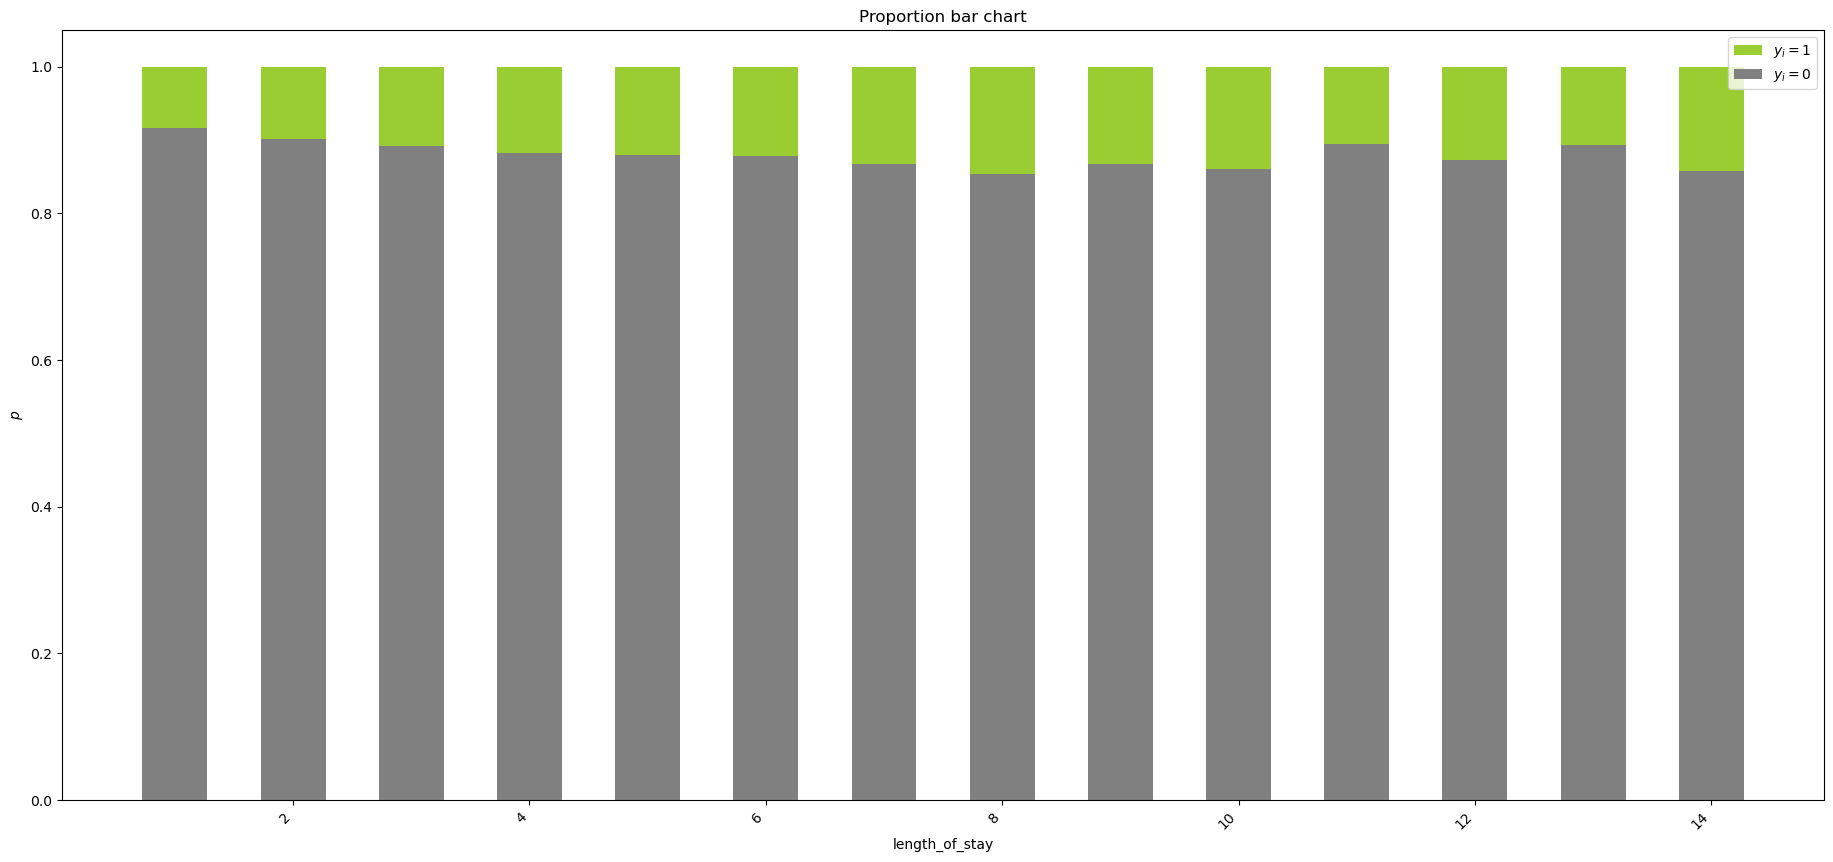

In [140]:
bar_charts_categorical(train, 'length_of_stay', "readmitted_binary")

### number_lab_tests

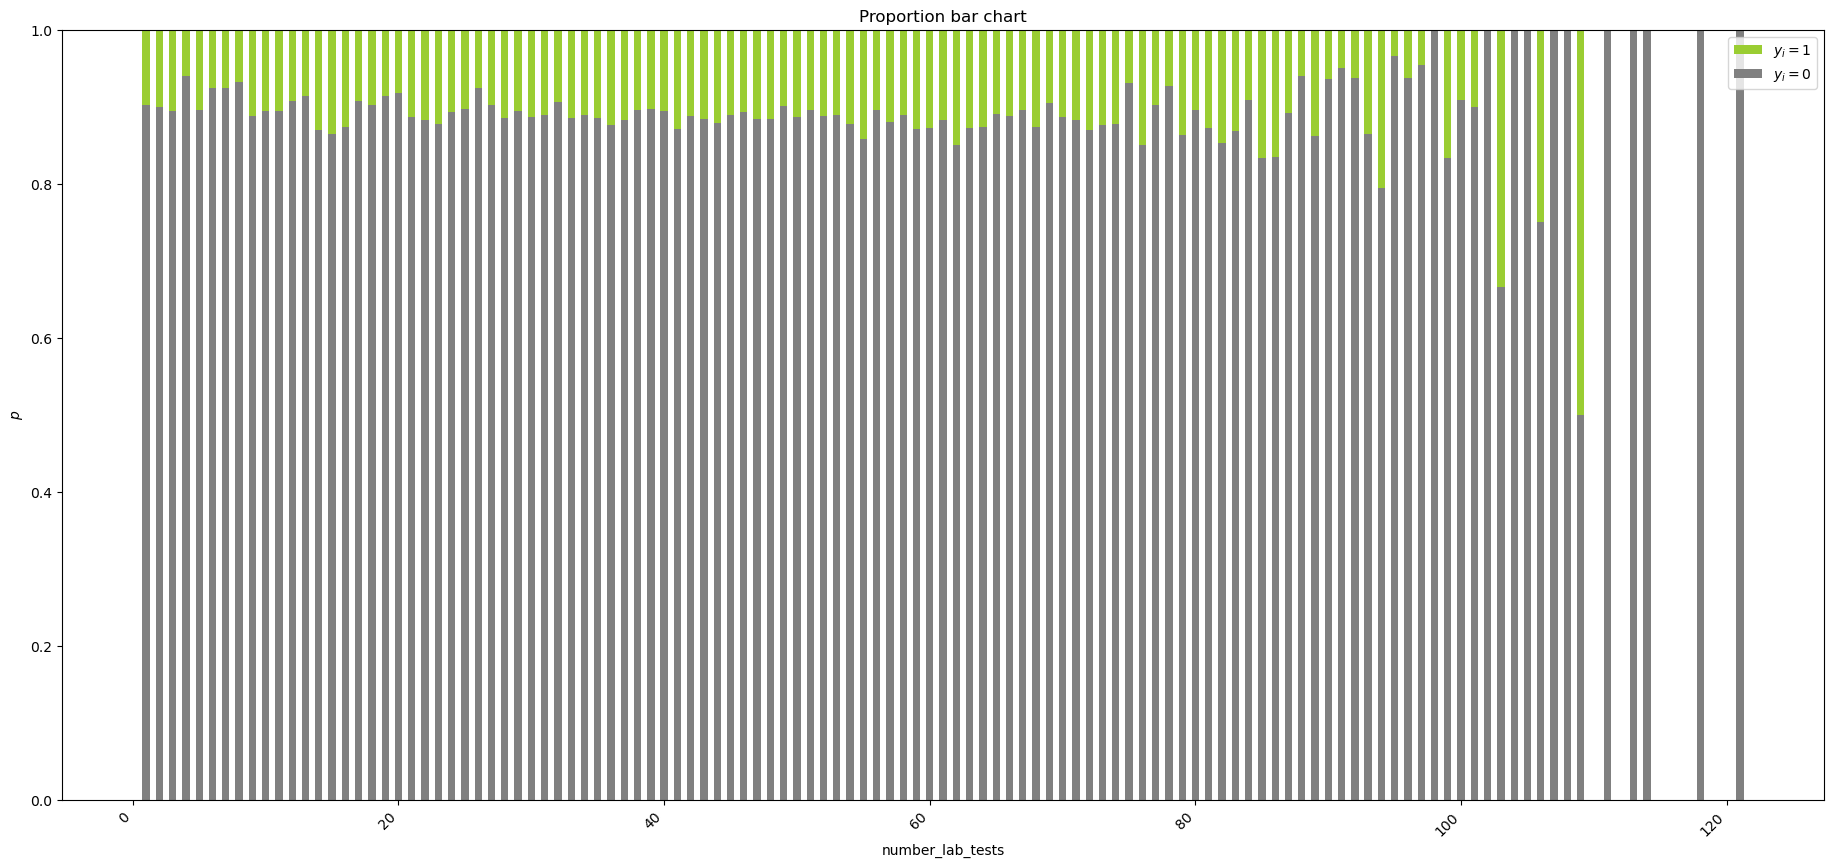

In [141]:
bar_charts_categorical(train, 'number_lab_tests', "readmitted_binary")

### non_lab_procedures

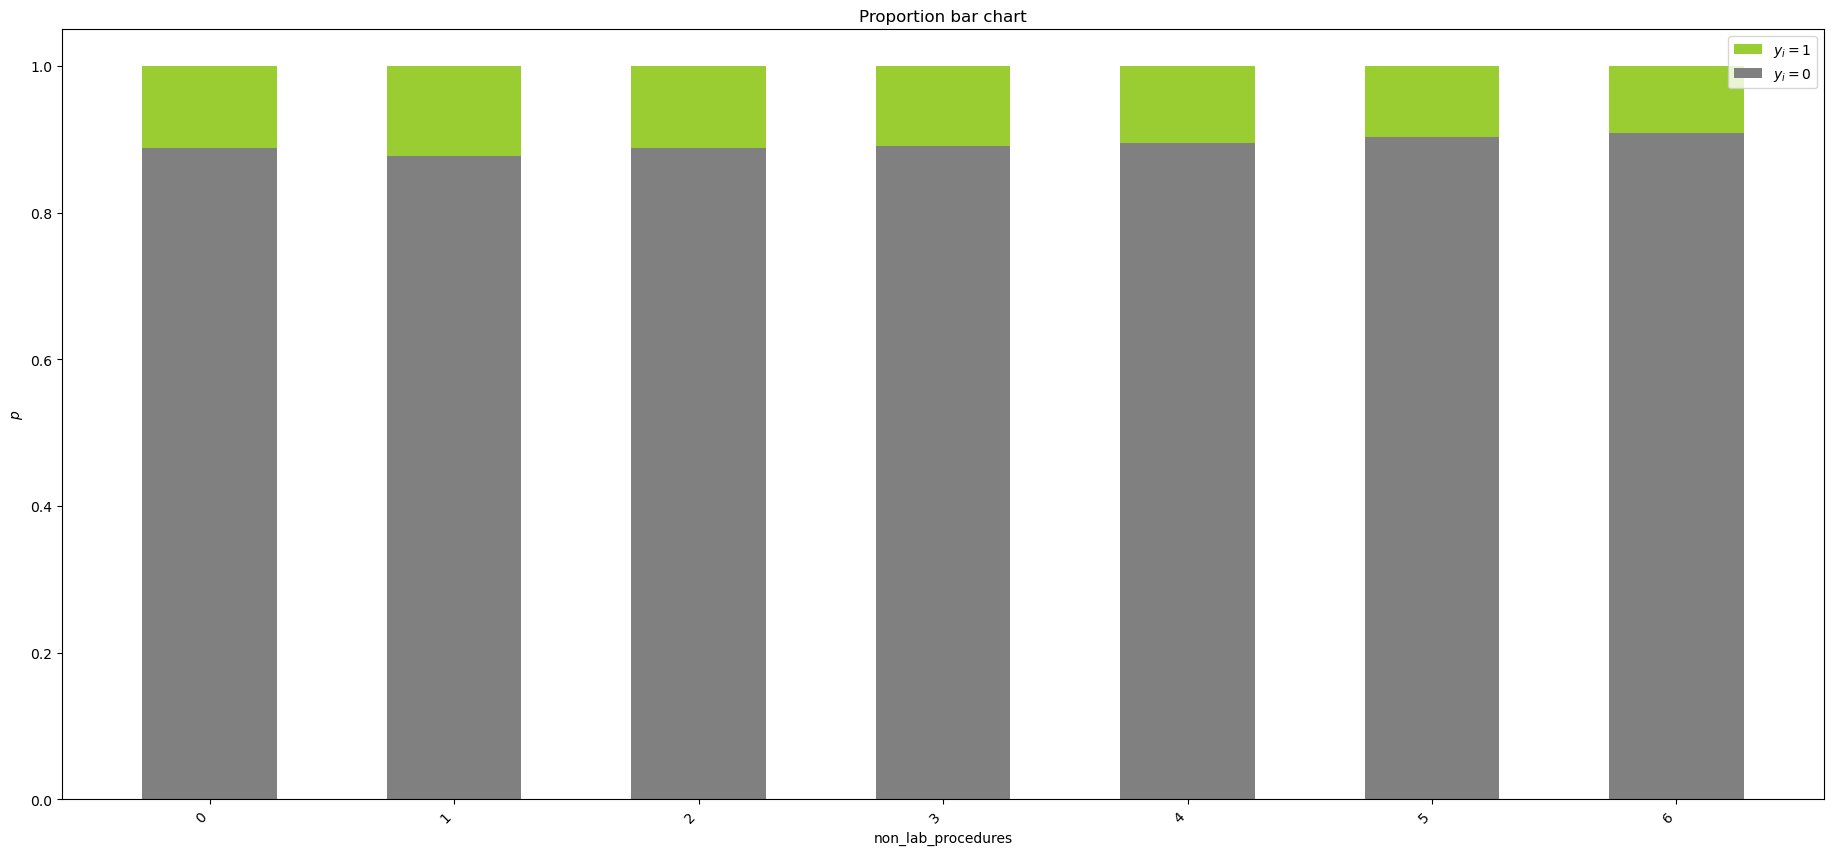

In [142]:
bar_charts_categorical(train, 'non_lab_procedures', "readmitted_binary")

### number_of_medications

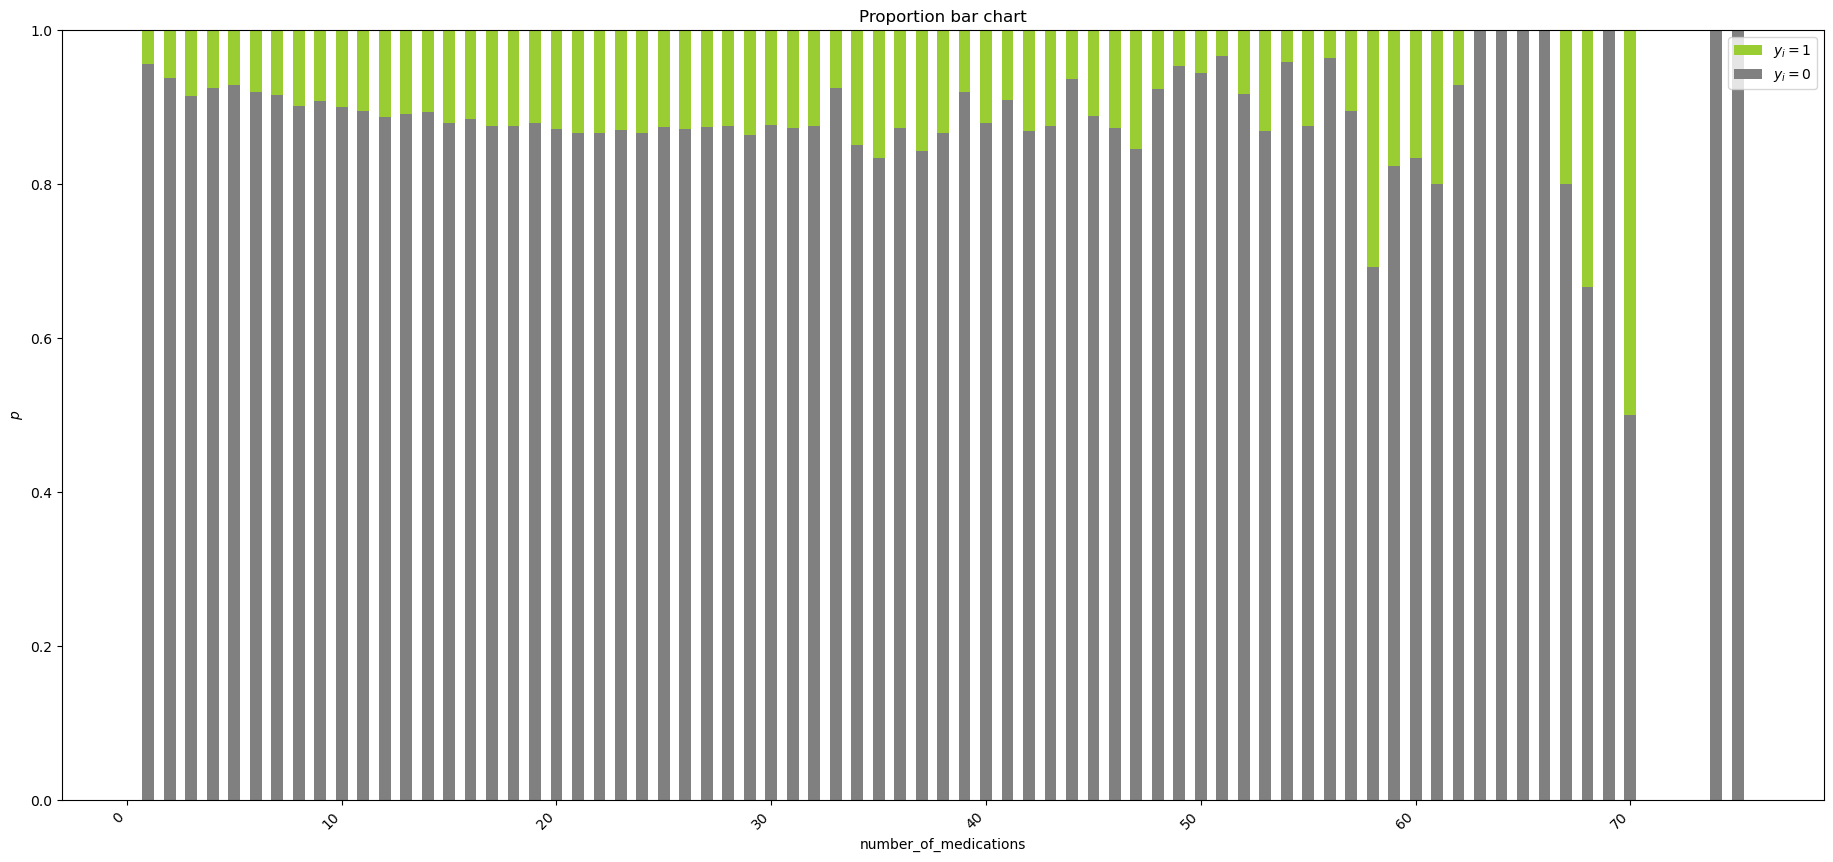

In [143]:
bar_charts_categorical(train, 'number_of_medications', "readmitted_binary")

### number_diagnoses

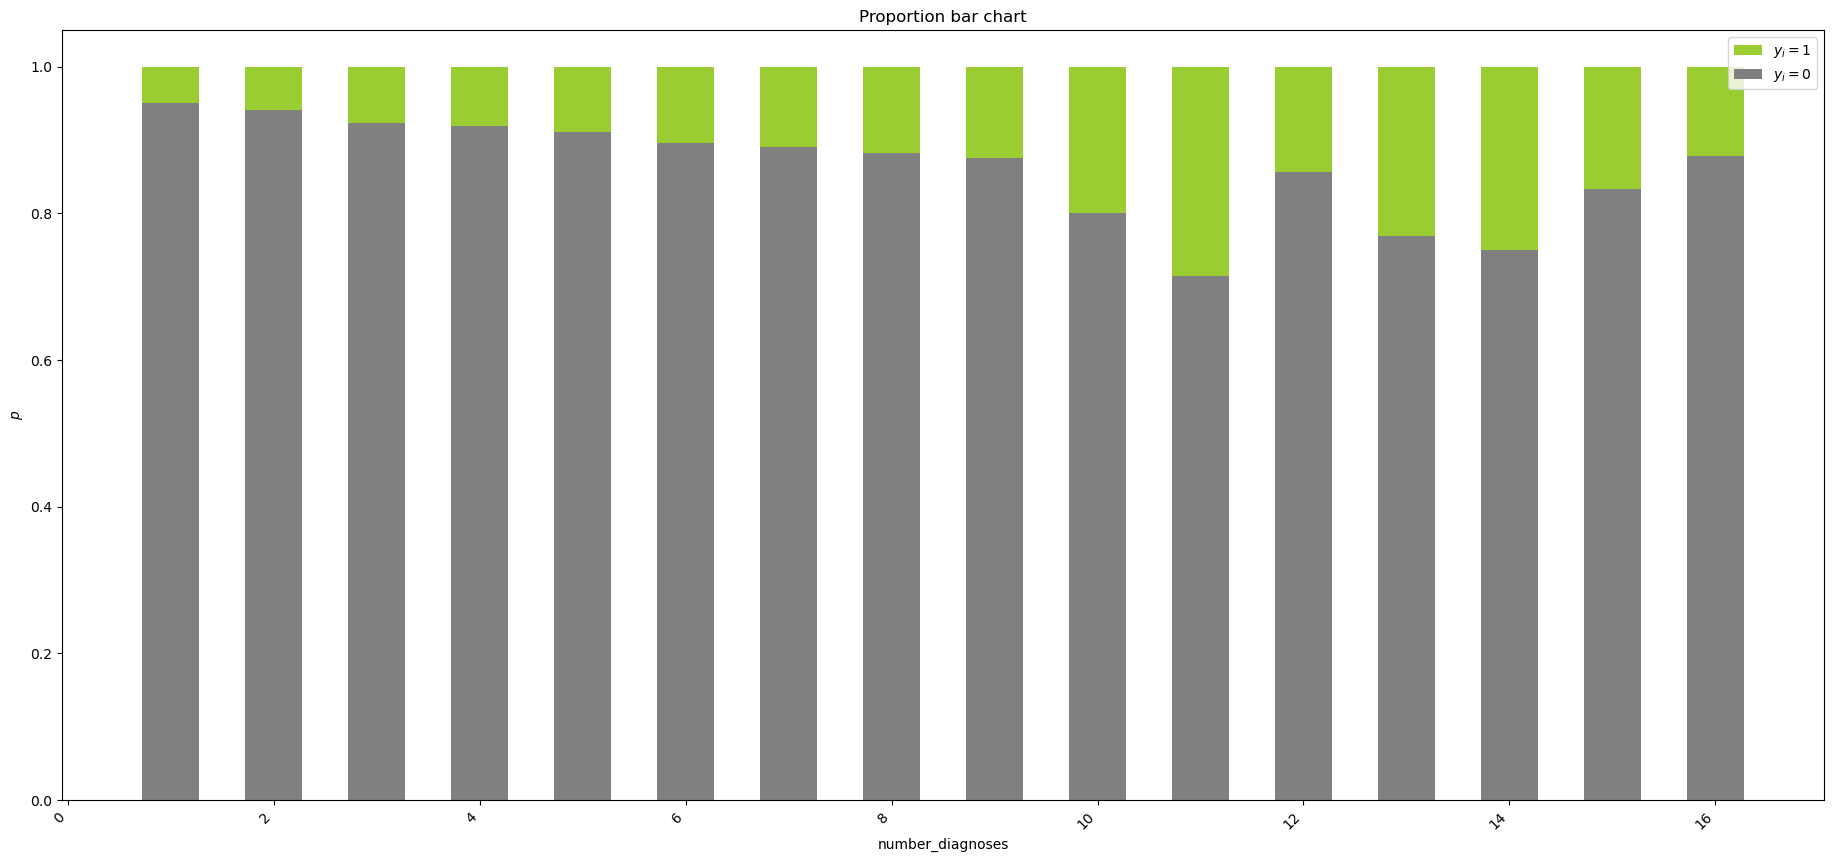

In [144]:
bar_charts_categorical(train, 'number_diagnoses', "readmitted_binary")

### outpatient_visits

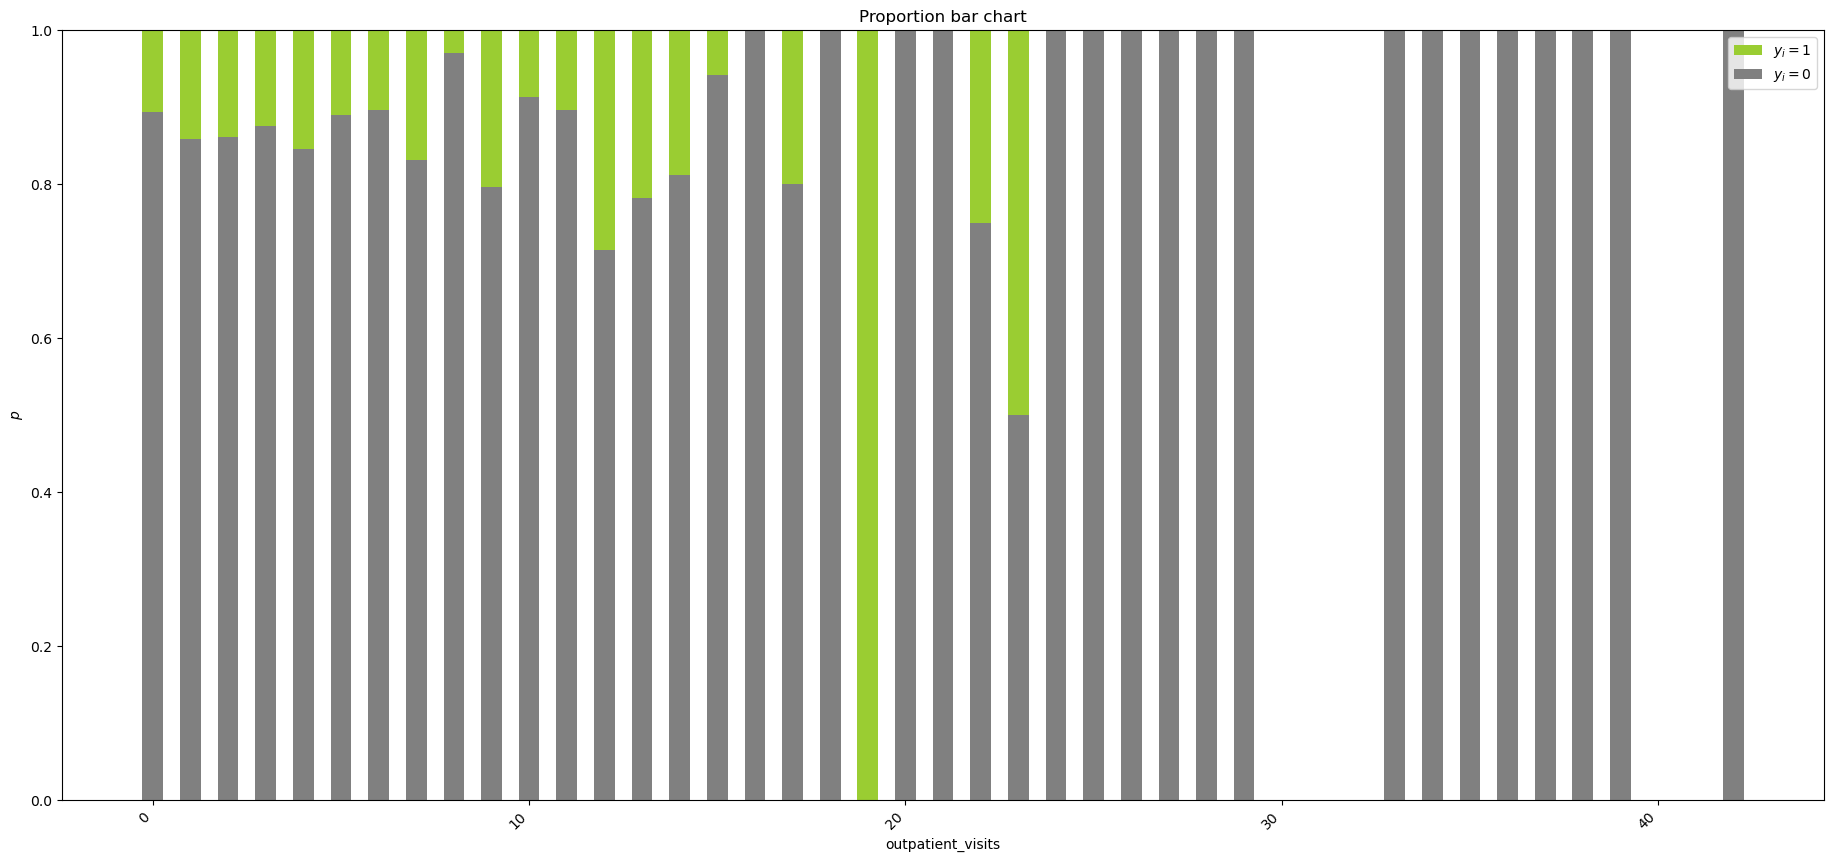

In [145]:
bar_charts_categorical(train, 'outpatient_visits', "readmitted_binary")

### emergency_visits

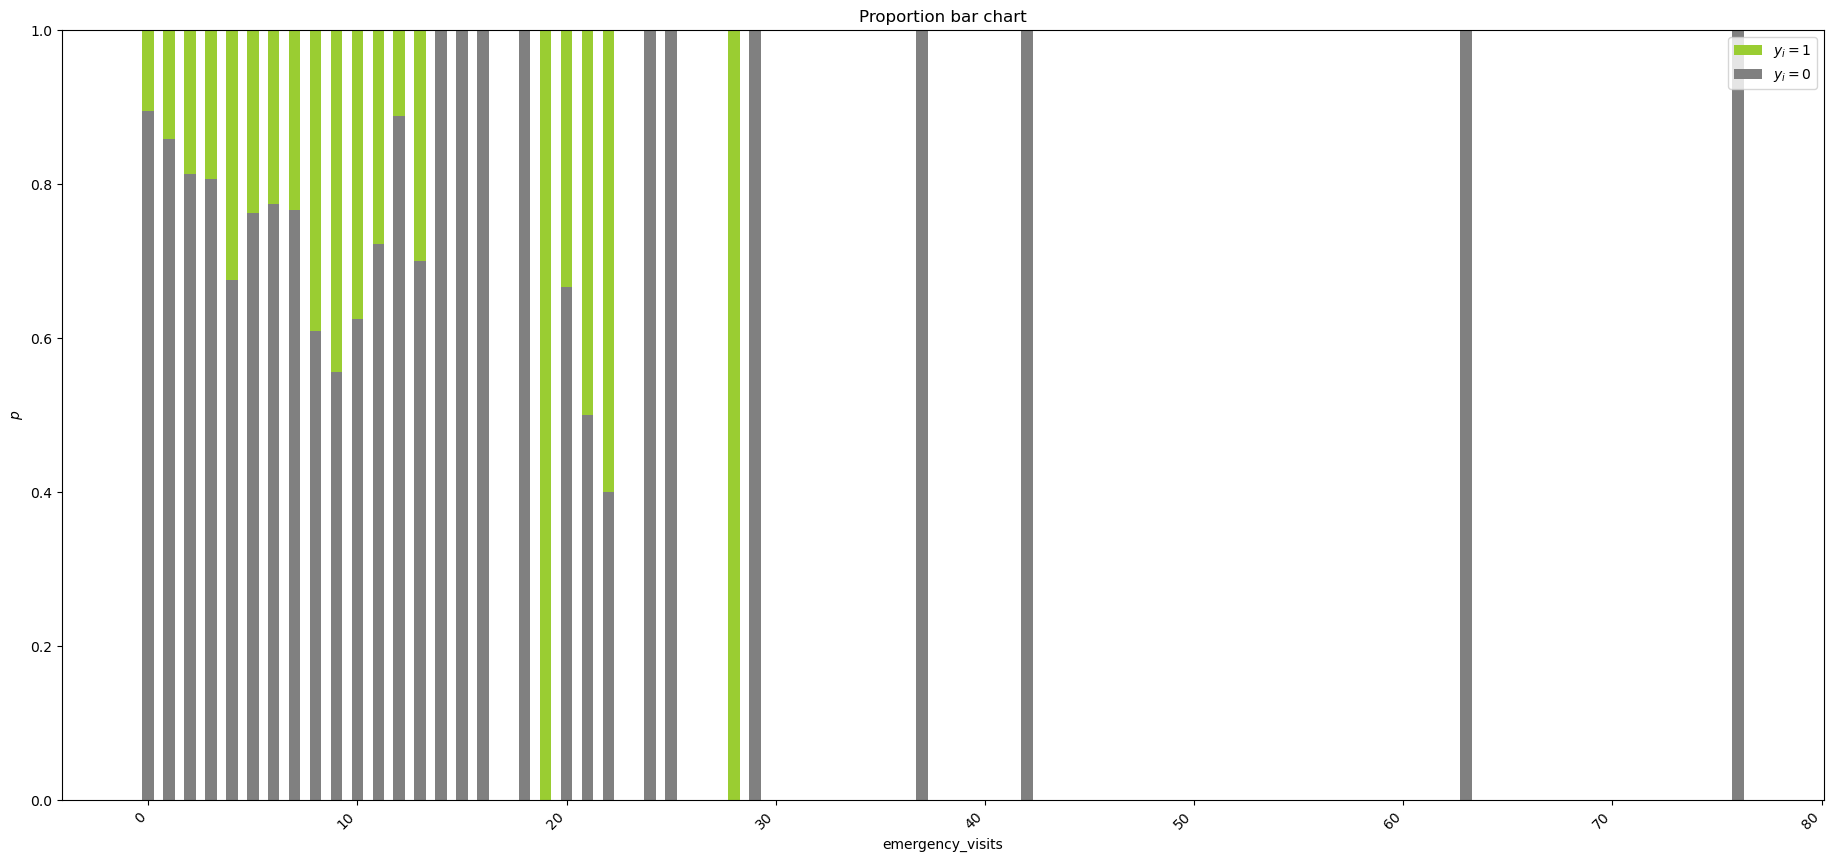

In [146]:
bar_charts_categorical(train, 'emergency_visits', "readmitted_binary")

### inpatient_visits

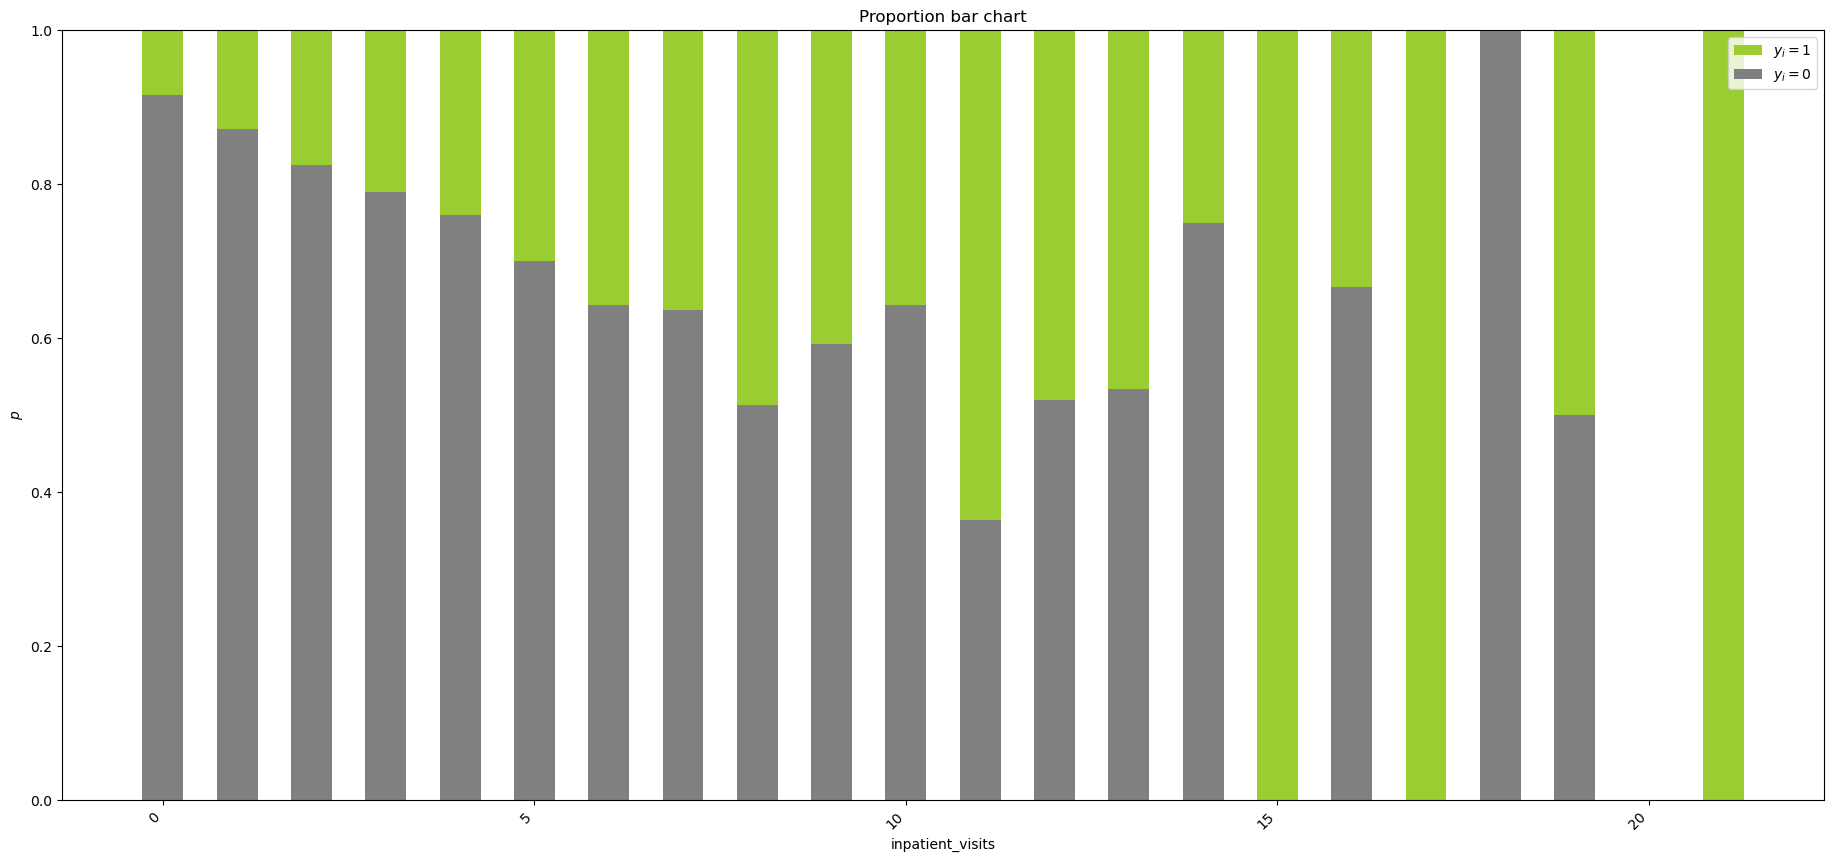

In [147]:
bar_charts_categorical(train, 'inpatient_visits', "readmitted_binary")

### patient_id

In [148]:
train['patient_id'].nunique()

53985

In [149]:
# Create a boolean mask for duplicated 'patient_id'
mask = train.duplicated(subset='patient_id', keep=False)

# Apply the mask to the dataframe
grouped_df = train[mask].groupby('patient_id')

# Sort each patient by encounter
sorted_grouped_df = grouped_df.apply(lambda x: x.sort_index())

sorted_grouped_df

patient_id             race  payer_code  \
patient_id encounter_id                                            
135        536851               135        Caucasian        None   
           538318               135        Caucasian        None   
1152       265544              1152  AfricanAmerican        None   
           334769              1152  AfricanAmerican        None   
           541693              1152  AfricanAmerican        None   
...                             ...              ...         ...   
187920311  517354         187920311        Caucasian  Other_code   
188284883  240177         188284883            Other          MC   
           512319         188284883            Other          MC   
189257846  513790         189257846            Asian          HM   
           754765         189257846            Asian          HM   

                         outpatient_visits  emergency_visits  \
patient_id encounter_id                                        
135        536851                        0                 0   
           538318                        0                 0   
1152       265544                        0                 0   
           334769                        0                 0   
           541693                        0                 0   
...                                    ...               ...   
187920311  517354                        0                 0   
188284883  240177                        0                 0   
           512319                        0                 0   
189257846  513790                        0                 0   
           754765                        0                 0   

                         inpatient_visits    admission_type medical_specialty  \
patient_id encounter_id                                                         
135        536851                       0  Urgent/Emergency        Cardiology   
           538318                       1  Urgent/Emergency           Surgery   
1152       265544                       1  Urgent/Emergency  InternalMedicine   
           334769                       2  Urgent/Emergency  InternalMedicine   
           541693                       2  Urgent/Emergency  InternalMedicine   
...                                   ...               ...               ...   
187920311  517354                       0  Urgent/Emergency           Unknown   
188284883  240177                       0  Urgent/Emergency           Unknown   
           512319                       1  Urgent/Emergency           Unknown   
189257846  513790                       0  Urgent/Emergency           Unknown   
           754765                       1  Urgent/Emergency           Unknown   

                         average_pulse_bpm discharge_disposition  ...  \
patient_id encounter_id                                           ...   
135        536851                      102                  Home  ...   
           538318                      135                  Home  ...   
1152       265544                       91                  Home  ...   
           334769                      110                  Home  ...   
           541693                       77                  Home  ...   
...                                    ...                   ...  ...   
187920311  517354                       92                 Rehab  ...   
188284883  240177                      103                  Home  ...   
           512319                      124                  Home  ...   
189257846  513790                      111                  Home  ...   
           754765                      101                  Home  ...   

                        Combination_Medications  Midpoint_Age  gender_binary  \
patient_id encounter_id                                                        
135        536851                             0          55.0              0   
           538318                             0          55.0  

In [150]:
# Calculate 'number_encounters' in the training data
train['number_encounters_total'] = train.groupby('patient_id')['patient_id'].transform('count')

# Create a dictionary from the training data
patient_encounters_train = train[['patient_id', 'number_encounters_total']].drop_duplicates().set_index('patient_id').to_dict()['number_encounters_total']

In [151]:
# Calculate 'number_encounters' in the test data
test['number_encounters_test'] = test.groupby('patient_id')['patient_id'].transform('count')

# Create a dictionary from the test data
patient_encounters_test = test[['patient_id', 'number_encounters_test']].drop_duplicates().set_index('patient_id').to_dict()['number_encounters_test']

# Map the dictionaries to the 'patient_id' column in the test data and add the counts
test['number_encounters_total'] = test['patient_id'].map(patient_encounters_train).fillna(0) + test['patient_id'].map(patient_encounters_test).fillna(0)

# Replace the 'number_encounters' values in the test data with the 'number_encounters_test' values where 'number_encounters' is 0
test.loc[test['number_encounters_total'] == 0, 'number_encounters_total'] = test['number_encounters_test']

In [152]:
test = test.drop('number_encounters_test', axis=1)

In [153]:
train['number_encounters_total'].value_counts()

number_encounters_total
1     43426
2     14074
3      6039
4      3236
5      1700
6       948
7       553
8       360
9       180
10      170
11      154
12       96
15       90
14       84
13       39
33       33
19       19
18       18
17       17
Name: count, dtype: int64

In [154]:
test['number_encounters_total'].value_counts()

number_encounters_total
1.0     16460
2.0      6273
3.0      3050
4.0      1676
5.0      1055
6.0       619
7.0       421
8.0       247
9.0       177
10.0      120
12.0       75
11.0       60
13.0       57
15.0       43
18.0       39
20.0       37
23.0       20
14.0       19
17.0       14
16.0       14
28.0       14
19.0       13
22.0       12
21.0        8
40.0        7
Name: count, dtype: int64

In [155]:
train.drop(['patient_id'], axis = 1, inplace = True) 

In [156]:
test.drop(['patient_id'], axis = 1, inplace = True) 

In [157]:
train['Total_visits'] = train['inpatient_visits'] + train['outpatient_visits'] + train['emergency_visits']

In [158]:
test['Total_visits'] = test['inpatient_visits'] + test['outpatient_visits'] + test['emergency_visits']

In [159]:
train['Serious_condition_visits'] = train['inpatient_visits'] + train['emergency_visits']

In [160]:
test['Serious_condition_visits'] = test['inpatient_visits'] + test['emergency_visits']

In [161]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
                   'number_diagnoses', 'number_generic_medications', 'outpatient_visits','number_encounters_total',
                   'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

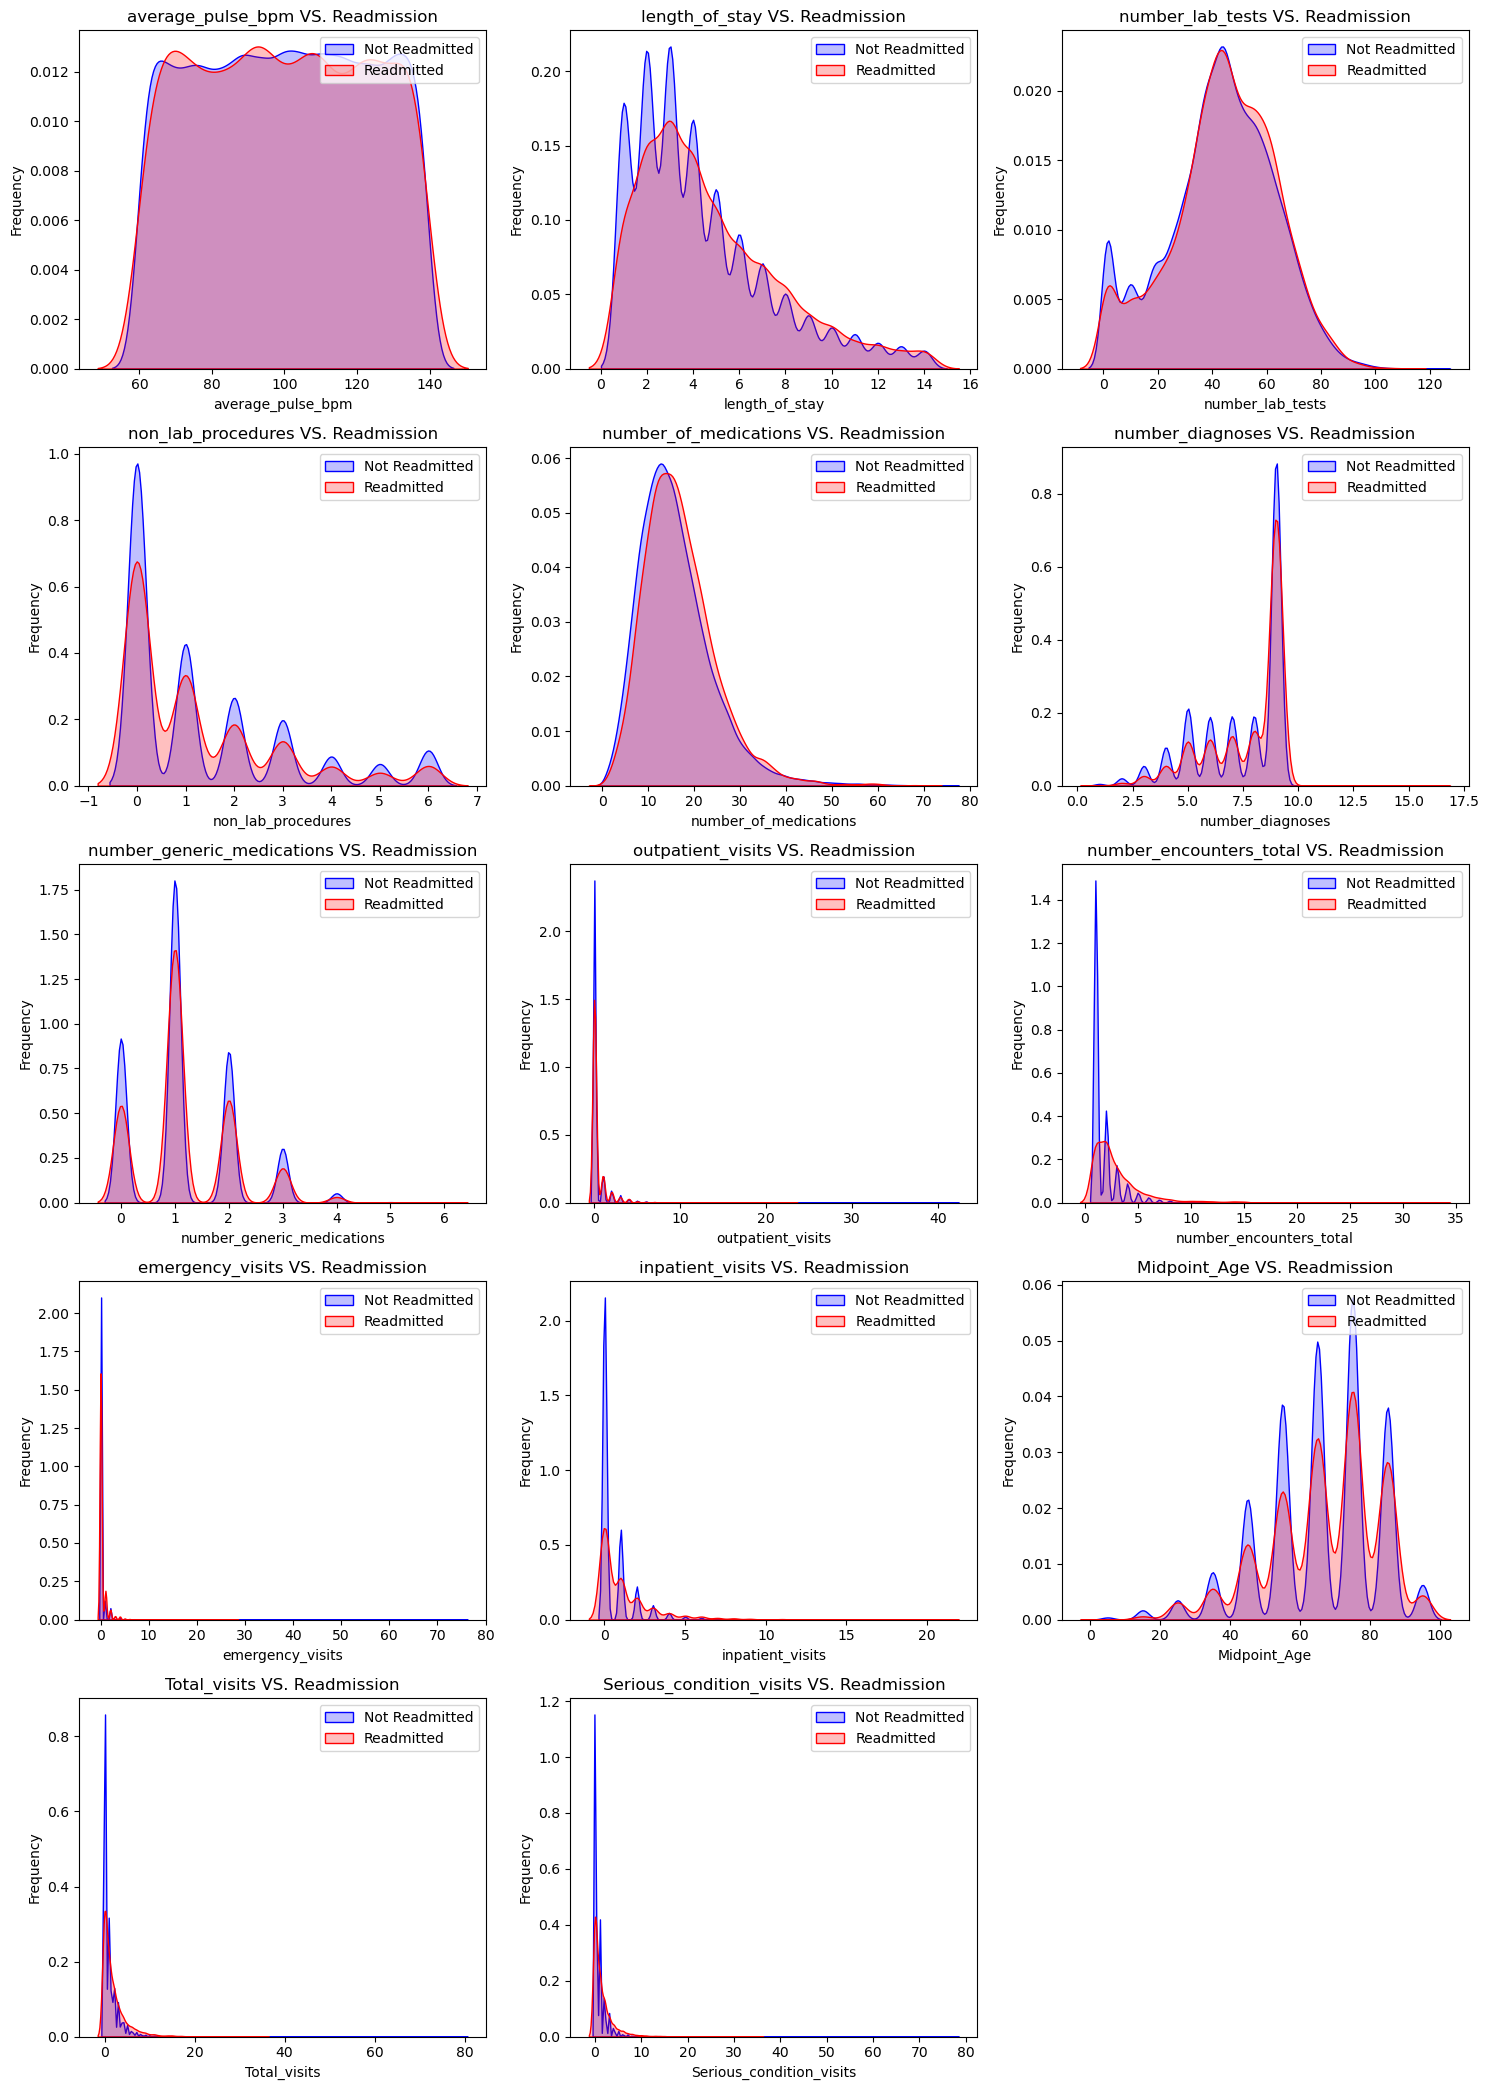

In [162]:
ncols = 3
nrows = int(np.ceil(len(metric_features) / 3))

fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 7*3))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

for idx, feature in enumerate(metric_features):   
    sns.kdeplot(train.loc[(train['readmitted_binary'] == 'No'), feature], color='b', shade=True, label='Not Readmitted', ax=axs[idx])
    sns.kdeplot(train.loc[(train['readmitted_binary'] == 'Yes'), feature], color='r', shade=True, label='Readmitted', ax=axs[idx])
    
    axs[idx].set(xlabel=feature, ylabel='Frequency')
    axs[idx].set_title(f'{feature} VS. Readmission')
    axs[idx].legend()

plt.tight_layout()
plt.show()

------------------

In [163]:
X_binary = train.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y_binary = train['readmitted_binary']

In [164]:
X_binary.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [165]:
X_binary.shape

(71236, 38)

In [166]:
y_binary.shape

(71236,)

In [167]:
test.shape

(30530, 38)

# Outliers

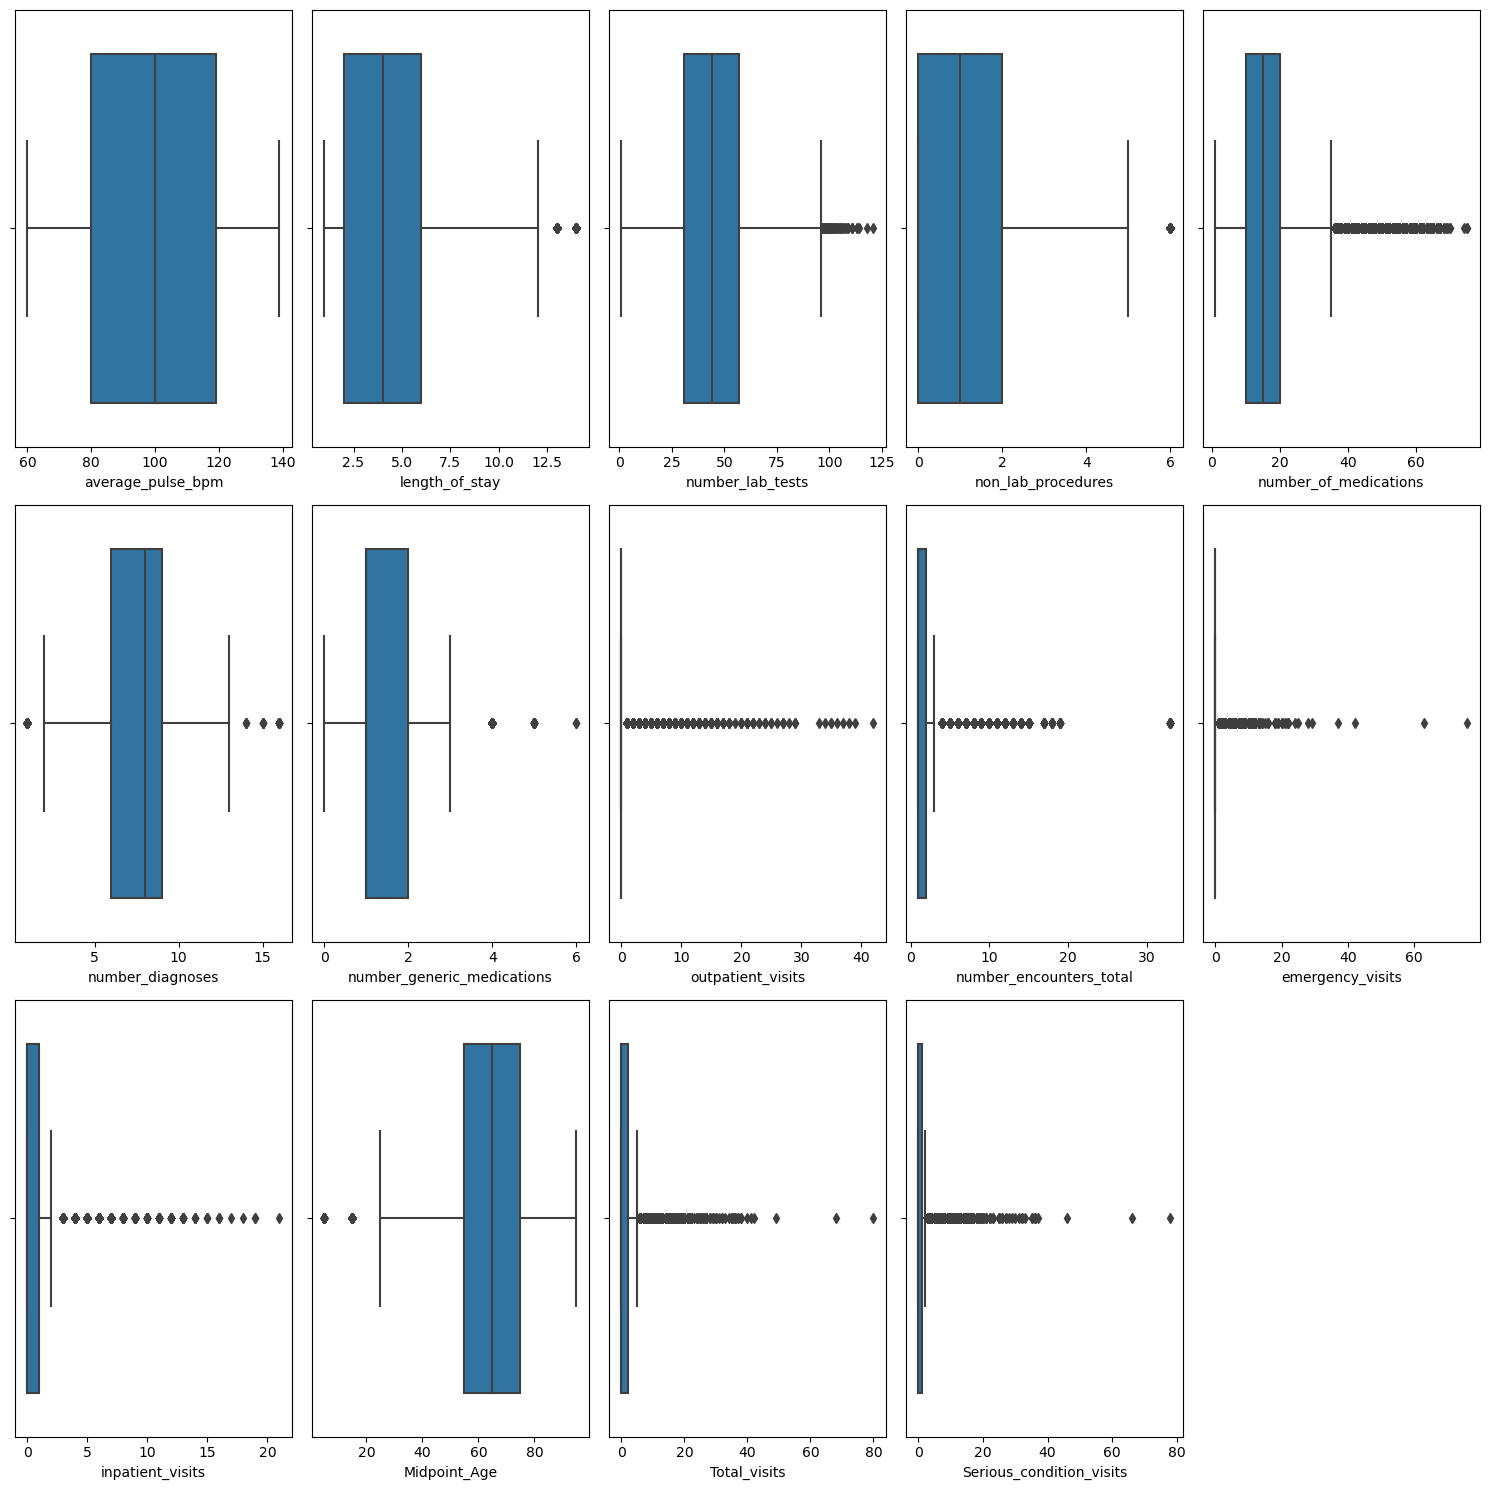

In [168]:
# Determine the number of rows needed for the plot
n_rows = int(np.ceil(len(metric_features) / 5))

# Create a figure and axes objects
fig, axs = plt.subplots(n_rows, 5, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

# Create a boxplot for each column
for i, feature in enumerate(metric_features):
    sns.boxplot(x=X_binary[feature], ax=axs[i])

# Display the plot
plt.tight_layout()
plt.show()

In [169]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        
    print(result)

In [170]:
for columns in X_binary:
    TestIndependence(X_binary[columns],y_binary,columns)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
race_caucasian is IMPORTANT for Prediction
number_generic_medications is IMPORTANT for Prediction
insulin is IMPORTANT for Prediction
metformin is IMPORTANT for Prediction
Sulfonylureas is NOT an im

# Encoding categorical variables

In [171]:
categorical_columns = ['race','payer_code','admission_type','medical_specialty','discharge_disposition','admission_source',
                      'primary_diagnosis_types', 'secondary_diagnosis_types','additional_diagnosis_types','glucose_test_result',
                      'a1c_test_result','race_caucasian','metformin','insulin','Sulfonylureas','Meglitinides',
                      'Thiazolidinediones','Alpha_Glucosidase_Inhibitors','Combination_Medications','gender_binary',
                      'presc_diabetes_meds_binary','change_in_meds_binary','Has_Insurance','is_normal_pulse']

In [172]:
X_binary.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [173]:
test.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [174]:
columns_to_encode = ['race','payer_code','admission_type','medical_specialty','discharge_disposition',
                     'admission_source','primary_diagnosis_types','secondary_diagnosis_types',
                     'additional_diagnosis_types','glucose_test_result','a1c_test_result']

other_columns_train = pd.DataFrame(X_binary.drop(columns_to_encode, axis=1))
other_columns_test = pd.DataFrame(test.drop(columns_to_encode, axis=1))

In [175]:
# count encoder
count_encoder = ce.CountEncoder(cols=columns_to_encode)

# fit and transform on your data
count_encoder.fit(X_binary[columns_to_encode])
train_encoded_1 = count_encoder.transform(X_binary[columns_to_encode])
train_encoded_1

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,a1c_test_result
encounter_id,,,,,,,,,,,
533253,51779,28201,50779,5217,42256,40319,7291,5746,4729,67548,59320
426224,12977,28201,50779,34922,13133,21586,1968,3194,1297,67548,59320
634063,51779,28201,7246,5217,42256,4913,6476,1358,11927,67548,59320
890610,12977,22683,50779,13017,42256,4418,6476,2747,20959,67548,59320
654194,51779,4319,13211,34922,9103,21586,3443,5608,20959,67548,59320
...,...,...,...,...,...,...,...,...,...,...,...
660160,12977,22683,13211,13017,42256,21586,21223,3194,11927,67548,8413
826429,12977,28201,50779,34922,3690,21586,2424,1765,4550,67548,8413
332030,51779,28201,7246,34922,3690,4913,21223,7192,6368,1882,59320


In [176]:
X_bin_encoded = pd.concat([train_encoded_1, other_columns_train], axis=1)
X_bin_encoded

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,51779,28201,50779,5217,42256,40319,7291,5746,4729,67548,...,0,75.0,0,0,0,0,0,6,2,2
426224,12977,28201,50779,34922,13133,21586,1968,3194,1297,67548,...,0,55.0,1,1,0,0,0,1,0,0
634063,51779,28201,7246,5217,42256,4913,6476,1358,11927,67548,...,0,65.0,0,1,1,0,1,1,1,1
890610,12977,22683,50779,13017,42256,4418,6476,2747,20959,67548,...,0,65.0,1,0,0,1,1,1,1,1
654194,51779,4319,13211,34922,9103,21586,3443,5608,20959,67548,...,0,75.0,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,12977,22683,13211,13017,42256,21586,21223,3194,11927,67548,...,0,85.0,0,1,1,1,1,1,1,1
826429,12977,28201,50779,34922,3690,21586,2424,1765,4550,67548,...,0,75.0,0,1,1,0,0,1,0,0
332030,51779,28201,7246,34922,3690,4913,21223,7192,6368,1882,...,0,65.0,0,1,1,0,0,4,4,4


In [177]:
test_encoded_1 = count_encoder.transform(test[columns_to_encode])
test_encoded_1

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,a1c_test_result
encounter_id,,,,,,,,,,,
499502,51779,4319,50779,34922,42256,40319.0,7291,21999,11927,67548,59320
447319,51779,4319,50779,34922,42256,40319.0,6104,1358,3132,1882,59320
309126,12977,28201,50779,13017,42256,40319.0,5377,8938,2514,67548,59320
181183,51779,3292,7246,34922,42256,40319.0,4881,1723,4550,67548,59320
359339,51779,28201,50779,13017,42256,40319.0,3559,21999,20959,67548,59320
...,...,...,...,...,...,...,...,...,...,...,...
451150,51779,4319,50779,34922,13133,40319.0,3559,5746,6368,67548,59320
549298,51779,28201,50779,5217,42256,40319.0,21223,8938,6368,67548,59320
327586,51779,28201,50779,13017,13133,40319.0,4881,21999,11927,67548,59320


In [178]:
test_encoded = pd.concat([test_encoded_1, other_columns_test], axis=1)
test_encoded

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,51779,4319,50779,34922,42256,40319.0,7291,21999,11927,67548,...,0,85.0,1,1,0,1,0,2.0,0,0
447319,51779,4319,50779,34922,42256,40319.0,6104,1358,3132,1882,...,0,25.0,1,0,0,1,1,3.0,1,1
309126,12977,28201,50779,13017,42256,40319.0,5377,8938,2514,67548,...,0,35.0,1,1,0,0,1,4.0,0,0
181183,51779,3292,7246,34922,42256,40319.0,4881,1723,4550,67548,...,0,55.0,1,1,1,1,0,1.0,0,0
359339,51779,28201,50779,13017,42256,40319.0,3559,21999,20959,67548,...,0,65.0,1,1,0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,51779,4319,50779,34922,13133,40319.0,3559,5746,6368,67548,...,0,75.0,1,0,0,1,0,1.0,0,0
549298,51779,28201,50779,5217,42256,40319.0,21223,8938,6368,67548,...,0,65.0,1,1,0,0,1,8.0,4,4
327586,51779,28201,50779,13017,13133,40319.0,4881,21999,11927,67548,...,0,85.0,0,1,0,0,0,1.0,0,0


In [179]:
X_bin_encoded.shape

(71236, 38)

In [180]:
test_encoded.shape

(30530, 38)

In [181]:
for categorical_columns in X_bin_encoded:
    TestIndependence(X_bin_encoded[categorical_columns],y_binary, categorical_columns)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis_types is IMPORTANT for Prediction
secondary_diagnosis_types is IMPORTANT for Prediction
additional_diagnosis_types is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
race_caucasian is IMPORTANT for Predi

## Imputing Age

In [182]:
X_bin_encoded['Midpoint_Age'].value_counts()

Midpoint_Age
75.0    17719
65.0    15164
85.0    11755
55.0    11664
45.0     6541
35.0     2584
95.0     1910
25.0     1096
15.0      481
5.0       105
Name: count, dtype: int64

In [183]:
X_bin_encoded['Midpoint_Age'].isna().sum()

2217

In [184]:
test_encoded['Midpoint_Age'].isna().sum()

1194

In [185]:
known_age = X_bin_encoded[X_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_bin_encoded[X_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_bin_encoded.loc[X_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [186]:
known_age = test_encoded[test_encoded['Midpoint_Age'].notnull()]
unknown_age = test_encoded[test_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
test_encoded.loc[test_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [187]:
X_bin_encoded['Midpoint_Age'].isna().sum()

0

In [188]:
test_encoded['Midpoint_Age'].isna().sum()

0

In [189]:
for i in metric_features:
    correlation, p_value = pointbiserialr(X_bin_encoded[i], y_binary.map({'Yes': True, 'No': False}))
    print(i)
    print(f'Correlation: {correlation}')
    print(f'P-Value: {p_value}')
    print('')

average_pulse_bpm
Correlation: 0.0001524487429469665
P-Value: 0.9675446544944268

length_of_stay
Correlation: 0.041071472402737993
P-Value: 5.541095835799051e-28

number_lab_tests
Correlation: 0.018789446962009307
P-Value: 5.295854100098343e-07

non_lab_procedures
Correlation: -0.01487265338992123
P-Value: 7.197165755827967e-05

number_of_medications
Correlation: 0.03744604352242079
P-Value: 1.559663337477437e-23

number_diagnoses
Correlation: 0.05173905404772976
P-Value: 1.979475254102299e-43

number_generic_medications
Correlation: 0.0021529357106972635
P-Value: 0.5655546160226209

outpatient_visits
Correlation: 0.01837963830489903
P-Value: 9.301546104525543e-07

number_encounters_total
Correlation: 0.22543717499518684
P-Value: 0.0

emergency_visits
Correlation: 0.05931370511524123
P-Value: 1.533303697444532e-56

inpatient_visits
Correlation: 0.16671028230507245
P-Value: 0.0

Midpoint_Age
Correlation: 0.02030126545954144
P-Value: 5.997157163061937e-08

Total_visits
Correlation: 0.125

In [190]:
X_bin_encoded.head()

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,51779,28201,50779,5217,42256,40319,7291,5746,4729,67548,...,0,75.0,0,0,0,0,0,6,2,2
426224,12977,28201,50779,34922,13133,21586,1968,3194,1297,67548,...,0,55.0,1,1,0,0,0,1,0,0
634063,51779,28201,7246,5217,42256,4913,6476,1358,11927,67548,...,0,65.0,0,1,1,0,1,1,1,1
890610,12977,22683,50779,13017,42256,4418,6476,2747,20959,67548,...,0,65.0,1,0,0,1,1,1,1,1
654194,51779,4319,13211,34922,9103,21586,3443,5608,20959,67548,...,0,75.0,0,0,0,1,0,2,1,0


In [191]:
X_bin_encoded.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'outpatient_visits',
       'emergency_visits', 'inpatient_visits', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Sulfonylureas',
       'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [192]:
test_encoded.head()

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,51779,4319,50779,34922,42256,40319.0,7291,21999,11927,67548,...,0,85.0,1,1,0,1,0,2.0,0,0
447319,51779,4319,50779,34922,42256,40319.0,6104,1358,3132,1882,...,0,25.0,1,0,0,1,1,3.0,1,1
309126,12977,28201,50779,13017,42256,40319.0,5377,8938,2514,67548,...,0,35.0,1,1,0,0,1,4.0,0,0
181183,51779,3292,7246,34922,42256,40319.0,4881,1723,4550,67548,...,0,55.0,1,1,1,1,0,1.0,0,0
359339,51779,28201,50779,13017,42256,40319.0,3559,21999,20959,67548,...,0,65.0,1,1,0,0,0,1.0,0,0


In [193]:
test_encoded.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'outpatient_visits',
       'emergency_visits', 'inpatient_visits', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Sulfonylureas',
       'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [194]:
y_binary.head()

encounter_id
533253    No
426224    No
634063    No
890610    No
654194    No
Name: readmitted_binary, dtype: object

---------------

In [195]:
X_bin_encoded.to_csv('X_binary.csv', index=True)
y_binary.to_csv('y_binary.csv', index=True)
test_encoded.to_csv('test_binary.csv', index=True)